<a href="https://colab.research.google.com/github/ziggymoens/DB3_repo/blob/main/DB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%html
<marquee style='width: 75%; color: red;'><b>Databanken 3: oefeningen</b></marquee>

In [ ]:
# Clear your colab environment and all variables --> y
#%reset

# Classificatie

## Naïve Bayes classification

### Data

##### Data exploration

In [ ]:
# import the library 
import pandas as pd
# read the data into a dataframe
url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/titanic.csv'
titanic = pd.read_csv(url)
# show the first 5 lines
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data preperation

In [ ]:
# We drop clearly irrelevant attributes. Pay attention for bias! Don't let your own opinion play. 
titanic = titanic.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


#### Data cleaning

In [ ]:
print('Before')
print(titanic.count())
print()

# drop all lines that contain empty (null or NaN) values
titanic = titanic.dropna()

print('After')
print(titanic.count())

# see what remains
titanic.groupby('Survived').count()

Before
Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
dtype: int64

After
Survived    714
Pclass      714
Sex         714
Age         714
SibSp       714
Parch       714
dtype: int64


,Pclass,Sex,Age,SibSp,Parch
Survived,,,,,
0,424,424,424,424,424
1,290,290,290,290,290


#### Data type conversion (ONE HOT ENCODING)

In [ ]:
# One hot encoding
titanic = pd.get_dummies(titanic, columns=["Sex"], prefix=["Sex"])
print(titanic.head())

   Survived  Pclass   Age  SibSp  Parch  Sex_female  Sex_male
0         0       3  22.0      1      0           0         1
1         1       1  38.0      1      0           1         0
2         1       3  26.0      0      0           1         0
3         1       1  35.0      1      0           1         0
4         0       3  35.0      0      0           0         1


### Define feature matrix, label column and split the data set in a training set and a test set

In [ ]:
# define feature matrix and label column
import sklearn
from sklearn.model_selection import train_test_split
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

# split the data set in a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

print("X_train")
print(X_train.count())
print("X_test")
print(X_test.count())

X_train
Pclass        499
Age           499
SibSp         499
Parch         499
Sex_female    499
Sex_male      499
dtype: int64
X_test
Pclass        215
Age           215
SibSp         215
Parch         215
Sex_female    215
Sex_male      215
dtype: int64


### Choose the model and fit the data to the model

In [ ]:
# assume values are Gaussian distributed, so choose Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# here the training happens: the model is constructed based ons the training data
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Estimate the predictive accuracy of the classifier



accuracy_score: 0.7674418604651163

     true  estimated
646     0          0
161     1          1
827     1          0
641     1          1
363     0          0
FNrate: 0.36470588235294116

[[111  19]
 [ 31  54]]


Text(73.64000000000007, 0.5, 'predicted category')

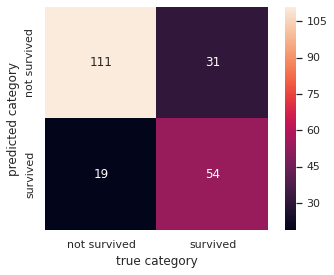

In [ ]:
import numpy as np

# use the model to predict the label for the test data
y_test2 = model.predict(X_test)

# compare the predicted labels with the real values to obtain the estimated accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_test2)
print("accuracy_score: " + str(accuracy) + "\n")

# Determine the false negative rate: what's the proportion of the passengers 
# who survived that we declared death. (assuming survived = positive)
results = pd.DataFrame({'true':y_test,'estimated':y_test2})
print(results.head())

results['TP'] = np.where((results['true'] == 1) & (results['estimated'] == 1),1,0)
results['TN'] = np.where((results['true'] == 0) & (results['estimated'] == 0),1,0)
results['FP'] = np.where((results['true'] == 0) & (results['estimated'] == 1),1,0)
results['FN'] = np.where((results['true'] == 1) & (results['estimated'] == 0),1,0)

results.head(20)

FNrate = results['FN'].sum()/(results['FN'].sum() + results['TP'].sum())
print("FNrate: " + str(FNrate) +"\n")

# show confusion matrix
from sklearn.metrics import confusion_matrix

#Matplotlib is a Python visualization library
import matplotlib.pyplot as plt

#Set matplotlib visualization style
plt.style.use('classic')

# specifiy matplotlib graphs are shown "inline" in the ouput
%matplotlib inline

# Seabonr is  a Python data visualization library based on matplotlib
import seaborn as sns;sns.set()

# calculate the confusion matrix. 

mat = confusion_matrix(y_test,y_test2)
print(mat)

#rename data labels: 0 = not survived, 1 = survived
labels = ['not survived','survived']  # keep the alphanumeric order of the original class labels!

# mat.T = transpose the matrix
# data labels (0,1) are sorted from left to right (for the horizontal axis)
# square=True: each cell will be square-shaped
# and from top to bottom (for the vertical axis)
# annot=True: data value in each cell
# fmt='d': format labels as 'double' (not scientific notation)
# cbar=True: color side bar
sns.heatmap(mat.T,square=True, annot=True, fmt='d', cbar=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('true category')
plt.ylabel('predicted category')

## Random Forest classification

### Data

#### Data exploration

In [ ]:
# import the library 
import pandas as pd
url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# explore the data to estimate if we have enough (statistically relevant) data for both classes
titanic.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


#### Data preperation

In [ ]:
# We drop clearly irrelevant attributes. Pay attention for bias! Don't let your own opinion play. 
titanic = titanic.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


#### Data cleaning

In [ ]:
print('Before')
print(titanic.count())
print()

# drop all lines that contain empty (null or NaN) values
titanic = titanic.dropna()

print('After')
print(titanic.count())

Before
Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
dtype: int64

After
Survived    714
Pclass      714
Sex         714
Age         714
SibSp       714
Parch       714
dtype: int64


In [ ]:
# see what remains
titanic.groupby('Survived').count()

,Pclass,Sex,Age,SibSp,Parch
Survived,,,,,
0,424,424,424,424,424
1,290,290,290,290,290


#### Data type conversion (ONE HOT ENCODING)

In [ ]:
# One hot encoding
titanic = pd.get_dummies(titanic, columns=["Sex"], prefix=["Sex"])
print(titanic.head())

   Survived  Pclass   Age  SibSp  Parch  Sex_female  Sex_male
0         0       3  22.0      1      0           0         1
1         1       1  38.0      1      0           1         0
2         1       3  26.0      0      0           1         0
3         1       1  35.0      1      0           1         0
4         0       3  35.0      0      0           0         1


### Define feature matrix, label column and split the data set in a training set and a test set

In [ ]:
from sklearn.model_selection import train_test_split
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

### Choose the model and fit the data to the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Estimate the predictive accuracy of the classifier

In [ ]:
y_test2 = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test2)

0.7906976744186046

In [ ]:
X_remainder, X_test, y_remainder, y_test = train_test_split(X,y,test_size=0.30)

best_accuracy = 0
best_trees = 0

for trees in range(50,550,50):
    X_train, X_validation, y_train, y_validation = train_test_split(X_remainder,y_remainder,test_size=0.30)
    model = RandomForestClassifier(n_estimators=trees)
    model.fit(X_train, y_train)    
    y_validation2 = model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_validation2)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_trees = trees
        best_validation = model.predict(X_test)
        
print('Optimal number of trees = % s' %(best_trees))
print('Accuracy on validation set = % 3.2f' % (best_accuracy)) 
accuracyOnTestSet = accuracy_score(y_test, best_validation)
print('Accuracy on test set = % 3.2f' % (accuracyOnTestSet))

Optimal number of trees = 350
Accuracy on validation set =  0.83
Accuracy on test set =  0.80


In [ ]:
print(X_train.columns)
print(model.feature_importances_)

# we now combine those two collections into a dataframe
importances = pd.DataFrame(model.feature_importances_,columns=['Importance'],index=X_train.columns).sort_values(by='Importance',ascending=False).reset_index()
importances

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male'], dtype='object')
[0.20353794 0.36051571 0.0713318  0.05449877 0.16455247 0.14556331]


,index,Importance
0,Age,0.360516
1,Pclass,0.203538
2,Sex_female,0.164552
3,Sex_male,0.145563
4,SibSp,0.071332
5,Parch,0.054499


In [ ]:
# We can group these relative importances together and make the sum of there values: 
importances['index'] = np.where(importances['index'].str.startswith ('Sex'),'Sex',importances['index'])
imp = importances.groupby(['index'])['Importance'].sum().reset_index().sort_values(by='Importance',ascending=False).reset_index()
imp

,level_0,index,Importance
0,0,Age,0.360516
1,3,Sex,0.310116
2,2,Pclass,0.203538
3,4,SibSp,0.071332
4,1,Parch,0.054499


In [ ]:
# Determine the false negative rate: what's the proportion of the passengers 
# who survived that we declared death. 
results = pd.DataFrame({'true':y_test,'estimated':y_test2})

results['TP'] = np.where((results['true'] == 1) & (results['estimated'] == 1),1,0)
results['TN'] = np.where((results['true'] == 0) & (results['estimated'] == 0),1,0)
results['FP'] = np.where((results['true'] == 0) & (results['estimated'] == 1),1,0)
results['FN'] = np.where((results['true'] == 1) & (results['estimated'] == 0),1,0)

FNrate = results['FN'].sum()/(results['FN'].sum() + results['TP'].sum())
print(FNrate)

0.5862068965517241


## Random Forest Classification: Mammography Exercise

Mammography is the most effective method for breast cancer screening available today. However, the low positive predictive value of breast biopsy resulting from mammogram interpretation leads to approximately    70% unnecessary biopsies with benign outcomes. To reduce the high  number of unnecessary breast biopsies, several computer-aided diagnosis (CAD) systems have been proposed in the last years. These systems help physicians in their decision to perform a breast biopsy on a suspicious lesion seen in a mammogram or to perform a short term follow-up examination instead.  
 
This data set can be used to predict the severity (benign or malignant) of a mammographic mass lesion from BI-RADS attributes and the patient's age. It contains a BI-RADS assessment, the patient's age and three BI-RADS attributes together with the ground truth (the severity field) for 516 benign and 445 malignant masses that have been identified on full field digital mammograms  collected at the Institute of Radiology of the University Erlangen-Nuremberg between 2003 and 2006.  
 
Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign) to 5 (highly suggestive of malignancy) assigned in a double-review process by physicians. Assuming that all cases with BI-RADS assessments greater or equal a given value (varying from 1 to 5), are malignant and the other cases benign,  sensitivities and associated specificities can be calculated. These can be an  indication of how well a CAD system performs compared to the radiologists. 
  
Number of Instances: 961
Number of Attributes: 6 (1 goal field, 1 non-predictive, 4 predictive attributes)
Attribute Information:  
 
   1. BI-RADS assessment: 1 to 5 (ordinal)  = assessment by radiologist:   
    
   - 0- incomplete  
   - 1-negative   
   - 2-benign findings  
   - 3-probably benign  
   - 4-suspicious abnormality  
   - 5-highly suspicious of malignancy  
   2. Age: patient's age in years (integer)   

   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)   
   
   4. Margin: mass margin:   
    
   - circumscribed=1  
   - microlobulated=2  
   - obscured=3  
   - ill-defined=4  
   - spiculated=5 (nominal) 
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)  
     
   6. Severity: benign=0 or malignant=1 (binominal) 

Missing Attribute Values: Yes

    - BI-RADS assessment:   	2
    - Age:                   	5
    - Shape:                	31
    - Margin:               	48
    - Density:              	76
    - Severity:             	0
Class Distribution: benign: 516; malignant: 445
 
See https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass  for the source of the data set. 


In [ ]:
# import the library 
import pandas as pd
url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/mammography.csv'
mammo = pd.read_csv(url)
mammo.head()

,BIRADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1


In [ ]:
# Calculate how often breast cancer occurs on average in this data set. (0,46…)
mammo["Severity"].mean()

0.4630593132154006

In [ ]:
# Calculate how many of the samples are benign and how many are malignant (benign: 516, malign: 445)
mammo.groupby("Severity")['BIRADS'].count()

Severity
0    516
1    445
Name: BIRADS, dtype: int64

In [ ]:
# Missing attributes are indicated as “?”. Remove all lines that contain some “?”. 
mammo = mammo[mammo['BIRADS'] != "?"]
mammo = mammo[mammo['Age'] != "?"]
mammo = mammo[mammo['Shape'] != "?"]
mammo = mammo[mammo['Margin'] != "?"]
mammo = mammo[mammo['Density'] != "?"]

In [ ]:
# Calculate the percentage of the BI-RADS assessments that were correct, assuming a BI-RADS assessment of 4 or higher is malign. (51 %)
import numpy as np
mammo['BIRADS1'] = np.where(mammo['BIRADS'] >= '4',1,0)
print(mammo.head())
mammo['CORRECT'] = np.where(mammo['BIRADS1'] == mammo['Severity'],1,0)
print(mammo.head())
mammo['CORRECT'].mean()

   BIRADS Age Shape Margin Density  Severity  BIRADS1
0       5  67     3      5       3         1        1
2       5  58     4      5       3         1        1
3       4  28     1      1       3         0        1
8       5  57     1      5       3         1        1
10      5  76     1      4       3         1        1
   BIRADS Age Shape Margin Density  Severity  BIRADS1  CORRECT
0       5  67     3      5       3         1        1        1
2       5  58     4      5       3         1        1        1
3       4  28     1      1       3         0        1        0
8       5  57     1      5       3         1        1        1
10      5  76     1      4       3         1        1        1


0.5120481927710844

In [ ]:
# Optioneel ONE HOT ENCODING op Shape & Margin
mammo = pd.get_dummies(mammo, columns=["Shape"], prefix=["Shape"])
mammo = pd.get_dummies(mammo, columns=["Margin"], prefix=["Margin"])
mammo.head()

,BIRADS,Age,Density,Severity,BIRADS1,CORRECT,Shape_1,Shape_2,Shape_3,Shape_4,Margin_1,Margin_2,Margin_3,Margin_4,Margin_5
0,5,67,3,1,1,1,0,0,1,0,0,0,0,0,1
2,5,58,3,1,1,1,0,0,0,1,0,0,0,0,1
3,4,28,3,0,1,0,1,0,0,0,1,0,0,0,0
8,5,57,3,1,1,1,1,0,0,0,0,0,0,0,1
10,5,76,3,1,1,1,1,0,0,0,0,0,0,1,0


In [ ]:
# Use random forest classification to determine a model for predicting the severity (benign/malign) 
# of new mammography results. Determine the accuracy of the classifier (+/- 79%)
# Determine the optimal number of trees 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = mammo.drop("Severity", axis = 1).drop("BIRADS", axis = 1).drop("BIRADS1", axis = 1).drop("CORRECT", axis = 1)
y = mammo['Severity']

X_remainder, X_test, y_remainder, y_test = train_test_split(X,y,test_size=0.30)

best_accuracy = 0
best_trees = 0

for trees in range(50, 550, 50):
  X_train, X_validation, y_train, y_validation = train_test_split(X_remainder,y_remainder,test_size=0.30)
  model = RandomForestClassifier(n_estimators=trees)
  model.fit(X_train, y_train)
  y_validation2 = model.predict(X_validation)
  accuracy = accuracy_score(y_validation, y_validation2)
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_trees = trees        
    best_validation = model.predict(X_test)
    best_model = model

print('Optimal number of trees = % s' %(best_trees))
print('Accuracy on validation set = % 3.2f' % (best_accuracy)) 
accuracyOnTestSet = accuracy_score(y_test, best_validation)
print('Accuracy on test set = % 3.2f' % (accuracyOnTestSet))

Optimal number of trees = 300
Accuracy on validation set =  0.81
Accuracy on test set =  0.76


In [ ]:
# Which two factors are the most determining for malign breast tumors. (Age and margin)
importances = pd.DataFrame(best_model.feature_importances_,columns=['Importance'],index=X_train.columns).sort_values(by='Importance',ascending=False).reset_index()
importances

,index,Importance
0,Age,0.501534
1,Shape_4,0.167204
2,Margin_1,0.129371
3,Shape_2,0.048465
4,Shape_1,0.030670
5,Density,0.028623
6,Margin_4,0.027313
7,Margin_5,0.025576
8,Shape_3,0.016741
9,Margin_3,0.012895


In [ ]:
# Optioneel ONE HOT ENCODING importances bundelen
importances['index'] = np.where(importances['index'].str.startswith ('Shape'),'Shape',importances['index'])
importances['index'] = np.where(importances['index'].str.startswith ('Margin'),'Margin',importances['index'])
imp = importances.groupby(['index'])['Importance'].sum().reset_index().sort_values(by='Importance',ascending=False).reset_index()
imp

,level_0,index,Importance
0,0,Age,0.501534
1,3,Shape,0.263080
2,2,Margin,0.206763
3,1,Density,0.028623


In [ ]:
# Determine the false negative rate and the false positive rate. 
# Which proportion of the real cancer cases are we missing with this test? (+/- 25%)
results = pd.DataFrame({'true':y_test,'estimated':best_validation})

results['TP'] = np.where((results['true'] == 1) & (results['estimated'] == 1),1,0)
results['TN'] = np.where((results['true'] == 0) & (results['estimated'] == 0),1,0)
results['FP'] = np.where((results['true'] == 0) & (results['estimated'] == 1),1,0)
results['FN'] = np.where((results['true'] == 1) & (results['estimated'] == 0),1,0)

FNrate = results['FN'].sum()/(results['FN'].sum() + results['TP'].sum())
print("FNrate: "+ str(FNrate))

FPrate = results['FP'].sum()/(results['FP'].sum() + results['TN'].sum())
print("FPrate: "+ str(FPrate))

FNrate: 0.20869565217391303
FPrate: 0.27611940298507465


## Logistic Regression

### Data

#### Data exploration

In [ ]:
# import the library 
import pandas as pd
url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data preparation

In [ ]:
titanic = titanic.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


#### Data cleaning

In [ ]:
titanic = titanic.dropna()

#### Data type conversion (ONE HOT ENCODING)

In [ ]:
titanic = pd.get_dummies(titanic, columns=["Sex"], prefix=["Sex"])
print(titanic.head())

   Survived  Pclass   Age  SibSp  Parch  Sex_female  Sex_male
0         0       3  22.0      1      0           0         1
1         1       1  38.0      1      0           1         0
2         1       3  26.0      0      0           1         0
3         1       1  35.0      1      0           1         0
4         0       3  35.0      0      0           0         1


### Define feature matrix, label column and split the data set in a training set and a test set

In [ ]:
from sklearn.model_selection import train_test_split
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

### Choose the model and fit the data of the classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='newton-cg')
model.fit(X_train, y_train)

y_test2 = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test2)

0.7627906976744186

## Ensemble Classification

### Data

#### Data exploration

In [ ]:
# import the library 
import pandas as pd
url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data preparation

In [ ]:
# We drop clearly irrelevant attributes. Pay attention for bias! Don't let your own opinion play. 
titanic = titanic.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


#### Data cleaning

In [ ]:
titanic = titanic.dropna()

#### Data conversion (ONE HOT ENCODING)

In [ ]:
titanic = pd.get_dummies(titanic, columns=["Sex"], prefix=["Sex"])
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,1,0
3,1,1,35.0,1,0,1,0
4,0,3,35.0,0,0,0,1


### Define feature matrix, label column and split the data set in a training set and a test set

In [ ]:
from sklearn.model_selection import train_test_split
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

### Choose the model and fit the data to the model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

lr = LogisticRegression(solver='newton-cg')
rf100 = RandomForestClassifier(n_estimators=100) 
rf150 = RandomForestClassifier(n_estimators=150) 
rf200 = RandomForestClassifier(n_estimators=200) 
rf250 = RandomForestClassifier(n_estimators=250) 
gnb =  GaussianNB()

model = VotingClassifier(estimators=[('lr', lr), ('rf100', rf100),('rf150', rf150), ('rf200', rf200), 
                                     ('rf250', rf250), ('gnb', gnb)], voting='soft')
model.fit(X_train, y_train)

y_test2 = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test2)

0.8325581395348837

## Ensemble Classification: Diabetes Exercise

The diabetes dataset consists of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.  
  
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: a function which scores likelihood of diabetes based on family history 
- Age: Age (years)
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0  
  
Solve following questions: 
1. What is the number of rows and columns in the dataset?
1. How many persons actually have diabetes?
1. What is the minimum value for each predictor?
1. Blood pressure: By observing the data we can see that there are 0 values for blood pressure. And it is evident that a living person cannot have diastolic blood pressure of zero. How many records have value == 0?
1. Plasma glucose levels : Even after fasting glucose level would not be as low as zero. How many records have value == 0?
1. BMI : Should not be 0 or close to zero unless the person is really underweight which could be life threatening. How many records have value == 0?
1. Remove the rows which have zero as value for 'BloodPressure', 'BMI' or 'Glucose'
1. Give the new dimensions of the dataset
1. Use an ensemble method to try to predict the value for Outcome
1. Calculate the accuracy and the precision
1. The model can be used to determine wether a person might develop diabetes or not. Write a function that takes pregnancies, glucose, bloodpressure, Insulin,BMI, DiabetesPedigreeFunction and Age to predict this. 

In [ ]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/diabetes.csv'
diabetes = pd.read_csv(url)
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


In [ ]:
# 1 What is the number of rows and columns in the dataset?
diabetes.shape

(768, 9)

In [ ]:
# 2 How many persons actually have diabetes?
diabetes.groupby('Outcome')['Outcome'].count()

Outcome
0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# 3 What is the minimum value for each predictor?
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# 4 Blood pressure: By observing the data we can see that there are 0 values for blood pressure. 
# And it is evident that a living person cannot have diastolic blood pressure of zero. How many records have value == 0?
diabetes[diabetes.BloodPressure == 0]['BloodPressure'].count()

35

In [ ]:
# 5 Plasma glucose levels : Even after fasting glucose level would not be as low as zero. Therefor zero is an invalid reading. 
# How many records have Glucose level == 0?
diabetes[diabetes.Glucose == 0]['Glucose'].count()

5

In [ ]:
# 6 BMI : Should not be 0 or close to zero unless the person is really underweight which could be life threatening.
# How many records have BMI == 0?
diabetes[diabetes.BMI == 0]['BMI'].count()

11

In [ ]:
# 7 Remove the rows which have zero for 'BloodPressure', 'BMI' or 'Glucose'
diabetes = diabetes[(diabetes.BloodPressure != 0)]
diabetes = diabetes[(diabetes.BMI != 0)]
diabetes = diabetes[(diabetes.Glucose != 0)]

In [ ]:
# 8 Give the new dimensions of diabetes
diabetes.shape

(724, 9)

In [ ]:
# 9 Use an ensemble method to try to predict the value for Outcome
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

X = diabetes.drop('Outcome',axis=1)
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

lr = LogisticRegression(solver='newton-cg')
rf100 = RandomForestClassifier(n_estimators=100) 
rf150 = RandomForestClassifier(n_estimators=150) 
rf200 = RandomForestClassifier(n_estimators=200) 
rf250 = RandomForestClassifier(n_estimators=250) 
gnb =  GaussianNB()

model = VotingClassifier(estimators=[('lr', lr), ('rf100', rf100),('rf150', rf150), ('rf200', rf200), 
                                     ('rf250', rf250), ('gnb', gnb)], voting='soft')
model.fit(X_train, y_train)

y_test2 = model.predict(X_test)

In [ ]:
# 10 Calculate the accuracy and the precision. For calculating the precision you can either 
# program the formula yourself (as we have done before) or you can use the function precision_score
# from sklearn.metrics
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
print('Accuracy = %4.1f %%' % (accuracy_score(y_test, y_test2)*100))
print('Precision = %4.1f %%' % (precision_score(y_test, y_test2)*100))

Accuracy = 75.7 %
Precision = 77.8 %


In [ ]:
# 11 The model can be used to determine wether a person might develop diabetes or not. 
# Write a function that takes pregnancies, glucose, bloodpressure, BMI, DiabetesPedigreeFunction and Age to predict this.
def risk_patient(model,Pregnancies,Glucose, BloodPressure, SkinTickness, Insulin, BMI, DiabetesPedigreeFunction, Age): 
    '''
    patient=pd.DataFrame(columns=['Pregnancies','Glucose', 'BloodPressure', 'SkinTickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
    new_patient = {'Pregnancies':Pregnancies,'Glucose':Glucose, 'BloodPressure':BloodPressure, 'SkinTickness':SkinTickness, 'Insulin':Insulin, 'BMI':BMI, 'DiabetesPedigreeFunction':DiabetesPedigreeFunction, 'Age':Age}
    patient = patient.append(new_patient,ignore_index=True)   
    '''
    patient = [[Pregnancies,Glucose, BloodPressure, SkinTickness, Insulin, BMI, DiabetesPedigreeFunction, Age]]
    return model.predict(patient)[0]

print(risk_patient(model,0,50,60,50,500,33,0.5,50))
    
print(risk_patient(model,4,171,100,50,500,40,2,70))  

0
1


## Model deployement

In [ ]:
# we first build the model. 
import pandas as pd
url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/titanic.csv'
titanic = pd.read_csv(url)
titanic = titanic.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1)
titanic = titanic.dropna()
titanic = pd.get_dummies(titanic, columns=["Sex"], prefix=["Sex"])
from sklearn.model_selection import train_test_split
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

lr = LogisticRegression(solver='newton-cg')
rf100 = RandomForestClassifier(n_estimators=100) 
rf150 = RandomForestClassifier(n_estimators=150) 
rf200 = RandomForestClassifier(n_estimators=200) 
rf250 = RandomForestClassifier(n_estimators=250) 
gnb =  GaussianNB()

model = VotingClassifier(estimators=[('lr', lr), ('rf100', rf100),('rf150', rf150), ('rf200', rf200), 
                                     ('rf250', rf250), ('gnb', gnb)], voting='soft')
model.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='newton-cg', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf100',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=...
                                        

In [ ]:
# we now save the model to a file
# see https://scikit-learn.org/stable/modules/model_persistence.html
'''
from google.colab import drive
drive.mount('/content/gdrive')
from joblib import dump
dump(model, '/content/gdrive/My Drive/survival_prediction_model.joblib')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/gdrive')\nfrom joblib import dump\ndump(model, '/content/gdrive/My Drive/survival_prediction_model.joblib')\n"

In [ ]:
# We will now use this model to guess wether or not an unseen passenger (one that has not been used to build the model)
# has survived or not. 

def PredictSurvival(model,Pclass,Sex,Age,SibSp,Parch):
    import pandas as pd
    passenger=pd.DataFrame(columns=['Pclass','Sex','Age','SibSp','Parch'])

    new_passenger = {'Pclass':Pclass,
                     'Sex':Sex,
                     'Age':Age,
                     'SibSp':SibSp,
                     'Parch':Parch}
    
    passenger = passenger.append(new_passenger,ignore_index=True)

    if Sex == 'male':
        passenger['Sex_male'] = 1
        passenger['Sex_female'] = 0
    else:
        passenger['Sex_male'] = 0
        passenger['Sex_female'] = 1        
    passenger.drop(columns=['Sex'],axis=1,inplace=True)

    # we can't use pd.get_dummies here because not all values (male,female) are available
    # for a single customer
    
    survived = model.predict(passenger)
    
    # most sklearn algorithms also offer a predict_proba method that returns an array of 
    # probabilities per class:
    survived_proba = model.predict_proba(passenger)
    return survived[0],survived_proba[0].max()

'''
from joblib import load
model = load('/content/gdrive/My Drive/survival_prediction_model.joblib')

survived = PredictSurvival(model,Pclass=3,Sex='male',Age=40,SibSp=0,Parch=0)

print(survived)

survived = PredictSurvival(model,Pclass=1,Sex='female',Age=27,SibSp=0,Parch=0)

print(survived)
'''

"\nfrom joblib import load\nmodel = load('/content/gdrive/My Drive/survival_prediction_model.joblib')\n\nsurvived = PredictSurvival(model,Pclass=3,Sex='male',Age=40,SibSp=0,Parch=0)\n\nprint(survived)\n\nsurvived = PredictSurvival(model,Pclass=1,Sex='female',Age=27,SibSp=0,Parch=0)\n\nprint(survived)\n"

# Regressie

## Simpel Linear Regression
\begin{equation}
y=\ mx+b
\end{equation}  

### Loading the Average High Temperatures into a DataFrame

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/wintertempbrussels.xlsx'

brussels = pd.read_excel(url)

print(brussels.head(3))
print(brussels.tail(3))

   Year  Temperature
0  1834          5.4
1  1835          4.2
2  1836          2.0
     Year  Temperature
183  2017          3.9
184  2018          3.8
185  2019          5.2


### Visualizing the Dataset

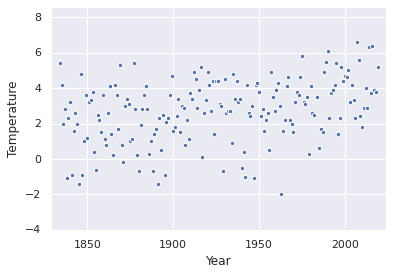

In [ ]:
# Plot the dataset
import matplotlib.pyplot as plt
# enable Matplotlib in this notebook.
%matplotlib inline

xmin = brussels.Year.min() - 5 
xmax = brussels.Year.max() + 5 
ymin = brussels.Temperature.min() - 2
ymax = brussels.Temperature.max() + 2

plt.xlim([xmin, xmax])
plt.ylim([ymin,ymax])
plt.scatter(brussels.Year, brussels.Temperature)

plt.xlabel('Year')
plt.ylabel('Temperature')

plt.show()

### Splitting the Data for Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
X = brussels.drop('Temperature',axis=1)
y = brussels['Temperature']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

print(X_train.shape)

print(X_test.shape)

(148, 1)
(38, 1)


### Training the model

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# y = mx + b, m = rico = coef_
linear_regression.coef_

array([0.01244762])

In [ ]:
# y = mx + b, b = snijpunt met y-as = intercept_
linear_regression.intercept_

-21.284783318157288

### Testing the model

In [ ]:
predicted = linear_regression.predict(X_test)
expected = y_test

In [ ]:
# ter visualisatie
for p, e in zip(predicted[::5], expected[::5]):  # check every 5th element
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 3.66, expected: 4.20
predicted: 1.73, expected: 3.60
predicted: 3.73, expected: 1.80
predicted: 2.04, expected: 3.10
predicted: 1.67, expected: 2.00
predicted: 3.78, expected: 6.30
predicted: 3.36, expected: 4.10
predicted: 3.03, expected: 1.60


### Determine the accuracy of a regression model

In [ ]:
from sklearn import metrics
import numpy as np

MAE = metrics.mean_absolute_error(expected,predicted)
print('Mean Absolute Error: '+ str(MAE))
print()

# nadeel: geeft een etal dat in de grootorde ligt van de kwadraten van uw afwijkingen
# grotere afwijkingen wegen zwaarder door dan bij MAE --> keuze afhankelijk van juist voorspellen in grote of kleine getallen
MSE = metrics.mean_squared_error(expected,predicted)
print('Mean Squared Error: '+ str(MSE))
print()

# lost probleem van MSE op
RMSE = np.sqrt(metrics.mean_squared_error(expected,predicted))
print('Root Mean Squared Error: '+ str(RMSE))
print()

# uitkomst 1: model past perfect voor de data
# andere waarden tussen 0 en 1, hoe dichter bij 1 hoe beter het model is
# uitkost 0: model niet beter dan gemiddelde nemen van vorige data
r2 = metrics.r2_score(expected,predicted)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 1.430577688830962

Mean Squared Error: 3.266742472998938

Root Mean Squared Error: 1.807413199298638

R square: 0.029243811632491568



### Predicting Future Temperatures and Estimating Past Temperatures

In [ ]:
# lambda implements y = mx + b
predict = (lambda x: linear_regression.coef_ * x + 
                     linear_regression.intercept_)

print(predict(1890))
print(predict(2020))
print(predict(2100))

[2.24121123]
[3.85940133]
[4.85521062]


### Add the Regression Line to the visualization

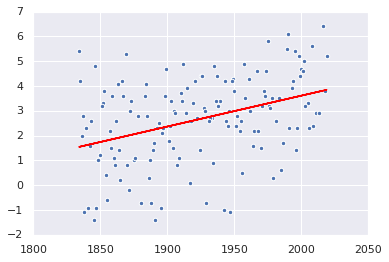

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train, linear_regression.intercept_ + X_train * linear_regression.coef_, color='red')

plt.show()

### What if we restrict data to >= 1950?

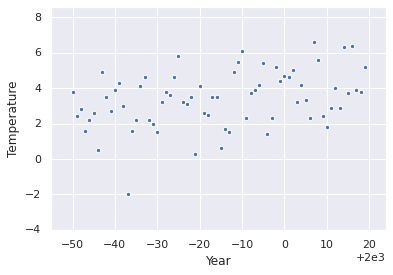

In [ ]:
brussels = brussels[brussels['Year'] >= 1950]

xmin = brussels.Year.min() - 5 
xmax = brussels.Year.max() + 5 
ymin = brussels.Temperature.min() - 2
ymax = brussels.Temperature.max() + 2

plt.xlim([xmin, xmax])
plt.ylim([ymin,ymax])
plt.scatter(brussels.Year, brussels.Temperature)

plt.xlabel('Year')
plt.ylabel('Temperature')

plt.show()

In [ ]:
X = brussels.drop('Temperature',axis=1)
y = brussels['Temperature']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
linear_regression.fit(X=X_train, y=y_train)
linear_regression.coef_

array([0.03322223])

In [ ]:
print(predict(2100))

[7.08801064]


In [ ]:
predicted = linear_regression.predict(X_test)

expected = y_test

MAE = metrics.mean_absolute_error(expected,predicted)
print('Mean Absolute Error: '+ str(MAE))

Mean Absolute Error: 1.2603594796443838


## Multiple Linear Regression
\begin{equation}
y=\ b_0+m_1x_1\ +m_2x_2+m_3x_3+\ldots+m_nx_n  
\end{equation}  


### Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the file Advertising.csv
url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/advertising.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# Give the dimensions of the dataset
data.shape

(200, 5)

In [ ]:
# Drop the column Unnamed: 0
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Visualizing data


In [ ]:
# niet noodzakelijk
import math

def roundup(x):
    return int(math.ceil(x / 10.0)) * 10

def rounddown(x):
    return int(math.floor(x / 10.0)) * 10

Text(0, 0.5, 'Sales')

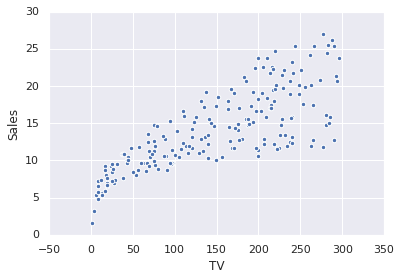

In [ ]:
# Plot the dataset Sales vs TV
# First calculate the minimum and the maximumvalue for TV

xminTV = rounddown(data['TV'].min()) - 50
xmaxTV = roundup(data['TV'].max()) + 50

plt.scatter(data['TV'], data['Sales'])
plt.xlim([xminTV, xmaxTV])
plt.xlabel('TV')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

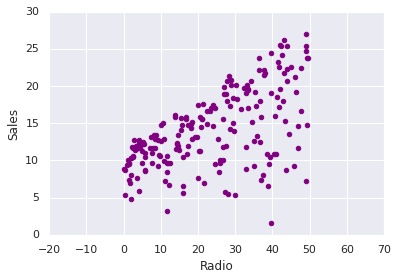

In [ ]:
# Plot the dataset Sales vs Radio
# First calculate the minimum and the maximumvalue for Radio

xminRadio = rounddown(data['Radio'].min()) - 20
xmaxRadio = roundup(data['Radio'].max()) + 20

plt.scatter(data['Radio'], data['Sales'], color='purple')
plt.xlim([xminRadio, xmaxRadio])
plt.xlabel('Radio')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

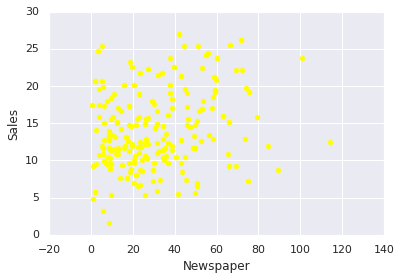

In [ ]:
# Plot the dataset Sales vs Newspaper
# First calculate the minimum and the maximumvalue for Newspaper

xminNewspaper = rounddown(data['Newspaper'].min()) - 20
xmaxNewspaper = roundup(data['Newspaper'].max()) + 20

plt.scatter(data['Newspaper'], data['Sales'], color='yellow')
plt.xlim([xminNewspaper, xmaxNewspaper])
plt.xlabel('Newspaper')
plt.ylabel('Sales')

### Splitting the data for training and testing

In [ ]:
# Use LinearRegression to predict the Sales
from sklearn.model_selection import train_test_split
X = data.drop('Sales',axis=1)
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

### Training the model


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# First we are using LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#To retrieve the intercept:
print("Intercept")
print(model.intercept_)
print()
#For retrieving the coefficients:
print("Coefficients")
print(model.coef_)

Intercept
2.752478000668752

Coefficients
[0.04687808 0.18897011 0.00298828]


**Example:**
\begin{equation}
y=\ 2.99+0.0448\ast\ TV\ +0.191\ast\ Radio-0.003\ast\ Newspaper
\end{equation}  

### Determine the accuracy of a regression model

In [ ]:
# Uitleg zie simpel linear regression
y_predict = model.predict(X_test)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE)+ "\n")

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE)+ "\n")

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE) + "\n")

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  

Mean Absolute Error: 1.4593543004841363

Mean Squared Error: 3.288241633272105

Root Mean Squared Error: 1.8133509404613617

R square: 0.8472269146270489


## Polynomial Regression
\begin{equation}
y=\ a+b\ast x+\ c\ast x²
\end{equation}

### Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/wintertempbrussels.xlsx'
brussels = pd.read_excel(url)
brussels.head()

,Year,Temperature
0,1834,5.4
1,1835,4.2
2,1836,2.0
3,1837,2.8
4,1838,-1.1


### Splitting the data for testing and training

In [ ]:
from sklearn.model_selection import train_test_split
X = brussels.drop('Temperature',axis=1)
y = brussels['Temperature']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

### Training the model


In [ ]:
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Now we are using Polynomial Regression. 
# This is still LinearRegression because the coefficients/weights associated with the features are still linear
poly = PolynomialFeatures(degree=2)
# fit_transform will turn x**2 into a feaure
X_train_transform = poly.fit_transform(X_train)   
X_test_transform = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_transform,y_train)

#To retrieve the intercept:
print("Intercept")
print(model.intercept_)
print()
#For retrieving the coefficients:
print("Coefficients")
print(model.coef_)

Intercept
385.0199207659726

Coefficients
[ 0.00000000e+00 -4.07493480e-01  1.08418466e-04]


### Determine the accuracy of a regression model

In [ ]:
y_predict = model.predict(X_test_transform)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE)+"\n")

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE)+"\n")

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE)+"\n")

mean = brussels['Temperature'].mean()
print ('Mean: ' + str(mean) +"\n")

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  

Mean Absolute Error: 1.4218057631659045

Mean Squared Error: 2.9888800211300137

Root Mean Squared Error: 1.7288377659948355

Mean: 2.7284946236559136

R square: 0.10459145010038007


### Visualize the model and data

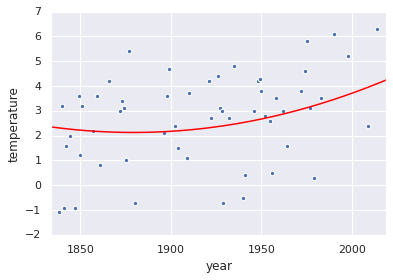

In [ ]:
# Calculate the result of the polynomial for a specific value of x
def p(x):
    result = model.intercept_
    for i in range(0, len(model.coef_)):
        result += model.coef_[i] * x**i 
    return result

# Plot the dataset
plt.scatter(X_test, y_test)
xmin = brussels['Year'].min()
xmax = brussels['Year'].max()
plt.xlim([xmin, xmax])
plt.xlabel('year')
plt.ylabel('temperature')

# Plot the polynomial
t1 = np.arange(xmin, xmax, 0.01)
plt.plot(t1, p(t1), color='red')
plt.show()

### Finding best model for polynomials of degree = 1..5

In [ ]:
from sklearn.model_selection import train_test_split
X = brussels.drop('Temperature',axis=1)
y = brussels['Temperature']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_train_transform = poly.fit_transform(X_train)
    X_test_transform = poly.fit_transform(X_test)

    model = LinearRegression()
    model.fit(X_train_transform,y_train)
    
    y_predict = model.predict(X_test_transform)    
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
    print('Root Mean Squared Error for i (test set) = ' + str(i) + ' is '+ str(RMSE))
    print()
    
    y_predict = model.predict(X_train_transform)
    RMSE = np.sqrt(metrics.mean_squared_error(y_train,y_predict))
    print('Root Mean Squared Error for i (training set) = ' + str(i) + ' is '+ str(RMSE))
    print() 

Root Mean Squared Error for i (test set) = 1 is 1.913211269978686

Root Mean Squared Error for i (training set) = 1 is 1.5196240551716016

Root Mean Squared Error for i (test set) = 2 is 1.8956117056711994

Root Mean Squared Error for i (training set) = 2 is 1.5119877297946158

Root Mean Squared Error for i (test set) = 3 is 1.8942086677409458

Root Mean Squared Error for i (training set) = 3 is 1.5112353371989447

Root Mean Squared Error for i (test set) = 4 is 1.8941576549345318

Root Mean Squared Error for i (training set) = 4 is 1.5111078680390813

Root Mean Squared Error for i (test set) = 5 is 1.894124663725731

Root Mean Squared Error for i (training set) = 5 is 1.5109769834261497



## Random Forrest Regression

### Data

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/bluebike.csv'

bb = pd.read_csv(url,sep=';')

In [ ]:
# restrict to all observations as of 2018-01-24
bb = bb[bb['Timestamp'] >= '2018-01-24']
print(bb.head(10))

                Timestamp  SPCapacityTotal  ...  DPCapacityInMaintenance  DPCheckSum
3671  2018-01-24 22:45:41               64  ...                        2          19
3672  2018-01-24 23:00:02               64  ...                        2          19
3673  2018-01-24 23:30:02               64  ...                        2          19
3674  2018-01-25 00:00:02               64  ...                        2          19
3675  2018-01-25 00:30:05               64  ...                        2          19
3676  2018-01-25 01:00:06               64  ...                        2          19
3677  2018-01-25 01:30:10               64  ...                        2          19
3678  2018-01-25 02:00:03               64  ...                        2          19
3679  2018-01-25 02:30:08               64  ...                        2          19
3680  2018-01-25 03:00:07               64  ...                        2          19

[10 rows x 11 columns]


In [ ]:
bb.columns

Index(['Timestamp', 'SPCapacityTotal', 'SPCapacityInUse',
       'SPCapacityAvailable', 'SPCapacityInMaintenance', 'SPCheckSum',
       'DPCapacityTotal', 'DPCapacityInUse', 'DPCapacityAvailable',
       'DPCapacityInMaintenance', 'DPCheckSum'],
      dtype='object')

In [ ]:
# drop columns irrelevant for model
bb = bb.drop('SPCapacityTotal',axis=1).drop('SPCapacityInUse',axis=1).drop('SPCapacityInMaintenance',axis=1)\
.drop('SPCheckSum',axis=1).drop('DPCapacityTotal',axis=1).drop('DPCapacityInUse',axis=1).drop('DPCapacityAvailable',axis=1)\
.drop('DPCapacityInMaintenance',axis=1).drop('DPCheckSum',axis=1)

In [ ]:
bb.head()

,Timestamp,SPCapacityAvailable
3671,2018-01-24 22:45:41,43
3672,2018-01-24 23:00:02,43
3673,2018-01-24 23:30:02,43
3674,2018-01-25 00:00:02,43
3675,2018-01-25 00:30:05,43


In [ ]:
# read weather observations
url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/weatherhistory.csv'
weather = pd.read_csv(url)
weather.head()

,id,observationtime,temperature,weather,windspeed,visibility,winddirection,precipation1hr,requestedlocation,observationlocation,updated
0,1,2017-10-22 18:37:22,11,Overcast,2,10,East,0,NaN,NaN,2018-05-31 13:46:32.857000000
1,2,2017-10-22 19:57:24,10,Overcast,2,10,East,0,NaN,NaN,2018-05-31 13:46:32.857000000
2,3,2017-10-22 20:57:57,9,Overcast,2,10,NE,0,NaN,NaN,2018-05-31 13:46:32.857000000
3,4,2017-10-22 21:57:16,9,Overcast,2,10,SE,0,NaN,NaN,2018-05-31 13:46:32.857000000
4,5,2017-10-22 22:57:59,9,Overcast,2,10,NE,0,NaN,NaN,2018-05-31 13:46:32.857000000


In [ ]:
# drop columns irrelevant for model
weather = weather.drop('id',axis=1).drop('winddirection',axis=1).drop('precipation1hr',axis=1).drop('requestedlocation',axis=1)\
.drop('observationlocation',axis=1).drop('updated',axis=1)

weather.head(10)

,observationtime,temperature,weather,windspeed,visibility
0,2017-10-22 18:37:22,11,Overcast,2,10
1,2017-10-22 19:57:24,10,Overcast,2,10
2,2017-10-22 20:57:57,9,Overcast,2,10
3,2017-10-22 21:57:16,9,Overcast,2,10
4,2017-10-22 22:57:59,9,Overcast,2,10
5,2017-10-22 23:57:55,8,Mostly Cloudy,2,10
6,2017-10-23 00:38:43,8,Mostly Cloudy,2,10
7,2017-10-23 01:56:57,10,Mostly Cloudy,2,10
8,2017-10-23 02:58:00,10,Mostly Cloudy,2,10
9,2017-10-23 03:56:46,10,Mostly Cloudy,2,10


In [ ]:
bb.count()

Timestamp              12769
SPCapacityAvailable    12769
dtype: int64

In [ ]:
weather.count()

observationtime    17104
temperature        17104
weather            16107
windspeed          17104
visibility         17104
dtype: int64

In [ ]:
# strip off seconds
weather['observationtime'] = weather.observationtime.str[0:16]

weather.head()

,observationtime,temperature,weather,windspeed,visibility
0,2017-10-22 18:37,11,Overcast,2,10
1,2017-10-22 19:57,10,Overcast,2,10
2,2017-10-22 20:57,9,Overcast,2,10
3,2017-10-22 21:57,9,Overcast,2,10
4,2017-10-22 22:57,9,Overcast,2,10


In [ ]:
# round to half hours and drop duplicates
import numpy as np
weather['observationtime'] = np.where(weather.observationtime.str[14:16]<'30',\
                                      weather.observationtime.str[0:14]+'00',weather.observationtime.str[0:14]+'30')

weather = weather.drop_duplicates(subset='observationtime', keep='first')

print(weather.head())

bb['Timestamp'] = np.where(bb.Timestamp.str[14:16]<'30',\
                           bb.Timestamp.str[0:14]+'00',bb.Timestamp.str[0:14]+'30')

bb = bb.drop_duplicates(subset='Timestamp', keep='first')

print(bb.head())

    observationtime  temperature   weather  windspeed  visibility
0  2017-10-22 18:30           11  Overcast          2          10
1  2017-10-22 19:30           10  Overcast          2          10
2  2017-10-22 20:30            9  Overcast          2          10
3  2017-10-22 21:30            9  Overcast          2          10
4  2017-10-22 22:30            9  Overcast          2          10
             Timestamp  SPCapacityAvailable
3671  2018-01-24 22:30                   43
3672  2018-01-24 23:00                   43
3673  2018-01-24 23:30                   43
3674  2018-01-25 00:00                   43
3675  2018-01-25 00:30                   43


In [ ]:
# merge the to dataframe together based on Timestamp and observationtime
bbweather = pd.merge(bb,weather,left_on='Timestamp',right_on='observationtime')

bbweather.head(10)

,Timestamp,SPCapacityAvailable,observationtime,temperature,weather,windspeed,visibility
0,2018-01-24 22:30,43,2018-01-24 22:30,8,Overcast,1,10
1,2018-01-24 23:00,43,2018-01-24 23:00,8,Rain,3,5
2,2018-01-24 23:30,43,2018-01-24 23:30,8,Overcast,5,13
3,2018-01-25 00:00,43,2018-01-25 00:00,8,Overcast,11,13
4,2018-01-25 01:00,43,2018-01-25 01:00,8,Mostly Cloudy,1,16
5,2018-01-25 01:30,43,2018-01-25 01:30,8,Mostly Cloudy,6,16
6,2018-01-25 02:00,43,2018-01-25 02:00,8,Mostly Cloudy,5,16
7,2018-01-25 02:30,43,2018-01-25 02:30,8,Mostly Cloudy,3,16
8,2018-01-25 03:00,43,2018-01-25 03:00,8,Mostly Cloudy,3,16
9,2018-01-25 03:30,43,2018-01-25 03:30,8,Partly Cloudy,1,16


In [ ]:
# extract hour from observationtime and convert to float
bbweather['hour'] = bbweather.observationtime.str[11:13].astype(float)\
+ np.where(bbweather.observationtime.str[14:16] == '00',0,0.5)

In [ ]:
# extract weekday from date
from datetime import date,datetime
bbweather['date'] = bbweather.observationtime.str[0:10]

bbweather['date'] = bbweather['date'].apply(pd.to_datetime,format='%Y-%m-%d')

bbweather['weekday'] = bbweather['date'].apply(date.weekday)

bbweather = bbweather.drop('date',axis=1)

bbweather = bbweather.drop('Timestamp',axis=1)

bbweather = bbweather.drop('observationtime',axis=1)

print(bbweather.head(10))

   SPCapacityAvailable  temperature        weather  ...  visibility  hour  weekday
0                   43            8       Overcast  ...          10  22.5        2
1                   43            8           Rain  ...           5  23.0        2
2                   43            8       Overcast  ...          13  23.5        2
3                   43            8       Overcast  ...          13   0.0        3
4                   43            8  Mostly Cloudy  ...          16   1.0        3
5                   43            8  Mostly Cloudy  ...          16   1.5        3
6                   43            8  Mostly Cloudy  ...          16   2.0        3
7                   43            8  Mostly Cloudy  ...          16   2.5        3
8                   43            8  Mostly Cloudy  ...          16   3.0        3
9                   43            8  Partly Cloudy  ...          16   3.5        3

[10 rows x 7 columns]


In [ ]:
# use one hot encoding for weather status
bbweather = pd.get_dummies(bbweather, columns=["weather"], prefix=["weather"])
print(bbweather.head(10))

   SPCapacityAvailable  temperature  ...  weather_Snow  weather_Thunderstorm
0                   43            8  ...             0                     0
1                   43            8  ...             0                     0
2                   43            8  ...             0                     0
3                   43            8  ...             0                     0
4                   43            8  ...             0                     0
5                   43            8  ...             0                     0
6                   43            8  ...             0                     0
7                   43            8  ...             0                     0
8                   43            8  ...             0                     0
9                   43            8  ...             0                     0

[10 rows x 15 columns]


### Splitting the data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X = bbweather.drop('SPCapacityAvailable',axis=1)
y = bbweather['SPCapacityAvailable']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

### Training the model

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

# create dictionary of models
modeldict = {'modelForest25':RandomForestRegressor(n_estimators=25),\
             'modelForest50':RandomForestRegressor(n_estimators=50),\
             'modelForest100':RandomForestRegressor(n_estimators=100),\
             'modelForest150':RandomForestRegressor(n_estimators=150),\
             'modelForest200':RandomForestRegressor(n_estimators=200),\
             'modelForest250':RandomForestRegressor(n_estimators=250)}
# initialize MAE by choosing a high value
MAE = 100000
# initialize bestmodel
bestmodel = 'modelForest25'

for modelkey in modeldict:
    model = modeldict[modelkey]

    model.fit(X_train,y_train)

    y_predict = model.predict(X_test)

    NEWMAE = mean_absolute_error(y_test,y_predict)
    if NEWMAE < MAE: 
        MAE = NEWMAE
        bestmodel = modelkey

print('Bestmodel: ' + bestmodel)
print('Mean Absolute Error: '+ str(MAE))
r2 = r2_score(y_test,y_predict)
print('R square: ' + str(r2))     

Bestmodel: modelForest100
Mean Absolute Error: 4.766635407696036
R square: 0.6845452043171534


## Exercise: Demographic Student Score

The data provided contains information about individual study results for mathematics, together with demographic information about the student. Solve each subquestion in one cell.

In [ ]:
import pandas as pd
# Read the file demographic.csv and show the first 5 lines
demographic = pd.read_csv('https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/demographic.csv')
demographic.head()

,StudentID,gender,race/ethnicity,parental level of education
0,0,female,group B,bachelor's degree
1,1,female,group C,some college
2,2,female,group B,master's degree
3,3,male,group A,associate's degree
4,4,male,group C,some college


In [ ]:
# Show the number of rows and columns in demographic.csv
demographic.shape

(1000, 4)

In [ ]:
# Read the file studentscore.csv and show the first 5 lines
student = pd.read_csv('https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/studentscore.csv')
student.head()

,StudentID,lunch,test preparation course,math score
0,0,standard,none,72
1,1,standard,completed,69
2,2,standard,none,90
3,3,free/reduced,none,47
4,4,standard,none,76


In [ ]:
# Show the number of rows and columns in studentscore.csv
student.shape

(1000, 4)

In [ ]:
# Merge both data frames so that you have one line left per student.
student = pd.merge(student,demographic, on='StudentID', how='inner')
student.head()

,StudentID,lunch,test preparation course,math score,gender,race/ethnicity,parental level of education
0,0,standard,none,72,female,group B,bachelor's degree
1,1,standard,completed,69,female,group C,some college
2,2,standard,none,90,female,group B,master's degree
3,3,free/reduced,none,47,male,group A,associate's degree
4,4,standard,none,76,male,group C,some college


In [ ]:
# Show the number of male and female students
student.groupby('gender')['gender'].count()

gender
female    518
male      482
Name: gender, dtype: int64

In [ ]:
# Show per 'gender' and per 'parental level of education' the average 'math score' in a pivot table. Put 'gender' in the columns and 'parental level of education' in the rows.
student.groupby(['parental level of education', 'gender'])['math score'].mean().unstack().fillna(0)

gender,female,male
parental level of education,,
associate's degree,65.250000,70.764151
bachelor's degree,68.349206,70.581818
high school,59.351064,64.705882
master's degree,66.500000,74.826087
some college,65.406780,69.009259
some high school,59.296703,67.840909


In [ ]:
# Later on we will make a prediction model for the 'math score'. Remove the column or columns that are not relevant for this purpose.
student = student.drop(['StudentID'], axis=1)
student.head()

,lunch,test preparation course,math score,gender,race/ethnicity,parental level of education
0,standard,none,72,female,group B,bachelor's degree
1,standard,completed,69,female,group C,some college
2,standard,none,90,female,group B,master's degree
3,free/reduced,none,47,male,group A,associate's degree
4,standard,none,76,male,group C,some college


In [ ]:
# Remove all lines that contain empty fields in some columns.
student = student.dropna()
student.head()

,lunch,test preparation course,math score,gender,race/ethnicity,parental level of education
0,standard,none,72,female,group B,bachelor's degree
1,standard,completed,69,female,group C,some college
2,standard,none,90,female,group B,master's degree
3,free/reduced,none,47,male,group A,associate's degree
4,standard,none,76,male,group C,some college


In [ ]:
# Replace the textual values of 'lunch', 'test preparation course' and 'gender' by numeric values 0 and 1.
import numpy as np

def f(status):
    mapping = {'standard': 0, 'free/reduced': 1}
    return mapping[status.strip()]

student['lunch'] = student['lunch'].map(f)

student['test preparation course'] = np.where(student['test preparation course'] == 'none', 0, 1)

student['gender'] = np.where(student['gender'] == 'male', 0, 1)

student.head()

,lunch,test preparation course,math score,gender,race/ethnicity,parental level of education
0,0,0,72,1,group B,bachelor's degree
1,0,1,69,1,group C,some college
2,0,0,90,1,group B,master's degree
3,1,0,47,0,group A,associate's degree
4,0,0,76,0,group C,some college


In [ ]:
# Use one-hot-encoding for the column 'race/ethnicity' Use one-hot-encoding for the column 'parental level of education'
student = pd.get_dummies(student,columns=['race/ethnicity'], prefix=['re'])
student = pd.get_dummies(student,columns=['parental level of education'], prefix=['edu'])
student.head()

,lunch,test preparation course,math score,gender,re_group A,re_group B,re_group C,re_group D,re_group E,edu_associate's degree,edu_bachelor's degree,edu_high school,edu_master's degree,edu_some college,edu_some high school
0,0,0,72,1,0,1,0,0,0,0,1,0,0,0,0
1,0,1,69,1,0,0,1,0,0,0,0,0,0,1,0
2,0,0,90,1,0,1,0,0,0,0,0,0,1,0,0
3,1,0,47,0,1,0,0,0,0,1,0,0,0,0,0
4,0,0,76,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
# Create a model to predict the 'math score' based on the other relevant features. Use the RandomForestRegressor method. Automatically search for the optimal number of trees between 50 and 400 in increments of 50. Use RMSE (root mean squared error or the square root of mean squared error) to determine the accuracy of each model. Show the number of trees of the optimal model and the corresponding RMSE.
from sklearn.model_selection import train_test_split
X = student.drop('math score',axis=1)
y = student['math score']

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

X_remainder, X_test, y_remainder, y_test = train_test_split(X,y,test_size=0.30)

best_MAE = 1000
best_trees = 0

for trees in range(50,500,50):
    X_train, X_validation, y_train, y_validation = train_test_split(X_remainder,y_remainder,test_size=0.30)
    model = RandomForestRegressor(n_estimators=trees)

    model.fit(X_train, y_train)    
    y_validation2 = model.predict(X_validation)
    MAE = mean_absolute_error(y_validation, y_validation2)
    if MAE < best_MAE:
        best_MAE = MAE
        best_trees = trees
        best_validation = model.predict(X_test)
        
print('Optimal number of trees = % s' %(best_trees))
print('MAE on validation set = % 3.2f' % (best_MAE)) 
MAEOnTestSet = mean_absolute_error(y_test, best_validation)
print('MAE on test set = % 3.2f' % (MAEOnTestSet))
r2 = r2_score(y_test,best_validation)
print('R square: ' + str(r2))   

Optimal number of trees = 400
MAE on validation set =  11.11
MAE on test set =  12.12
R square: 0.0746175021168698


In [ ]:
# If you run the program several times, do you always get the same optimal number of trees as best? Explain!
# two kinds of randomization:
# - train_test_split
# - RANDOM forest

In [ ]:
# Show the relative importance of each of the features arranged according to decreasing importance. However, you have to merge the one-hot-encoded features, adding up their relative importance. Hint: df.index returns the index of the DataFrame df as Pandas Series.
imp = pd.DataFrame(model.feature_importances_,columns=['Importance'],index=X_train.columns).sort_values(by='Importance',ascending=False)
print(imp.index)
print()
imp = imp.reset_index()
print(imp)
print()
imp['index'] = np.where(imp['index'].str.startswith('re_'),'race/ethnicity',imp['index'])
imp['index'] = np.where(imp['index'].str.startswith('edu_'),'parental level of education',imp['index'])
print(imp)
print()
# the result of groupby and sum is of datatype Seris, so sort_values doesn't need a by='col' parameter
imp.groupby('index')['Importance'].sum().sort_values(ascending=False)

Index(['lunch', 'gender', 'test preparation course', 'edu_some high school',
       're_group B', 're_group E', 're_group C', 're_group D',
       'edu_high school', 'edu_associate's degree', 're_group A',
       'edu_some college', 'edu_bachelor's degree', 'edu_master's degree'],
      dtype='object')

                      index  Importance
0                     lunch    0.198397
1                    gender    0.114335
2   test preparation course    0.105372
3      edu_some high school    0.071758
4                re_group B    0.062969
5                re_group E    0.060448
6                re_group C    0.058356
7                re_group D    0.057367
8           edu_high school    0.056527
9    edu_associate's degree    0.051151
10               re_group A    0.050009
11         edu_some college    0.044528
12    edu_bachelor's degree    0.038189
13      edu_master's degree    0.030593

                          index  Importance
0                         lunch    0.198397
1     

index
parental level of education    0.292747
race/ethnicity                 0.289149
lunch                          0.198397
gender                         0.114335
test preparation course        0.105372
Name: Importance, dtype: float64

## Exercise: Building OAT


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import buildingoat.csv. Show the first 5 records
url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/buildingoat.csv'
data = pd.read_csv(url)
data.head()

,Timestamp,OAT (F),Power (kW)
0,1/1/2010 1:15,51,165.1
1,1/1/2010 1:30,51,151.6
2,1/1/2010 1:45,51,146.9
3,1/1/2010 2:00,51,153.7
4,1/1/2010 2:15,51,153.8


In [ ]:
# Convert the type of Timestamp from 'object' to 'datetime'. This will change the format of Timestamp
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%m/%d/%Y %H:%M')
data.head()

,Timestamp,OAT (F),Power (kW)
0,2010-01-01 01:15:00,51,165.1
1,2010-01-01 01:30:00,51,151.6
2,2010-01-01 01:45:00,51,146.9
3,2010-01-01 02:00:00,51,153.7
4,2010-01-01 02:15:00,51,153.8


In [ ]:
def converter(tempF):
  return (tempF-32)/1.8

data["OAT (C)"] = data["OAT (F)"].apply(converter)
data = data.drop("OAT (F)", axis=1)
data.head()

,Timestamp,Power (kW),OAT (C)
0,2010-01-01 01:15:00,165.1,10.555556
1,2010-01-01 01:30:00,151.6,10.555556
2,2010-01-01 01:45:00,146.9,10.555556
3,2010-01-01 02:00:00,153.7,10.555556
4,2010-01-01 02:15:00,153.8,10.555556


In [ ]:
# Convert the type of 'Timestamp' to String
data['Timestamp'] = data['Timestamp'].astype(str)
data.head()

,Timestamp,Power (kW),OAT (C)
0,2010-01-01 01:15:00,165.1,10.555556
1,2010-01-01 01:30:00,151.6,10.555556
2,2010-01-01 01:45:00,146.9,10.555556
3,2010-01-01 02:00:00,153.7,10.555556
4,2010-01-01 02:15:00,153.8,10.555556


In [ ]:
# Give the dimensions of the dataset
data.shape

(34940, 3)

In [ ]:
# Drop the rows that have columns with no available data
data = data.dropna()

In [ ]:
# Give the new dimensions of the dataset
data.shape

(34940, 3)

In [ ]:
# Give the statistics of the dataset
data.describe()

,Power (kW),OAT (C)
count,34940.000000,34940.000000
mean,261.644659,14.769828
std,65.673392,4.855195
min,0.000000,0.555556
25%,194.600000,11.666667
50%,276.700000,14.444444
75%,312.300000,17.777778
max,457.900000,37.777778


In [ ]:
# You can see that the minimum value of Power (kW) is 0.0
# Calculate the mean and the standard deviation for Power (kW)
mPower = data['Power (kW)'].mean()
sdPower = data['Power (kW)'].std()
print("mean: "+ str(mPower))
print("standard deviation: "+ str(sdPower))

mean: 261.6446594161415
standard deviation: 65.67339168302733


In [ ]:
# The 68-95-99.7 - rule in mind: drop all values that are more than 3 standard deviations from the mean
# This is a popular way of removing outliers from the dataset, which are often bad registrations. 
data = data[(data['Power (kW)'] >= (mPower - 3*sdPower)) & (data['Power (kW)'] <= (mPower + 3*sdPower))]
data

,Timestamp,Power (kW),OAT (C)
0,2010-01-01 01:15:00,165.1,10.555556
1,2010-01-01 01:30:00,151.6,10.555556
2,2010-01-01 01:45:00,146.9,10.555556
3,2010-01-01 02:00:00,153.7,10.555556
4,2010-01-01 02:15:00,153.8,10.555556
...,...,...,...
34935,2010-12-30 23:00:00,285.8,8.333333
34936,2010-12-30 23:15:00,206.6,6.666667
34937,2010-12-30 23:30:00,205.9,6.666667
34938,2010-12-30 23:45:00,189.4,6.666667


In [ ]:
# Give the new dimensions of the dataset
data.shape

(34913, 3)

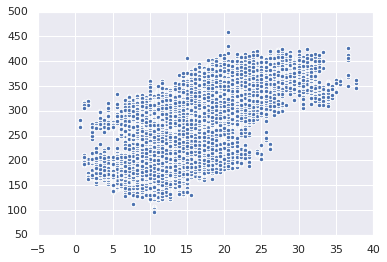

In [ ]:
# Plot the Power (kW) versus the OAT (F)
plt.scatter(data["OAT (C)"], data["Power (kW)"])

In [ ]:
# The Power is highly dependent on the month of the year, the day of the week and the time of the day
# We will use this information to incorporate it into our regression model.
# Add an extra column Month. The month has the integer value of the month (e.g. not 01, but 1)
data['Month'] = data['Timestamp'].str[5:7].astype(int)
data.head()

,Timestamp,Power (kW),OAT (C),Month
0,2010-01-01 01:15:00,165.1,10.555556,1
1,2010-01-01 01:30:00,151.6,10.555556,1
2,2010-01-01 01:45:00,146.9,10.555556,1
3,2010-01-01 02:00:00,153.7,10.555556,1
4,2010-01-01 02:15:00,153.8,10.555556,1


In [ ]:
# Add an extra column Day. The day has the integer value of the day (e.g. not 01, but 1)
data['Day'] = data['Timestamp'].str[8:10].astype(int)
data.head()

,Timestamp,Power (kW),OAT (C),Month,Day
0,2010-01-01 01:15:00,165.1,10.555556,1,1
1,2010-01-01 01:30:00,151.6,10.555556,1,1
2,2010-01-01 01:45:00,146.9,10.555556,1,1
3,2010-01-01 02:00:00,153.7,10.555556,1,1
4,2010-01-01 02:15:00,153.8,10.555556,1,1


In [ ]:
# Add an extra column Hour. The Hour has the integer value of the hour (e.g. not 01, but 1)
data['Hour'] = data['Timestamp'].str[11:13].astype(int)
data.head()

,Timestamp,Power (kW),OAT (C),Month,Day,Hour
0,2010-01-01 01:15:00,165.1,10.555556,1,1,1
1,2010-01-01 01:30:00,151.6,10.555556,1,1,1
2,2010-01-01 01:45:00,146.9,10.555556,1,1,1
3,2010-01-01 02:00:00,153.7,10.555556,1,1,2
4,2010-01-01 02:15:00,153.8,10.555556,1,1,2


In [ ]:
# Select the data of 1 specific day (e.g. 2010-03-04)
day = data[data["Timestamp"].str[0:10] == "2010-03-04"]
day.head()

,Timestamp,Power (kW),OAT (C),Month,Day,Hour
5947,2010-03-04 00:00:00,164.2,7.222222,3,4,0
5948,2010-03-04 00:15:00,164.2,6.666667,3,4,0
5949,2010-03-04 00:30:00,160.7,6.666667,3,4,0
5950,2010-03-04 00:45:00,174.0,6.666667,3,4,0
5951,2010-03-04 01:00:00,186.2,6.666667,3,4,1


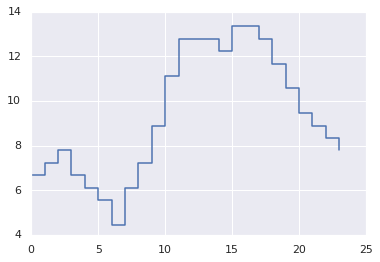

In [ ]:
# Plot for that day the OAT (C) versus the Hour of day
plt.plot(day["Hour"], day["OAT (C)"])

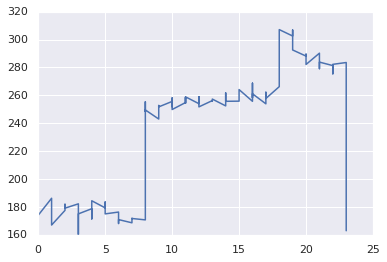

In [ ]:
# Plot the Power (kW) versus the Hour of day
# This clearly illustrates people require less heating at night. 
plt.plot(day["Hour"], day["Power (kW)"])

In [ ]:
# Use RandomForestRegressor to predict the Power (kW)
# find the optimal number of trees based on MAE

from sklearn.model_selection import train_test_split
X = data.drop(['Timestamp','Power (kW)'],axis=1)
y = data['Power (kW)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

X_remainder, X_test, y_remainder, y_test = train_test_split(X,y,test_size=0.30)

best_MAE = 1000
best_trees = 0

for trees in range(50,500,50):
    X_train, X_validation, y_train, y_validation = train_test_split(X_remainder,y_remainder,test_size=0.30)
    model = RandomForestRegressor(n_estimators=trees)

    model.fit(X_train, y_train)    
    y_validation2 = model.predict(X_validation)
    MAE = mean_absolute_error(y_validation, y_validation2)
    if MAE < best_MAE:
        best_MAE = MAE
        best_trees = trees
        best_validation = model.predict(X_test)
        best_model_random_forest = model

print('Optimal number of trees = % s \n' %(best_trees))
print('MAE on validation set = % 3.2f \n' % (best_MAE)) 
MAEOnTestSet = mean_absolute_error(y_test, best_validation)
print('MAE on test set = % 3.2f \n' % (MAEOnTestSet))
r2 = r2_score(y_test,best_validation)
print('R square: ' + str(r2))  

Optimal number of trees = 100 

MAE on validation set =  10.05 

MAE on test set =  10.30 

R square: 0.924236916447789


In [ ]:
# Use Multiple Polynomial Regression to predict the Power (kW) 
# Find the optimal polynomial degree based on MAE
# Compare the MAE to Random Forest

from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

MAE = 100000
# initialize bestmodel
best_model_poly = 1

for i in range(1,10):
    poly = PolynomialFeatures(degree=i)
    X_train_transform = poly.fit_transform(X_train)
    X_test_transform = poly.fit_transform(X_test)

    model = LinearRegression()
    model.fit(X_train_transform,y_train)
    
    y_predict = model.predict(X_test_transform)    
    '''
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
    print('Root Mean Squared Error for i (test set) = ' + str(i) + ' is '+ str(RMSE))
    print()
    '''
    '''
    y_predict = model.predict(X_train_transform)
    RMSE = np.sqrt(metrics.mean_squared_error(y_train,y_predict))
    print('Root Mean Squared Error for i (training set) = ' + str(i) + ' is '+ str(RMSE))
    print() 
    '''
    NEWMAE = mean_absolute_error(y_test,y_predict)
    if NEWMAE < MAE: 
        MAE = NEWMAE
        best_model_poly = i
        best_validation_poly = y_predict



print('Bestmodel: ' + str(best_model_poly) + "\n")

MAE = metrics.mean_absolute_error(y_test,best_validation_poly)
print('Mean Absolute Error: '+ str(MAE)+"\n")

MSE = metrics.mean_squared_error(y_test,best_validation_poly)
print('Mean Squared Error: '+ str(MSE)+"\n")

RMSE = np.sqrt(metrics.mean_squared_error(y_test,best_validation_poly))
print('Root Mean Squared Error: '+ str(RMSE)+"\n")

mean = data['Power (kW)'].mean()
print ('Mean: ' + str(mean) +"\n")

r2 = metrics.r2_score(y_test,best_validation_poly)
print('R square: ' + str(r2))  

Bestmodel: 9

Mean Absolute Error: 16.30333874036508

Mean Squared Error: 551.0394239321838

Root Mean Squared Error: 23.47422893157907

Mean: 261.844313006616

R square: 0.8701381008279966


# Image Classification

## Case: digit recognition - data exploration

In [ ]:
import numpy as np
import pandas as pd

# keras import for the dataset
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# each training and test element is a 28 x 28 pixel grayvalue image 
print(X_train[0].shape)
np.set_printoptions(linewidth=np.inf) # avoid line wrapping when printing array
print(X_train[0])

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 2

In [ ]:
# the corresponding label is the "real" digit
print(y_train[0])

print(np.unique(y_train, return_counts=True)) # show all unique labels

5
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


<Figure size 432x288 with 0 Axes>

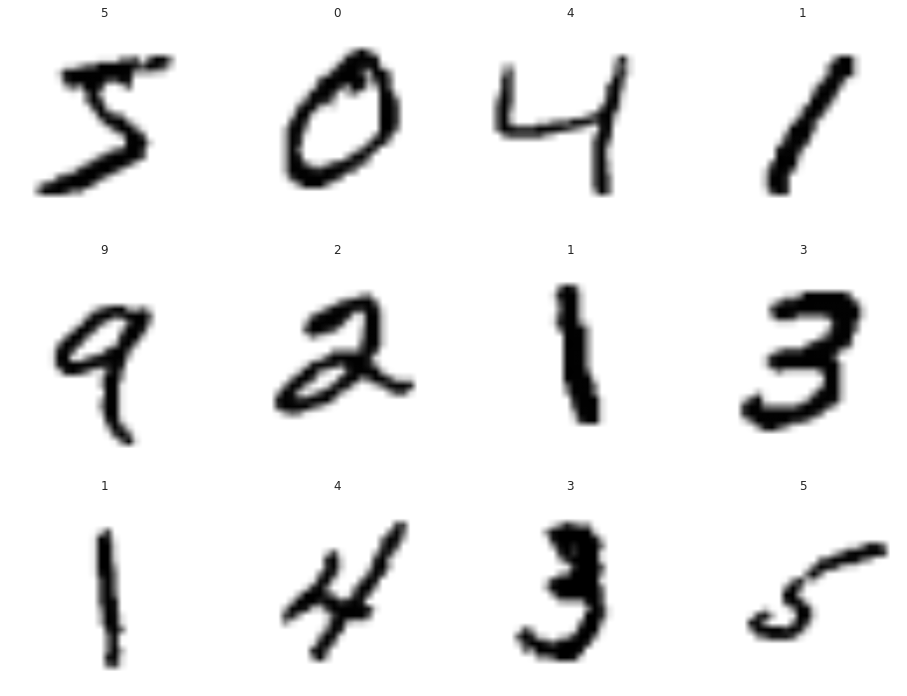

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()
nrows,ncols = 3,4
plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 12))

for i in range(12):  # show first 12 digits
  plt.subplot(nrows,ncols,i+1)  # i+1 is position of subplot in 3 x 4 table
  # show bitmap, interpret 0 as white and 255 as black (grayvalues)
  plt.imshow(X_train[i], cmap=plt.cm.gray_r)
  plt.title(y_train[i])   # real value as title
  plt.xticks([])   # no ticks on x axis
  plt.yticks([])   # not ticks on y axis

## Image classificition with a Random Forest Classifier

### Data

In [ ]:
import numpy as np

# keras import for the dataset
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels = linearize the image to get a 784 (= 28x28) vector
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# normalizing the data to help with the training
# normalized data leads to better models (waarden tussen 0 en 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


### Training the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)

y_test2 = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test2)

0.9705

## Image Classification with Artifical Neural Networks in Keras

### Preparation

In [ ]:
# Check if gpu is used (optional)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7609180176404912669
]


In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

# fix random seed for reproducibility
seed = 2020
np.random.seed(seed)  

import sklearn as sk
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

2.4.0


In [ ]:
# helper functions for visualisation
# plotting the loss functions used in this notebook
# we plot the loss we want to optimise on the left (in this case: accuracy)
def plot_history(history):
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)

  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),'g-',
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),'r-',
           label = 'Validation accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Loss minimised by model')
  plt.plot(history.epoch, np.array(history.history['loss']),'g-',
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),'r-',
           label = 'Validation loss')
  plt.legend()

### Loading the data


In [ ]:
# load train and test data
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

# let's print the shape before we reshape and normalize
print("X_train_all shape", X_train_all.shape)
print("y_train_all shape", y_train_all.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels = linearize the image to get a 784 (= 28x28) vector
X_train_all = X_train_all.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# some preprocessing ... convert integers to floating point and rescale them to [0,1] range
# normalized data leads to better models
X_train_all = X_train_all.astype('float32')
X_test = X_test.astype('float32')
X_train_all /= 255
X_test /= 255

# print the final input shape 
print("Train_all matrix shape", X_train_all.shape)
print("Test matrix shape", X_test.shape)

X_train_all shape (60000, 28, 28)
y_train_all shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train_all matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [ ]:
# This data set contains a training set and a test set
# we still need to split off a validation set

# Number of test samples
N_test = X_test.shape[0]

# split off 10000 samples for validation
N_val = 10000
N_train = X_train_all.shape[0] - N_val

# now extract the samples into train, validate and test sets
# set random state = 0 to make sure you get the same split each time
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size = N_val, random_state=0)

### Multi-class classification

In [ ]:
y_train_all = keras.utils.to_categorical(y_train_all)
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)
y_test = keras.utils.to_categorical(y_test)

# look at the new labels for the first sample
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Model

In [ ]:
num_classes = 10

# this first network has 2 hidden layers
# the first layer needs to be told explicitly what the input shape is
# the output layer has 10 neurons: one neuron per class (digit)

# Note that we use the "He" initialisation scheme here, since this is often advised 
# for layers with ReLu neurons

# Also note that "dropout" is implemented in separate layers in Keras
# they are added below in comment 
# note that you can also start your network with a dropout layer (randomly setting input features to 0)

def initial_model():
    # we create a variable called model, and we set it equal to an instance of a Sequential object.
    model = Sequential()


    # The first Dense object is the first hidden layer. Dense is one particular type of layer, but there are many other types
    # Dense is the most basic kind of layer in an ANN and each output of a dense layer is computed using every input to the layer
    # The input shape parameter input_shape=(784,) tells us how many neurons our input layer has, so in our case, we have 784.
    # The neural network needs to start with some weights and then iteratively updates them to better values. 
    # The term kernel_initializer is a fancy term for the statistical distribution or function 
    # to use for initialising the weights. 
    # The input layer shape is specified as a parameter to the first Dense object’s constructor.
    # Volledig geconnecteerde laag met 32 neuronen en ReLU als activatiefunctie en als input 784
    model.add(Dense(32, activation='relu', input_shape=(784,), kernel_initializer='he_uniform'))
    # then add some dropout, set at a very low value for now
    # model.add(Dropout(0.5))
    # a second dense layer with half as many neurons
    # Volledig geconnecteerde laag met 16 neuronen en ReLU als activatiefunctie en als input niet nodig kan hij afleiden uit vorige laag
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))    
    # some more dropout
    # model.add(Dropout(0.5))      
    # and the output layer
    model.add(Dense(num_classes, activation='softmax'))


    # Before we can train our model, we must compile it
    # To the compile() function, we are passing the optimizer, the loss function, and the metrics that we would like to see. 
    # Notice that the optimizer we have specified is called Adam. Adam is just a variant of SGD. 
    model.compile(loss='categorical_crossentropy',
                  optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
                  metrics=['accuracy']) 
    return model

### Training


In [ ]:
# Create your model
model_1 = initial_model()
model_1.summary()

# We now add batch size to the mix of training parameters
# If you don't specify batch size below, all training data will be used for each learning step
# aantal inputs dat in één keer aan het model wordt aangeboden
batch_size = 16
# aantal stappen van training, per epoch wordt de hele trainingset gebruikt
epochs = 20

# We fit our model to the data. Fitting the model to the data means to train the model on the data.
# X_train is a numpy array consisting of the training samples.
# y_train is a numpy array consisting of the corresponding labels for the training samples.
# batch_size specifies how many training samples should be sent to the model at once.
# epochs = how many times the complete training set (all of the samples) will be passed to the model.
# verbose = 1 indicates how much logging we will see as the model trains. (other values are a.o. 0, 2)
history_1 = model_1.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, y_val)
                    )

# The output gives us the following values for each epoch:
# Epoch number
# Duration in seconds
# Loss
# Accuracy

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
3125/3125 [==============================] - 6s 2ms/step - loss: 0.5945 - accuracy: 0.8112 - val_loss: 0.2001 - val_accuracy: 0.9398
Epoch 2/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.1838 - accuracy: 0.9453 - val_loss: 0.1517 - val_accuracy: 0.9539
Epoch 3/20
3125/3125 [==============================] - 5s 2ms/step - loss: 0.1381 - accuracy:

Training set Accuracy:   0.99
Training set Loss: 0.0264

Validation set Accuracy:   0.97
Validation set Loss: 0.1510



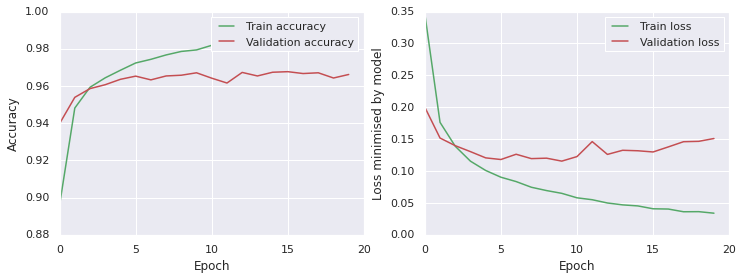

In [ ]:
# model_1 now contains the model at the end of the training run
# We analyse the result:

[train_loss, train_accuracy] = model_1.evaluate(X_train, y_train, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model_1.evaluate(X_val, y_val, verbose=0)
print("Validation set Accuracy:{:7.2f}".format(val_accuracy))
print("Validation set Loss:{:7.4f}\n".format(val_loss))

#Now we visualise what happened during training
plot_history(history_1)

### Final model and analysis

In [ ]:
model_for_test = initial_model()
model_for_test.summary()

# We now add batch size to the mix of training parameters
# If you don't specify batch size below, all training data will be used for each learning step
batch_size = 128
epochs = 50

history_for_test = model_for_test.fit(X_train_all, y_train_all,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1
                    )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
469/469 [==============================] - 2s 3ms/step - loss: 0.9558 - accuracy: 0.7101
Epoch 2/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2462 - accuracy: 0.9326
Epoch 3/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2007 - accuracy: 0.9422
Epoch 4/50
469/469 [==============================] - 1s 2ms/step - loss: 0.1695

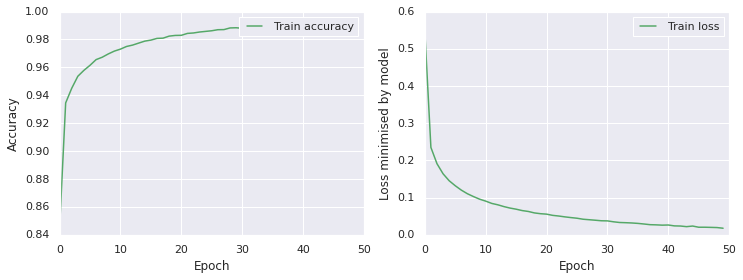

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history_for_test.epoch, np.array(history_for_test.history['accuracy']),'g-',
        label='Train accuracy')
        # g-: green solid line
plt.legend()

plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Loss minimised by model')
plt.plot(history_for_test.epoch, np.array(history_for_test.history['loss']),'g-',
        label='Train loss')
plt.legend()

In [ ]:
[train_loss, train_accuracy] = model_for_test.evaluate(X_train_all, y_train_all, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[test_loss, test_accuracy] = model_for_test.evaluate(X_test, y_test, verbose=0)
print("Test set Accuracy:{:7.2f}".format(test_accuracy))
print("Test set Loss:{:7.4f}\n".format(test_loss))

Training set Accuracy:   1.00
Training set Loss: 0.0141

Test set Accuracy:   0.96
Test set Loss: 0.1774



### Evaluation

In [ ]:
predictions = model_for_test.predict(X_test)
# The first digit should be a 7 (shown as 1. at index 7)
print(y_test[0])

# Check the probabilities returned by predict for first test sample
# The function enumerate() receives and iterable and creates an iterator that, for each element, 
# returns a tuple containing the element's index and value
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')
    
# Our model believes this digit is a 7 with nearly 100% certainty
# Not all predictions have this level of certainty

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0: 0.0000000342%
1: 0.0000000028%
2: 0.0000000358%
3: 0.0000007888%
4: 0.0000000000%
5: 0.0000000000%
6: 0.0000000000%
7: 100.0000000000%
8: 0.0000000000%
9: 0.0000008402%


In [ ]:
# Locating the Incorrect Predictions
images = X_test.reshape((10000, 28, 28))

incorrect_predicted_images = []
predicted_digits = []
expected_digits = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predicted_images.append(images[i])
        predicted_digits.append(predicted)
        expected_digits.append(expected)

<Figure size 432x288 with 0 Axes>

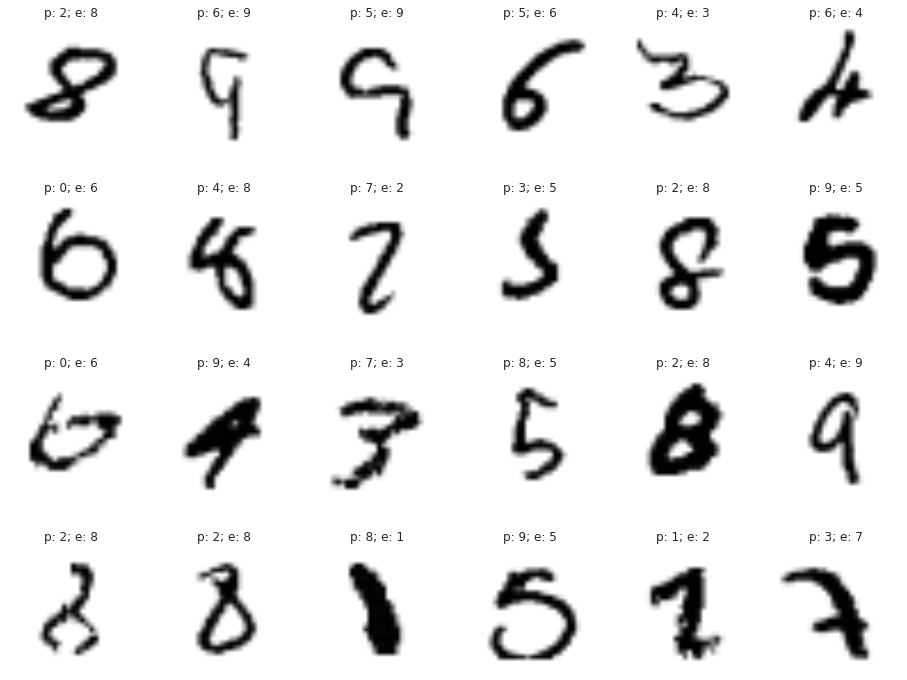

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()
nrows,ncols=4,6
plt.subplots(nrows,ncols, figsize=(16, 12))

for i in range(nrows*ncols):  # show first 24 digits
  plt.subplot(nrows,ncols,i+1)  # i+1 is position of subplot in nrows x ncols table
  # show bitmap, interpret 0 as white and 255 as black (grayvalues)
  plt.imshow(incorrect_predicted_images[i].reshape(28,28), cmap=plt.cm.gray_r)
  plt.title(f'p: {predicted_digits[i]}; e: {expected_digits[i]}')
  plt.xticks([])   # no ticks on x axis
  plt.yticks([])   # not ticks on y axis

## ANN Model optimizaton by hyperparameter tuning

### Explanation exercise

In the previous example we used as model hyperparameters: 

* 1 hidden layer with 32 neurons 
* 1 hidden layer with 16 neurons 
* learning rate = 0.001 
* batch size = 16 
* nr of epochs = 20 

*Conclusion*
With this initial model, we can see that the learning curves have not converged yet: the accuracy is still increasing and the loss decreasing. The initial number of epochs set at 20 was not long enough. Plus, the curves are very bumpy. To fix both these problems, we can increase the number of epochs to reach convergence, and increase the batch size to make the curves smoother.

**Exercise 1: increase number of epochs and batch size**

Use new model parameters: 

* 1 hidden layer with 32 neurons
* 1 hidden layer with 16 neurons
* learning rate = 0.001
* batch size = 512
* nr of epochs = 50

Make the new plot: 

*Conclusion*

We can see that the shapes of the curves now look better. However, training accuracy perhaps can be improved with a more complex architecture. 
  
Our goal for now is to make the architecture powerful enough, so we will only look at the training accuracy and loss, and improve them the best as possible. We will explore both layer width and network depth. 

**Exercise 2: improve the architecture to make it powerful enough**


The initial model had 2 hidden layers with 32 and 16 neurons each. We will first try to increase the number of neurons to 128 for the first layer and 64 for the second layer, and see how the model perfoms with a wider architecture.
Model:
* 1 hidden layer with 128 neurons
* 1 hidden layer with 64 neurons
* learning rate = 0.001
* batch size = 1024
* nr of epochs = 50

Make the new plot: 


*Conclusion*

We can see that the training accuracy has significantly increased to be extremely close to 1. The loss has also decreased to be very close to 0. Adding more neurons to the hidden layers has increased the number of trainable parameters. This explains the better performance. Even if we see that the model is overfitting, our goal is to increase performance on the training set.
We will try to increase the number of neurons to 512 and 256. We will also decrease learning rate to 0.0001.

**Exercise 3: increase number of neurons and decrease learning rate**

Model:
* 1 hidden layer with 512 neurons
* 1 hidden layer with 256 neurons
* learning rate = 0.0001
* batch size = 512
* nr of epochs = 50

Make the new plot: 

*Conclusion*

As expected, training accuracy has well increased with double the number of neurons per hidden layer.

**Exercise 4: make network deeper**

We will now try to make our network deeper. We will add a third hidden layer in order to try to improve our neural network even more.

Model:
* 1 hidden layer with 512 neurons
* 1 hidden layer with 256 neurons
* 1 hidden layer with 128 neurons
* learning rate = 0.0001
* batch size = 512
* nr of epochs = 50

Make the new plot: 

*Conclusion*

We will try to make our architecture even more complex by increasing the number of neurons.

**Exercise 5: increase number of neurons**

Model:
* 1 hidden layer with 800 neurons
* 1 hidden layer with 400 neurons
* 1 hidden layer with 200 neurons
* learning rate = 0.0001
* batch size = 1024
* nr of epochs = 50

Make the new plot: 

*Conclusion*

With 3 hidden layers and even more neurons, we obtain a very powerful model that reaches perfect accuracy again on the training data. Learning convergence is also verified.
To speed up processing time, we can try to increase the learning rate back from 0.0001 to 0.001.

**Exercise 6: increase learning rate**

Model:
* 1 hidden layer with 800 neurons
* 1 hidden layer with 400 neurons
* 1 hidden layer with 200 neurons
* learning rate = 0.001
* batch size = 1024
* nr of epochs = 50

Make the new plot: 

*Conclusion*

As expected, processing time is faster. The performance offered by this model is satisfying : very high accuracy and very low error on the training data.
We would like to try to deepen our architecture once again and add a fourth hidden layer to see how the performance would evolve.

**Exercise 7: further deepen architecture**
Model:
* 1 hidden layer with 800 neurons
* 1 hidden layer with 400 neurons
* 1 hidden layer with 400 neurons
* 1 hidden layer with 200 neurons
* learning rate = 0.001
* batch size = 1024
* nr of epochs = 50

Make the new plot: 

*Conclusion*

The curves are very bumpy. We choose to keep the simpler model with 3 hidden layers.
Now that we have obtained an architecture that offers satisfying results on the training data, the previous model (3 hidden layers with 800, 400 and 200 neurons) will be kept. However we can notice a generalization gap between the training and validation accuracy curves. We will then add dropout as to prevent the model from overfitting.

**Exercise 8: add dropout**

First, we will add dropout to the hidden layers only. Dropout should help the model to generalize better on unseen data. Indeed, a certain fraction of neurons are switched off. As each node has a certain probability of being dropped out, each neuron is forced to be important on its own and rely less on the other neurons. That is the reason why dropout enables a reduced probability of overfitting.

We first choose a dropout probability of 0,1 which means that each node has a probability of 0,1 of being dropped out.


Model:
* 1 hidden layer with 800 neurons
* Dropout = 0.1
* 1 hidden layer with 400 neurons
* Dropout = 0.1
* 1 hidden layer with 200 neurons
* Dropout = 0.1
* learning rate = 0.0001
* batch size = 1024
* nr of epochs = 50


Make the new plot: 

*Conclusion*

With a dropout probability of 0,1, the validation loss is lower. 

### preparation & loading the data & multi-class classification

In [ ]:
# Check if gpu is used (optional)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())



try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

# fix random seed for reproducibility
seed = 2020
np.random.seed(seed)  

import sklearn as sk
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model



# helper functions for visualisation
# plotting the loss functions used in this notebook
# we plot the loss we want to optimise on the left (in this case: accuracy)
def plot_history(history):
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)

  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),'g-',
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),'r-',
           label = 'Validation accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Loss minimised by model')
  plt.plot(history.epoch, np.array(history.history['loss']),'g-',
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),'r-',
           label = 'Validation loss')
  plt.legend()



# load train and test data
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()



# let's print the shape before we reshape and normalize
print("X_train_all shape", X_train_all.shape)
print("y_train_all shape", y_train_all.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels = linearize the image to get a 784 (= 28x28) vector
X_train_all = X_train_all.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# some preprocessing ... convert integers to floating point and rescale them to [0,1] range
# normalized data leads to better models
X_train_all = X_train_all.astype('float32')
X_test = X_test.astype('float32')
X_train_all /= 255
X_test /= 255

# print the final input shape 
print("Train_all matrix shape", X_train_all.shape)
print("Test matrix shape", X_test.shape)




# This data set contains a training set and a test set
# we still need to split off a validation set

# Number of test samples
N_test = X_test.shape[0]

# split off 10000 samples for validation
N_val = 10000
N_train = X_train_all.shape[0] - N_val

# now extract the samples into train, validate and test sets
# set random state = 0 to make sure you get the same split each time
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size = N_val, random_state=0)



y_train_all = keras.utils.to_categorical(y_train_all)
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)
y_test = keras.utils.to_categorical(y_test)

# look at the new labels for the first sample
print()
print(y_train[0])
print()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14920583170127879496
]
2.4.0
X_train_all shape (60000, 28, 28)
y_train_all shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train_all matrix shape (60000, 784)
Test matrix shape (10000, 784)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]



### The model

In [ ]:
num_classes = 10

def initial_model():
    model = Sequential()

    # model.add(Dense(32, activation='relu', input_shape=(784,), kernel_initializer='he_uniform')) #(=original & exercise 1)
    # model.add(Dense(128, activation='relu', input_shape=(784,), kernel_initializer='he_uniform')) #(=exercise 2)
    # model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer='he_uniform')) #(=exercise 3 & 4)
    model.add(Dense(800, activation='relu', input_shape=(784,), kernel_initializer='he_uniform')) #(=exercise 5 & 6 & 7 & 8)

    model.add(Dropout(0.1)) #(=exercise 8)

    # model.add(Dense(16, activation='relu', kernel_initializer='he_uniform')) #(=original & exercise 1)
    # model.add(Dense(64, activation='relu', kernel_initializer='he_uniform')) #(=exercise 2)
    # model.add(Dense(256, activation='relu', kernel_initializer='he_uniform')) #(=exercise 2 & 3 & 4)
    model.add(Dense(400, activation='relu', kernel_initializer='he_uniform')) #(=exercise 5 & 6 & 7 & 8)

    # model.add(Dense(400, activation='relu', kernel_initializer='he_uniform')) #(=exercise 7)

    model.add(Dropout(0.1)) #(=exercise 8))      

    # model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) #(=exercise 4)
    model.add(Dense(200, activation='relu', kernel_initializer='he_uniform')) #(=exercise 5 & 6 & 7 & 8)

    model.add(Dropout(0.1)) #(=exercise 8)

    model.add(Dense(num_classes, activation='softmax'))


    # Before we can train our model, we must compile it
    # To the compile() function, we are passing the optimizer, the loss function, and the metrics that we would like to see. 
    # Notice that the optimizer we have specified is called Adam. Adam is just a variant of SGD. 
    model.compile(loss='categorical_crossentropy',
                  # optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001), #(original, exercise 1 & 2 & 6 & 7)
                  optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001), #(exercise 3 & 4 & 5 & 8)
                  metrics=['accuracy']) 
    return model

### Training

In [ ]:
# Create your model
model_1 = initial_model()
model_1.summary()



# If you don't specify batch size below, all training data will be used for each learning step
# batch_size = 16 #(=original)
# epochs = 20 #(=original)
# batch_size = 512 #(=exercise 1 & 3 & 4)
batch_size = 1024 #(=exercise 2 & 5 & 6 & 7 & 8)
epochs = 50 #(=exercise1 & 2 & 3 & 4 & 5 & 6 & 7 & 8)


history_1 = model_1.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, y_val)
                    )

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 800)               628000    
_________________________________________________________________
dropout (Dropout)            (None, 800)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 400)               320400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

Training set Accuracy:   1.00
Training set Loss: 0.0054

Validation set Accuracy:   0.98
Validation set Loss: 0.0604



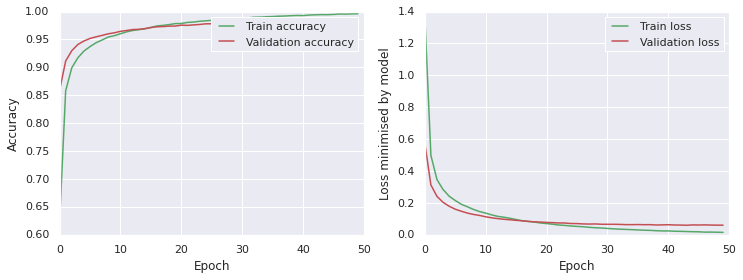

In [ ]:
# model_1 now contains the model at the end of the training run
# We analyse the result:

[train_loss, train_accuracy] = model_1.evaluate(X_train, y_train, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model_1.evaluate(X_val, y_val, verbose=0)
print("Validation set Accuracy:{:7.2f}".format(val_accuracy))
print("Validation set Loss:{:7.4f}\n".format(val_loss))

#Now we visualise what happened during training
plot_history(history_1)

### Final model and analysis

In [ ]:
model_for_test = initial_model()
model_for_test.summary()

# We now add batch size to the mix of training parameters
# If you don't specify batch size below, all training data will be used for each learning step
batch_size = 1024 #aanpassen aan oef
epochs = 50 #aanpassen aan oef

history_for_test = model_for_test.fit(X_train_all, y_train_all,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1
                    )

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 400)               320400    
_________________________________________________________________
dropout_4 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 200)               80200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

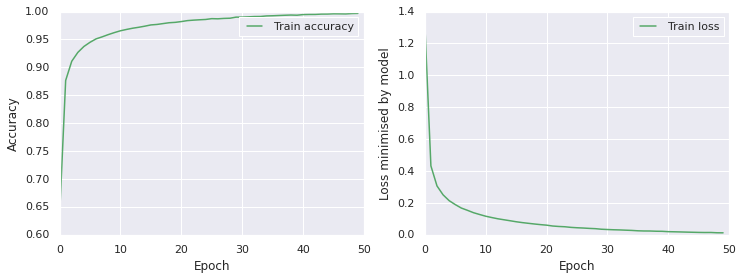

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history_for_test.epoch, np.array(history_for_test.history['accuracy']),'g-',
        label='Train accuracy')
        # g-: green solid line
plt.legend()

plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Loss minimised by model')
plt.plot(history_for_test.epoch, np.array(history_for_test.history['loss']),'g-',
        label='Train loss')
plt.legend()

In [ ]:
[train_loss, train_accuracy] = model_for_test.evaluate(X_train_all, y_train_all, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[test_loss, test_accuracy] = model_for_test.evaluate(X_test, y_test, verbose=0)
print("Test set Accuracy:{:7.2f}".format(test_accuracy))
print("Test set Loss:{:7.4f}\n".format(test_loss))

Training set Accuracy:   1.00
Training set Loss: 0.0040

Test set Accuracy:   0.98
Test set Loss: 0.0605



## Exercise: Zalando images with ANN (GitHub - zips)



Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.  
  
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.  
  
To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.  
  
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top.
  
Labels
  
Each training and test example is assigned to one of the following labels:  

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

Questions  
  
- Visualize the first 25 images in a 5x5 matrix. Tip: you can convert a pandas dataframe in a numpy (2-dimensional) array with df.to_numpy()
- Create a feed forward neural network model to predict the label from the image with following hyperparameters
    - Three hidden layers with each 256 neurons
    - Sigmoid as activation function for the hidden layers and softmax as activation function for the output layer
    - Dropout of 20%
    - Adam with a learning rate of 0.001 as a optimizer
    - use all training data for each learning step
- Determine the accuracy of the model
- Visualize some correctly and some incorrectly classified article images.

In [ ]:
import numpy as np
import pandas as pd

# For reasons of size the training set is split into two files. 
# Combine the files to obtain a single dataframe. 
url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/'
train1 = pd.read_csv(url+'fashion-mnist_train1.csv',sep=',')
train2 = pd.read_csv(url+'fashion-mnist_train2.csv',sep=',')
train = pd.concat([train1,train2]).reset_index(drop=True)
test   = pd.read_csv(url+'fashion-mnist_test.csv',sep=',')

In [ ]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

# fix random seed for reproducibility
seed = 2020
np.random.seed(seed)  

import sklearn as sk
from sklearn.model_selection import train_test_split

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
X_train_all = train.drop('label',axis=1)
y_train_all = train['label']
X_test = test.drop('label',axis=1)
y_test = test['label']
print(X_train_all.head())
print(y_test.head())

   pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       1  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0         0

[5 rows x 784 columns]
0    0
1    1
2    2
3    2
4    3
Name: label, dtype: int64


In [ ]:
y_train_all[0]

2

In [ ]:
# This data set contains a training set and a test set
# we still need to split off a validation set

# Number of test samples
N_test = X_test.shape[0]

# split off 10000 samples for validation
N_val = 10000
N_train = X_train_all.shape[0] - N_val

# now extract the samples into train, validate and test sets
# set random state = 0 to make sure you get the same split each time
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size = N_val, random_state=0)

In [ ]:
# convert pandas dataframe X_train_all to numpy array x_train
x_train_all = X_train_all.to_numpy()
x_train = X_train.to_numpy()
x_val = X_val.to_numpy()
x_test = X_test.to_numpy()
print(x_train_all)
print("----------")
# reshape first image
np.set_printoptions(linewidth=np.inf)
print(x_train_all[0].reshape(28,28))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
----------
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   4   0   0   0   0   0  62  61  21  29  23  51 136  61   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  88 201 228 225 255 115  62 137 255 235 222 255 135   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  47 252 234 238 224 215 215 229 108 180 207 214 224 231 249 254  45   0   0   0   0   0   0]
 [  0   0   1   0   0 214 222 210 213 224 225 217 220 254 233 219 221 217 223 221 240 254   0   0   1   0   0   0]
 [  1   0   0   0 128 237 207 224 224 207 216 214 210 208 211 22

<Figure size 432x288 with 0 Axes>

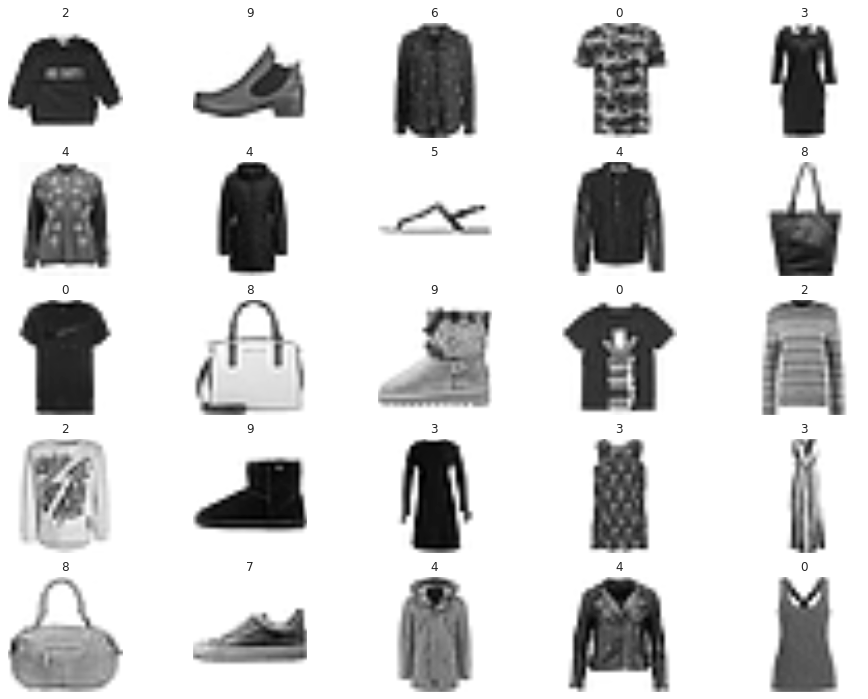

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()
nrows,ncols = 5,5
plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 12))

for i in range(25):  # show first 12 digits
  plt.subplot(nrows,ncols,i+1)  # i+1 is position of subplot in 3 x 4 table
  # show bitmap, interpret 0 as white and 255 as black (grayvalues)
  
  # reshape doen --> alle pixels staan nog achter elkaar
  plt.imshow(x_train_all[i].reshape(28,28), cmap=plt.cm.gray_r)
  plt.title(y_train_all[i])   # real value as title
  plt.xticks([])   # no ticks on x axis
  plt.yticks([])   # not ticks on y axis

In [ ]:
# let's print the shape 
print("x_train_all shape", X_train_all.shape)
print("y_train_all shape", y_train_all.shape)
print("x_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("x_val shape", X_val.shape)
print("y_val shape", y_val.shape)
print("x_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# some preprocessing ... convert integers to floating point and rescale them to [0,1] range
# normalized data leads to better models
x_train_all = x_train_all.astype('float32')
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train_all /= 255
x_val /= 255
x_test /= 255

# print the final input shape 
print("Train_all matrix shape", x_train_all.shape)
print("Train matrix shape", x_train.shape)
print("Val matrix shape", x_val.shape)
print("Test matrix shape", x_test.shape)

x_train_all shape (60000, 784)
y_train_all shape (60000,)
x_train shape (50000, 784)
y_train shape (50000,)
x_val shape (10000, 784)
y_val shape (10000,)
x_test shape (10000, 784)
y_test shape (10000,)
Train_all matrix shape (60000, 784)
Train matrix shape (50000, 784)
Val matrix shape (10000, 784)
Test matrix shape (10000, 784)


In [ ]:
# helper functions for visualisation
# plotting the loss functions used in this notebook
# we plot the loss we want to optimise on the left (in this case: accuracy)
def plot_history(history):
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)

  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),'g-',
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),'r-',
           label = 'Validation accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Loss minimised by model')
  plt.plot(history.epoch, np.array(history.history['loss']),'g-',
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),'r-',
           label = 'Validation loss')
  plt.legend()

In [ ]:
# one-hot encoding using keras' numpy-related utilities
y_train = keras.utils.to_categorical(y_train)
print(y_train.shape)
y_train_all = keras.utils.to_categorical(y_train_all)
print(y_train[0])  # one sample’s categorical data
y_val = keras.utils.to_categorical(y_val)
print(y_val.shape)
y_test = keras.utils.to_categorical(y_test)
print(y_test.shape)

(50000, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(10000, 10)
(10000, 10)


In [ ]:
num_classes = 10

def initial_model():
    model = Sequential()

    model.add(Dense(256, activation='sigmoid', input_shape=(784,), kernel_initializer='he_uniform'))

    model.add(Dropout(0.2))

    model.add(Dense(256, activation='sigmoid', kernel_initializer='he_uniform'))    

    model.add(Dropout(0.2))

    model.add(Dense(256, activation='sigmoid', kernel_initializer='he_uniform'))    

    model.add(Dropout(0.2))
    
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
                  metrics=['accuracy']) 
    return model



In [ ]:
model_1 = initial_model()
model_1.summary()

epochs = 20

history_1 = model_1.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val)
                    )

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

Training set Accuracy:   0.79
Training set Loss: 0.5401

Validation set Accuracy:   0.79
Validation set Loss: 0.5388



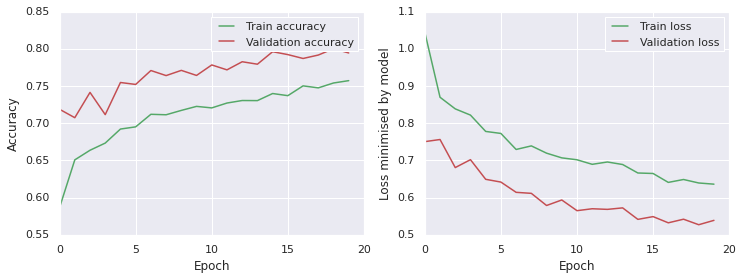

In [ ]:
# model_1 now contains the model at the end of the training run
# We analyse the result:

[train_loss, train_accuracy] = model_1.evaluate(x_train, y_train, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model_1.evaluate(x_val, y_val, verbose=0)
print("Validation set Accuracy:{:7.2f}".format(val_accuracy))
print("Validation set Loss:{:7.4f}\n".format(val_loss))

#Now we visualise what happened during training
plot_history(history_1)

In [ ]:
model_for_test = initial_model()
model_for_test.summary()

# We now add batch size to the mix of training parameters
# If you don't specify batch size below, all training data will be used for each learning step
epochs = 20

history_for_test = model_for_test.fit(x_train_all, y_train_all,
                    epochs=epochs,
                    verbose=1
                    )

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)               

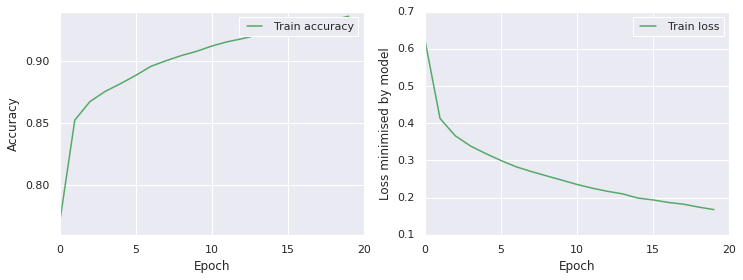

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history_for_test.epoch, np.array(history_for_test.history['accuracy']),'g-',
        label='Train accuracy')
        # g-: green solid line
plt.legend()

plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Loss minimised by model')
plt.plot(history_for_test.epoch, np.array(history_for_test.history['loss']),'g-',
        label='Train loss')
plt.legend()

In [ ]:
[train_loss, train_accuracy] = model_for_test.evaluate(X_train_all, y_train_all, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[test_loss, test_accuracy] = model_for_test.evaluate(X_test, y_test, verbose=0)
print("Test set Accuracy:{:7.2f}".format(test_accuracy))
print("Test set Loss:{:7.4f}\n".format(test_loss))


Training set Accuracy:   0.93
Training set Loss: 0.1785

Test set Accuracy:   0.87
Test set Loss: 0.4684



In [ ]:
predictions = model_for_test.predict(X_test)
# The first cloud should be a 0 (shown as 1. at index 0)
print(y_test[0])

# Check the probabilities returned by predict for first test sample
# The function enumerate() receives and iterable and creates an iterator that, for each element, 
# returns a tuple containing the element's index and value
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')
    
# Our model believes this digit is a 7 with nearly 100% certainty
# Not all predictions have this level of certainty

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0: 89.7495925426%
1: 0.0000725678%
2: 0.2455642214%
3: 0.0020307434%
4: 0.0034523760%
5: 0.0000171092%
6: 9.9986903369%
7: 0.0000000003%
8: 0.0005748815%
9: 0.0000003501%


In [ ]:
# Locating the Incorrect Predictions
images = x_test.reshape((10000, 28, 28))

incorrect_predicted_images = []
predicted_digits = []
expected_digits = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predicted_images.append(images[i])
        predicted_digits.append(predicted)
        expected_digits.append(expected)

<Figure size 432x288 with 0 Axes>

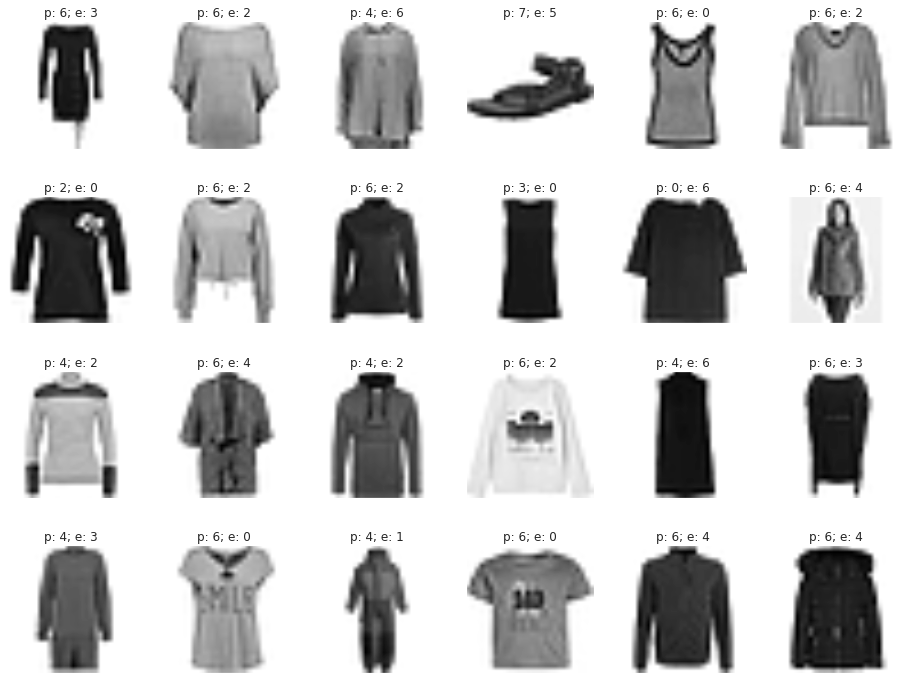

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()
nrows,ncols=4,6
plt.subplots(nrows,ncols, figsize=(16, 12))

for i in range(nrows*ncols):  # show first 24 digits
  plt.subplot(nrows,ncols,i+1)  # i+1 is position of subplot in nrows x ncols table
  # show bitmap, interpret 0 as white and 255 as black (grayvalues)
  plt.imshow(incorrect_predicted_images[i].reshape(28,28), cmap=plt.cm.gray_r)
  plt.title(f'p: {predicted_digits[i]}; e: {expected_digits[i]}')
  plt.xticks([])   # no ticks on x axis
  plt.yticks([])   # not ticks on y axis

## Exercise: Zalando images with ANN (Keras library - fashion_mnist)

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

# fix random seed for reproducibility
seed = 2020
np.random.seed(seed)  

import sklearn as sk
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
# load train and test data
(X_train_all, y_train_all), (X_test, y_test) = fashion_mnist.load_data()

# let's print the shape before we reshape and normalize
print("X_train_all shape", X_train_all.shape)
print("y_train_all shape", y_train_all.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels = linearize the image to get a 784 (= 28x28) vector
# Niet gebruiken als model met flatten gebruikt wordt
# X_train_all = X_train_all.reshape(60000, 784)
# X_test = X_test.reshape(10000, 784)

# some preprocessing ... convert integers to floating point and rescale them to [0,1] range
# normalized data leads to better models
X_train_all = X_train_all.astype('float32')
X_test = X_test.astype('float32')
X_train_all /= 255
X_test /= 255

# print the final input shape 
print("Train_all matrix shape", X_train_all.shape)
print("Test matrix shape", X_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
X_train_all shape (60000, 28, 28)
y_train_all shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train_all matrix shape (60000, 28, 28)
Test matrix shape (10000, 28, 28)


In [ ]:
# This data set contains a training set and a test set
# we still need to split off a validation set

# Number of test samples
N_test = X_test.shape[0]

# split off 10000 samples for validation
N_val = 10000
N_train = X_train_all.shape[0] - N_val

# now extract the samples into train, validate and test sets
# set random state = 0 to make sure you get the same split each time
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size = N_val, random_state=0)

print(X_val.shape)

(10000, 28, 28)


<Figure size 432x288 with 0 Axes>

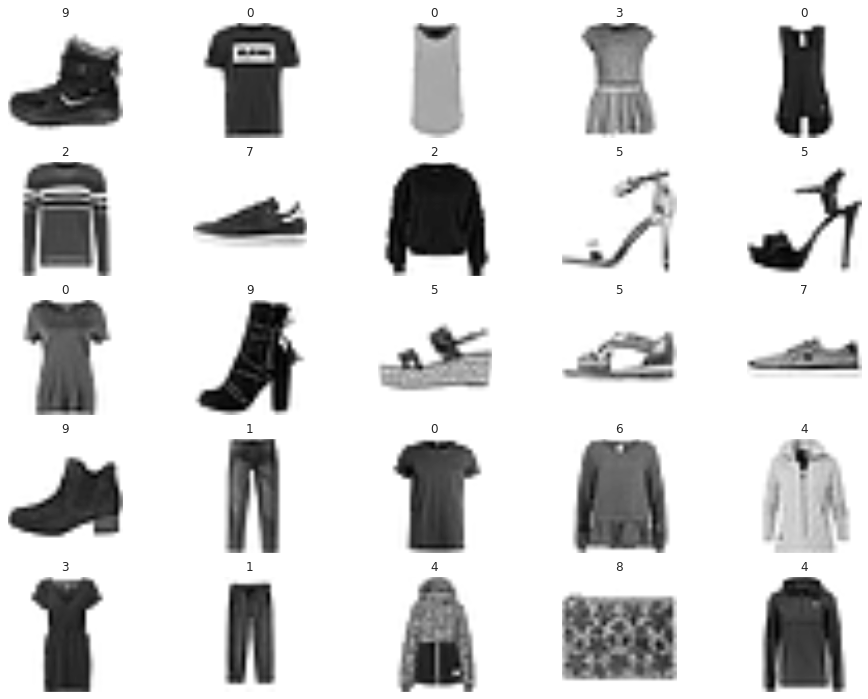

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()
nrows,ncols = 5,5
plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 12))

for i in range(25):  # show first 12 digits
  plt.subplot(nrows,ncols,i+1)  # i+1 is position of subplot in 3 x 4 table
  # show bitmap, interpret 0 as white and 255 as black (grayvalues)
  plt.imshow(X_train_all[i].reshape(28,28), cmap=plt.cm.gray_r)
  plt.title(y_train_all[i])   # real value as title
  plt.xticks([])   # no ticks on x axis
  plt.yticks([])   # not ticks on y axis

In [ ]:
y_train_all = keras.utils.to_categorical(y_train_all)
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)
y_test = keras.utils.to_categorical(y_test)

# look at the new labels for the first sample
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# helper functions for visualisation
# plotting the loss functions used in this notebook
# we plot the loss we want to optimise on the left (in this case: accuracy)
def plot_history(history):
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)

  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),'g-',
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),'r-',
           label = 'Validation accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Loss minimised by model')
  plt.plot(history.epoch, np.array(history.history['loss']),'g-',
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),'r-',
           label = 'Validation loss')
  plt.legend()

In [ ]:
num_classes = 10

def initial_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(256, activation='sigmoid', input_shape=(784,), kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='sigmoid', kernel_initializer='he_uniform'))    
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='sigmoid', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001),
                  metrics=['accuracy']) 
    return model

In [ ]:
'''
num_classes = 10

def initial_model():
    model = Sequential()
    model.add(Dense(256, activation='sigmoid', input_shape=(784,), kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='sigmoid', kernel_initializer='he_uniform'))    
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='sigmoid', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001),
                  metrics=['accuracy']) 
    return model
'''

"\nnum_classes = 10\n\ndef initial_model():\n    model = Sequential()\n    model.add(Dense(256, activation='sigmoid', input_shape=(784,), kernel_initializer='he_uniform'))\n    model.add(Dropout(0.2))\n    model.add(Dense(256, activation='sigmoid', kernel_initializer='he_uniform'))    \n    model.add(Dropout(0.2))\n    model.add(Dense(256, activation='sigmoid', kernel_initializer='he_uniform'))\n    model.add(Dropout(0.2))\n    model.add(Dense(num_classes, activation='softmax'))\n    model.compile(loss='categorical_crossentropy',\n                  optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001),\n                  metrics=['accuracy']) \n    return model\n"

In [ ]:
model_1 = initial_model()
model_1.summary()

epochs = 20

history_1 = model_1.fit(X_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, y_val)
                    )

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)              

Training set Accuracy:   0.88
Training set Loss: 0.3343

Validation set Accuracy:   0.87
Validation set Loss: 0.3535



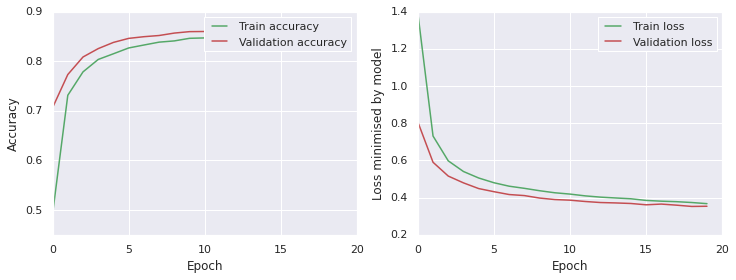

In [ ]:
[train_loss, train_accuracy] = model_1.evaluate(X_train, y_train, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model_1.evaluate(X_val, y_val, verbose=0)
print("Validation set Accuracy:{:7.2f}".format(val_accuracy))
print("Validation set Loss:{:7.4f}\n".format(val_loss))

plot_history(history_1)

In [ ]:
model_for_test = initial_model()
model_for_test.summary()

epochs = 20

history_for_test = model_for_test.fit(X_train_all, y_train_all,
                    epochs=epochs,
                    verbose=1
                    )

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)              

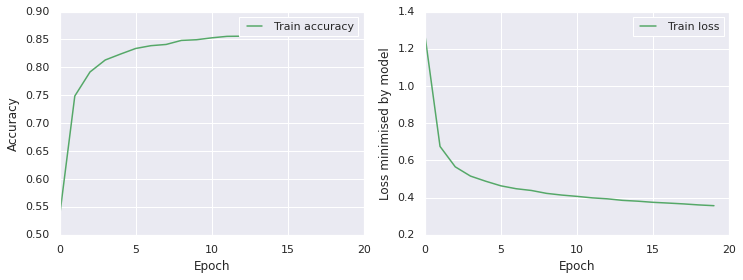

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history_for_test.epoch, np.array(history_for_test.history['accuracy']),'g-',
        label='Train accuracy')
        # g-: green solid line
plt.legend()

plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Loss minimised by model')
plt.plot(history_for_test.epoch, np.array(history_for_test.history['loss']),'g-',
        label='Train loss')
plt.legend()

In [ ]:
[train_loss, train_accuracy] = model_for_test.evaluate(X_train_all, y_train_all, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[test_loss, test_accuracy] = model_for_test.evaluate(X_test, y_test, verbose=0)
print("Test set Accuracy:{:7.2f}".format(test_accuracy))
print("Test set Loss:{:7.4f}\n".format(test_loss))

Training set Accuracy:   0.88
Training set Loss: 0.3240

Test set Accuracy:   0.86
Test set Loss: 0.3775



In [ ]:
predictions = model_for_test.predict(X_test)
# The first digit should be a 7 (shown as 1. at index 7)
print(y_test[0])

# Check the probabilities returned by predict for first test sample
# The function enumerate() receives and iterable and creates an iterator that, for each element, 
# returns a tuple containing the element's index and value
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')
    
# Our model believes this digit is a 7 with nearly 100% certainty
# Not all predictions have this level of certainty

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0: 0.0040163915%
1: 0.0027154865%
2: 0.0029654184%
3: 0.0031965446%
4: 0.0147592058%
5: 3.2611418515%
6: 0.0060592112%
7: 6.6726997495%
8: 0.0502750161%
9: 89.9821758270%


In [ ]:
# Locating the Incorrect Predictions
images = X_test.reshape((10000, 28, 28))

incorrect_predicted_images = []
predicted_digits = []
expected_digits = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predicted_images.append(images[i])
        predicted_digits.append(predicted)
        expected_digits.append(expected)

<Figure size 432x288 with 0 Axes>

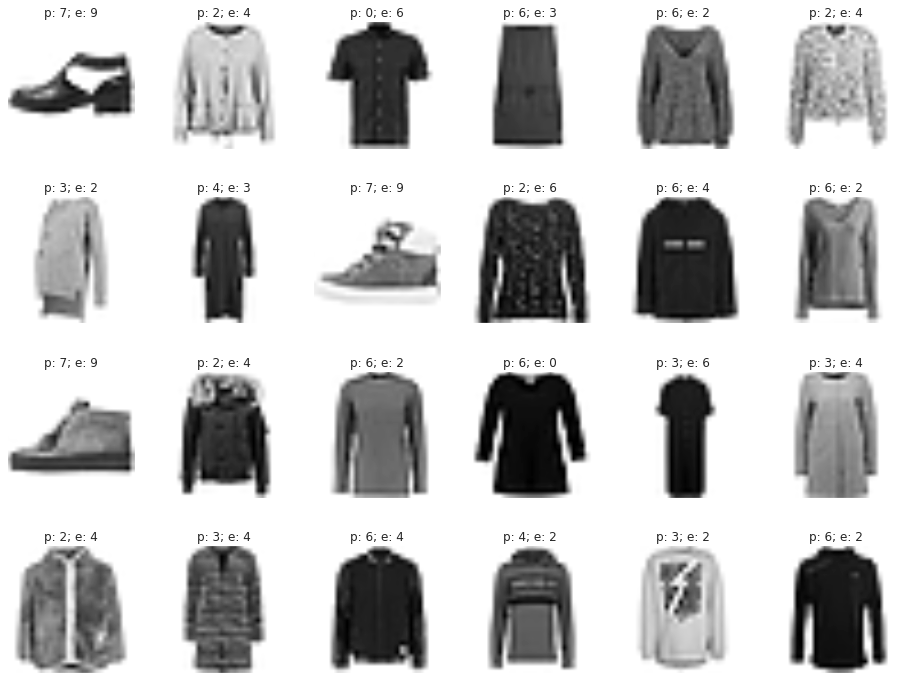

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()
nrows,ncols=4,6
plt.subplots(nrows,ncols, figsize=(16, 12))

for i in range(nrows*ncols):  # show first 24 digits
  plt.subplot(nrows,ncols,i+1)  # i+1 is position of subplot in nrows x ncols table
  # show bitmap, interpret 0 as white and 255 as black (grayvalues)
  plt.imshow(incorrect_predicted_images[i].reshape(28,28), cmap=plt.cm.gray_r)
  plt.title(f'p: {predicted_digits[i]}; e: {expected_digits[i]}')
  plt.xticks([])   # no ticks on x axis
  plt.yticks([])   # not ticks on y axis

## Image Classificaton with Convolutional Neural Networks in Keras

### Preparation

In [ ]:
# Check if gpu is used (optional)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14933984537251613145
]


In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

# fix random seed for reproducibility
seed = 2020
np.random.seed(seed)  

import sklearn as sk
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D 

2.4.0


In [ ]:
# helper functions for visualisation
# plotting the loss functions used in this notebook
# we plot the loss we want to optimise on the left (in this case: accuracy)
def plot_history(history):
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)

  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),'g-',
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),'r-',
           label = 'Validation accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Loss minimised by model')
  plt.plot(history.epoch, np.array(history.history['loss']),'g-',
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),'r-',
           label = 'Validation loss')
  plt.legend()

### Loading the data

In [ ]:
# load train and test data
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

In [ ]:
# let's print the shape before we reshape and normalize
print("X_train_all shape", X_train_all.shape)
print("y_train_all shape", y_train_all.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train_all shape (60000, 28, 28)
y_train_all shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


### Data preparation

In [ ]:
X_train_all = X_train_all.reshape((60000, 28, 28, 1))
print(X_train_all.shape)

X_test = X_test.reshape((10000, 28, 28, 1))
print(X_test.shape)

# some preprocessing ... convert integers to floating point and rescale them to [0,1] range
# normalized data leads to better models
X_train_all = X_train_all.astype('float32')
X_test = X_test.astype('float32')
X_train_all /= 255
X_test /= 255

# print the final input shape 
print("Train_all matrix shape", X_train_all.shape)
print("Test matrix shape", X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Train_all matrix shape (60000, 28, 28, 1)
Test matrix shape (10000, 28, 28, 1)


In [ ]:
# This data set contains a training set and a test set
# we still need to split off a validation set

# Number of test samples
N_test = X_test.shape[0]

# split off 10000 samples for validation
N_val = 10000
N_train = X_train_all.shape[0] - N_val

# now extract the samples into train, validate and test sets
# set random state = 0 to make sure you get the same split each time
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size = N_val, random_state=0)


### Multi-class classification

In [ ]:
y_train_all = keras.utils.to_categorical(y_train_all)
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)
y_test = keras.utils.to_categorical(y_test)

# look at the new labels for the first sample
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Model

In [ ]:
num_classes = 10

# A typical convnet consists of
# input layer that receives training samples
# hidden layers that learn from training samples
# output layer that produces predictions

def initial_model():
    # we create a variable called model, and we set it equal to an instance of a Sequential object.
    model = Sequential()

    # We'll start with a convolution layer
    # A convolutional layer uses the relationships between pixels in close proximity to learn useful features (or patterns) in small areas of each sample
    # These features become inputs to subsequent layers
    # Kernels typically are 3-by-3 (or 5-by-5 or 7-by-7) 
    # Kernel-size is a hyperparameter
    # By looking at features near one another, the network begins to recognize features, like edges, straight lines and curves
    # Next, convolution layer moves kernel one pixel to the right (the stride)
    # Complete pass left-to-right and top-to-bottom is called a filter
    # For a 3-by-3 kernel, the filter dimensions will be two less than the input dimensions
    # For each 28-by-28 MNIST image, the filter will be 26-by-26
    # Number of filters in the convolutional layer is commonly 32 or 64 for small images

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

    # Input samples are 28-by-28-by-1—that is, 784 features each
    # Specified 64 filters and a 3-by-3 kernel for the layer, so the feature map size is 26-by-26-by-64 for a total of 26x26x64=43.264 features

    # Adding a pooling layer
    # Outputs maximum feature from each pool
    # Stride for a 2-by-2 pool is 2
    # Every group of four features is reduced to one, so 2-by-2 pooling compresses number of features by 75%
    # Reduces previous layer’s output from 26-by-26-by-64 to 13-by-13-by-64  
    model.add(MaxPooling2D(pool_size=(2, 2))) 

    # Convnets often have many convolution and pooling layers.
    # Input to the second convolution layer is the 13-by-13-by-64 output of the first pooling layer
    # Output of this Conv2D layer will be 11-by-11-by-128
    # For odd dimensions like 11-by-11, Keras pooling layers round down by default (in this case to 10-by-10), so this pooling layer’s output will be 5-by-5-by-128

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Flattening the results
    # Model's final output will be a one-dimensional array of 10 probabilities that classify the digits
    # To prepare for one-dimensional final predictions, need to flatten the previous layer’s output to one dimension
    # Flatten layer's output will be 1-by-3200 (5 × 5 × 128)

    model.add(Flatten())

    # Adding a Dense Layer to Reduce the Number of Features
    # Layers before the Flatten layer learned digit features
    # Now must learn the relationships among those features to classify which digit each image represents
    # Accomplished with fully connected Dense layers
    # The following Dense layer creates 128 neurons (units) that learn from the 3200 outputs of the previous layer

    model.add(Dense(units=128, activation='relu'))

    # Adding Another Dense Layer to Produce the Final Output
    # Final Dense layer classifies inputs into neurons representing the classes 0-9
    # The softmax activation function converts values of these 10 neurons into classification probabilities
    # Neuron with highest probability represents the prediction for a given digit image

    model.add(Dense(units=10, activation='softmax'))

    # Before we can train our model, we must compile it
    # To the compile() function, we are passing the optimizer, the loss function, and the metrics that we would like to see. 
    # Notice that the optimizer we have specified is called Adam. Adam is just a variant of SGD. 
    model.compile(loss='categorical_crossentropy',
                  optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
                  metrics=['accuracy']) 
    return model

### Training


In [ ]:
# Create your model
model_1 = initial_model()
model_1.summary()


# We now add batch size to the mix of training parameters
# If you don't specify batch size below, all training data will be used for each learning step
batch_size = 128
epochs = 20

# We fit our model to the data. Fitting the model to the data means to train the model on the data.
# batch_size specifies how many training samples should be sent to the model at once.
# epochs = how many times the complete training set (all of the samples) will be passed to the model.
# verbose = 1 indicates how much logging we will see as the model trains. (other values are a.o. 0, 2)
history_1 = model_1.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, y_val)
                    )

# The output gives us the following values for each epoch:
# Epoch number
# Duration in seconds
# Loss
# Accuracy

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               409728    
_________________________________________________________________
dense_31 (Dense)             (None, 10)               

Training set Accuracy:   1.00
Training set Loss: 0.0019

Validation set Accuracy:   0.99
Validation set Loss: 0.0418



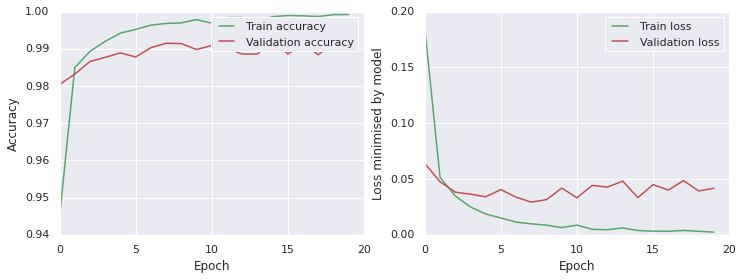

In [ ]:
# model_1 now contains the model at the end of the training run
# We analyse the result:

[train_loss, train_accuracy] = model_1.evaluate(X_train, y_train, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model_1.evaluate(X_val, y_val, verbose=0)
print("Validation set Accuracy:{:7.2f}".format(val_accuracy))
print("Validation set Loss:{:7.4f}\n".format(val_loss))

#Now we visualise what happened during training
plot_history(history_1)

### Final model and analysis

In [ ]:
model_for_test = initial_model()
model_for_test.summary()

# We now add batch size to the mix of training parameters
# If you don't specify batch size below, all training data will be used for each learning step
batch_size = 128
epochs = 50

history_for_test = model_for_test.fit(X_train_all, y_train_all,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1
                    )

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               409728    
_________________________________________________________________
dense_33 (Dense)             (None, 10)               

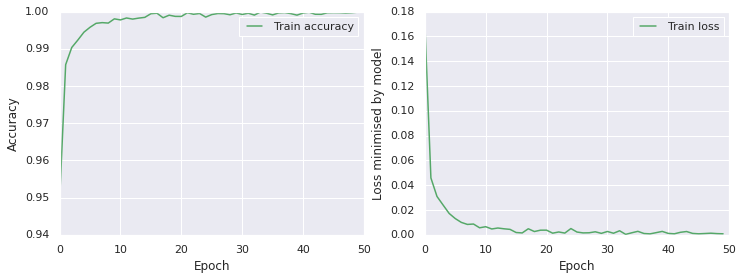

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history_for_test.epoch, np.array(history_for_test.history['accuracy']),'g-',
        label='Train accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Loss minimised by model')
plt.plot(history_for_test.epoch, np.array(history_for_test.history['loss']),'g-',
        label='Train loss')
plt.legend()

In [ ]:
[train_loss, train_accuracy] = model_for_test.evaluate(X_train_all, y_train_all, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[test_loss, test_accuracy] = model_for_test.evaluate(X_test, y_test, verbose=0)
print("Test set Accuracy:{:7.2f}".format(test_accuracy))
print("Test set Loss:{:7.4f}\n".format(test_loss))

Training set Accuracy:   1.00
Training set Loss: 0.0035

Test set Accuracy:   0.99
Test set Loss: 0.0584



### Evaluation

In [ ]:
predictions = model_for_test.predict(X_test)
# The first digit should be a 7 (shown as 1. at index 7)
print(y_test[0])

# Check the probabilities returned by predict for first test sample
# The function enumerate() receives and iterable and creates an iterator that, for each element, 
# returns a tuple containing the element's index and value
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')
    
# Our model believes this digit is a 7 with nearly 100% certainty
# Not all predictions have this level of certainty

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0: 0.0000000000%
1: 0.0000000000%
2: 0.0000000000%
3: 0.0000000000%
4: 0.0000000000%
5: 0.0000000000%
6: 0.0000000000%
7: 100.0000000000%
8: 0.0000000000%
9: 0.0000000000%


In [ ]:
# Locating the Incorrect Predictions
images = X_test.reshape((10000, 28, 28))

incorrect_predicted_images = []
predicted_digits = []
expected_digits = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predicted_images.append(images[i])
        predicted_digits.append(predicted)
        expected_digits.append(expected)

<Figure size 432x288 with 0 Axes>

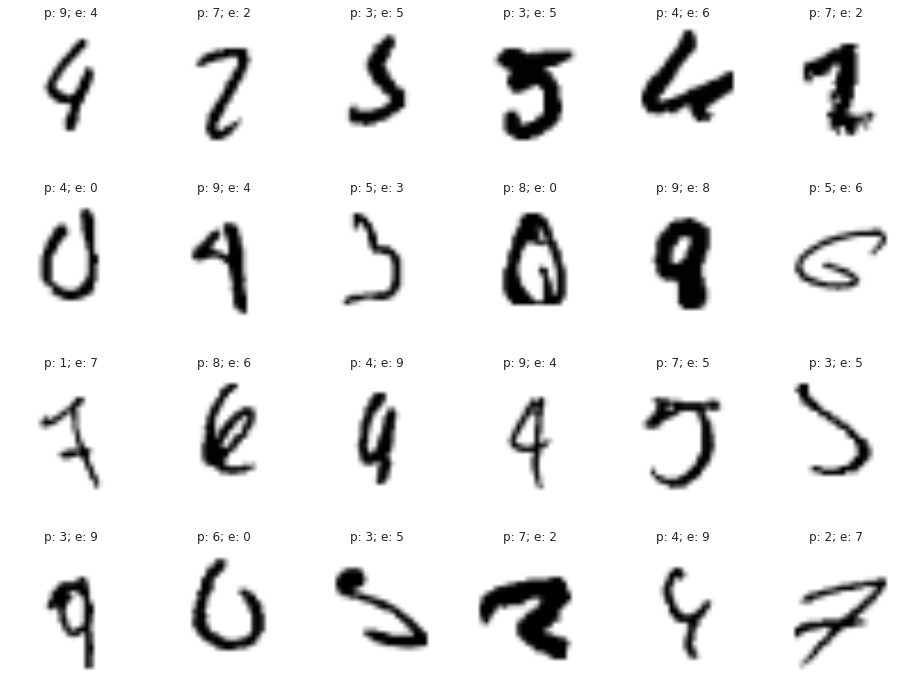

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()
nrows,ncols=4,6
plt.subplots(nrows,ncols, figsize=(16, 12))

for i in range(nrows*ncols):  # show first 24 digits
  plt.subplot(nrows,ncols,i+1)  # i+1 is position of subplot in nrows x ncols table
  # show bitmap, interpret 0 as white and 255 as black (grayvalues)
  plt.imshow(incorrect_predicted_images[i].reshape(28,28), cmap=plt.cm.gray_r)
  plt.title(f'p: {predicted_digits[i]}; e: {expected_digits[i]}')
  plt.xticks([])   # no ticks on x axis
  plt.yticks([])   # not ticks on y axis

## Exercise: Cifar100

Since we have now definitely concluded that MNIST is too easy, we will move to a slightly more difficult data set to play with. It is called CIFAR100 (https://www.cs.toronto.edu/~kriz/cifar.html) and contains (still TINY) natural images of objects in 20 different classes, each with 5 sub-classes (100 classes in total).

To make the problem slightly easier, we will only use the coarse differentiation into 20 classes.

The code below shows a simple example of a convolutional neural network. Your first task is to try and understand the layers and their parameters, using the Keras documentation. Then start to play with it: try to change things and try to improve the result, using everything you have learnt thus far.

#### Preparation

In [ ]:
# Check if gpu is used (optional)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11243566583426179128
]


In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

# fix random seed for reproducibility
seed = 2020
np.random.seed(seed)  

import sklearn as sk
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D 
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation

2.4.0


In [ ]:
# helper functions for visualisation
# plotting the loss functions used in this notebook
# we plot the loss we want to optimise on the left (in this case: accuracy)
def plot_history(history):
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)

  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),'g-',
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),'r-',
           label = 'Validation accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Loss minimised by model')
  plt.plot(history.epoch, np.array(history.history['loss']),'g-',
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),'r-',
           label = 'Validation loss')
  plt.legend()

#### Loading the data

In [ ]:
# load train and test data
from tensorflow.keras.datasets import cifar100
(X_train_all, y_train_all_class), (X_test, y_test_class) = cifar100.load_data(label_mode='coarse')


169009152/169001437 [==============================] - 2s 0us/step


In [ ]:
# let's print the shape before we reshape and normalize
print("X_train_all shape", X_train_all.shape)
print("y_train_all shape", y_train_all_class.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test_class.shape)

X_train_all shape (50000, 32, 32, 3)
y_train_all shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


#### Data preparation

In [ ]:
'''
Niet nodig shape was al 32,32
X_train_all = X_train_all.reshape((50000, 32, 32, 3))
print(X_train_all.shape)

X_test = X_test.reshape((10000, 32, 32, 3))
print(X_test.shape)
'''
# some preprocessing ... convert integers to floating point and rescale them to [0,1] range
# normalized data leads to better models
X_train_all = X_train_all.astype('float32')
X_test = X_test.astype('float32')
X_train_all /= 255
X_test /= 255

# print the final input shape 
print("Train_all matrix shape", X_train_all.shape)
print("Test matrix shape", X_test.shape)

Train_all matrix shape (50000, 32, 32, 3)
Test matrix shape (10000, 32, 32, 3)


In [ ]:
# This data set contains a training set and a test set
# we still need to split off a validation set

# Number of test samples
N_test = X_test.shape[0]

# split off 10000 samples for validation
N_val = 6000
N_train = X_train_all.shape[0] - N_val

# now extract the samples into train, validate and test sets
# set random state = 0 to make sure you get the same split each time
X_train, X_val, y_train_class, y_val_class = train_test_split(X_train_all, y_train_all_class, test_size = N_val, random_state=0)


# let's take a subset of the training data first, for playing around
# Note that such a subset is only useful if it can guide your tuning process,
# i.e., if it leads you to similar decisions as you would make on the whole training set

X_train_small = X_train[:20000]
y_train_small_class = y_train_class[:20000]


print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'validation samples')

X_train shape: (44000, 32, 32, 3)
44000 train samples
6000 validation samples


#### Multi-class classification

In [ ]:
# the labels from the downloaded data are integer numbers
# for a multi-class classification task, we again convert each integer
# to a vector with 19 zeros and a single '1', corresponding to the right class
num_classes = 20


y_train_all = keras.utils.to_categorical(y_train_all_class, num_classes)
y_train = keras.utils.to_categorical(y_train_class, num_classes)
y_val = keras.utils.to_categorical(y_val_class, num_classes)
y_test = keras.utils.to_categorical(y_test_class, num_classes)
y_train_small = keras.utils.to_categorical(y_train_small_class, num_classes)

# look at the new labels for the first sample
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


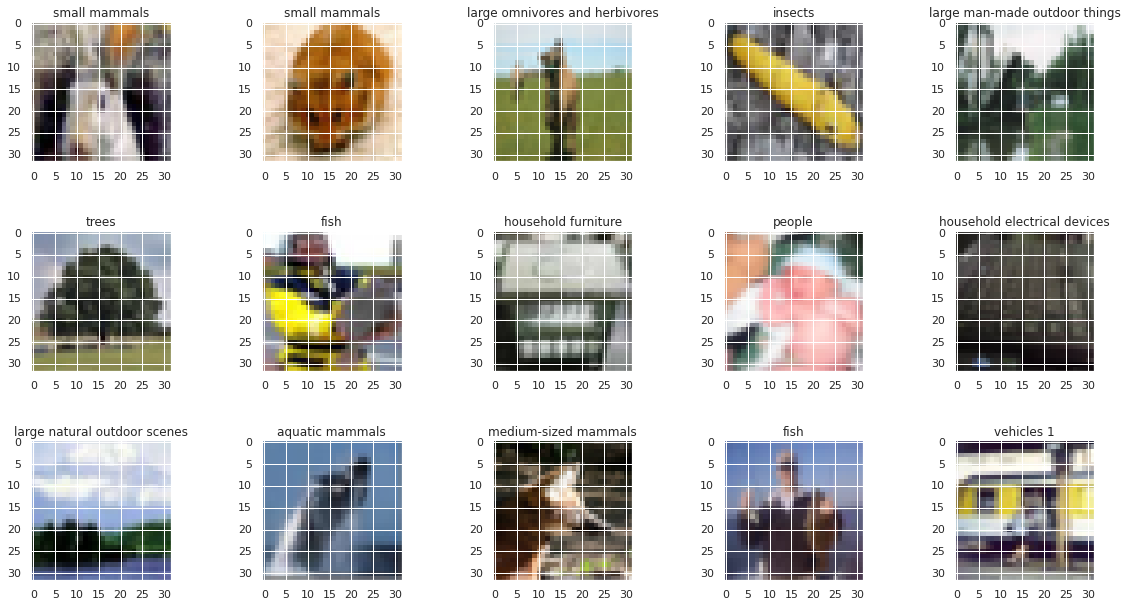

In [ ]:
# Labels
labels = [
'aquatic mammals',
'fish',
'flowers',
'food containers',
'fruit and vegetables',
'household electrical devices',
'household furniture',
'insects',
'large carnivores',
'large man-made outdoor things',
'large natural outdoor scenes',
'large omnivores and herbivores',
'medium-sized mammals',
'non-insect invertebrates',
'people',
'reptiles',
'small mammals',
'trees',
'vehicles 1',
'vehicles 2'
]

f = plt.figure(figsize=(20,10))
for idx in range(15):
    plt.subplot(3,5,idx+1)
    plt.subplots_adjust(hspace=0.5)
    plt.title(labels[y_train_class[idx,0]])
    plt.imshow(X_train[idx],  interpolation='None')

#### Model


In [ ]:
'''Train a simple CNN on the CIFAR100 small images dataset.
Initial model based on example networks used for CIFAR10
e.g., https://keras.io/examples/cifar10_cnn/
'''

# The first conv layers have 32 filters (channels) with filter size 3x3
# note that this has no relation with the image size, which just happens to be 32x32 pixels!

def initial_model():
  model = Sequential()

  # Convolutional layers
  model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  # end of convolutional layers, start of 'hidden' dense layers (can be more than 1 if necessary)
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))

  # Final dense layer = linear classifier
  #model.add(Dropout(0.1))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  opt = tf.keras.optimizers.Adam() #using defaults for now

  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  return model



#### Training

In [ ]:
# Create your model
model_1 = initial_model()
model_1.summary()


# We now add batch size to the mix of training parameters
# If you don't specify batch size below, all training data will be used for each learning step
batch_size = 32
epochs = 10

# We fit our model to the data. Fitting the model to the data means to train the model on the data.
# batch_size specifies how many training samples should be sent to the model at once.
# epochs = how many times the complete training set (all of the samples) will be passed to the model.
# verbose = 1 indicates how much logging we will see as the model trains. (other values are a.o. 0, 2)
history_1 = model_1.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, y_val)
                    )

# The output gives us the following values for each epoch:
# Epoch number
# Duration in seconds
# Loss
# Accuracy

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)      

Training set Accuracy:   0.96
Training set Loss: 0.1257

Validation set Accuracy:   0.49
Validation set Loss: 3.6445



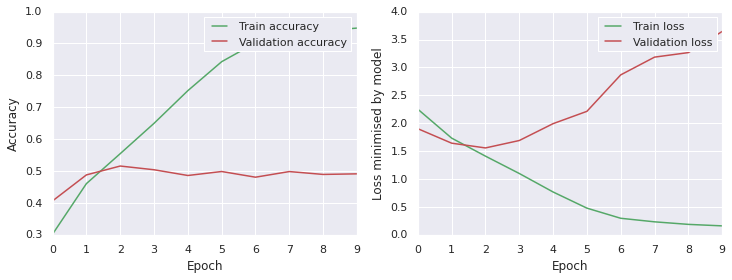

In [ ]:
# model_1 now contains the model at the end of the training run
# We analyse the result:

[train_loss, train_accuracy] = model_1.evaluate(X_train, y_train, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model_1.evaluate(X_val, y_val, verbose=0)
print("Validation set Accuracy:{:7.2f}".format(val_accuracy))
print("Validation set Loss:{:7.4f}\n".format(val_loss))

#Now we visualise what happened during training
plot_history(history_1)

#### Final model and analysis

In [ ]:
model_for_test = initial_model()
model_for_test.summary()

# We now add batch size to the mix of training parameters
# If you don't specify batch size below, all training data will be used for each learning step
batch_size = 128
epochs = 10 # 50

history_for_test = model_for_test.fit(X_train_all, y_train_all,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1
                    )

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_14 (Activation)   (None, 16, 16, 64)      

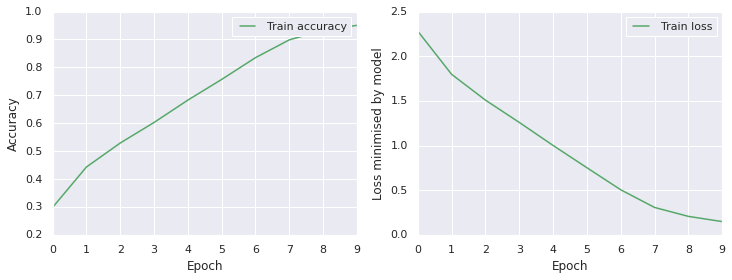

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history_for_test.epoch, np.array(history_for_test.history['accuracy']),'g-',
        label='Train accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Loss minimised by model')
plt.plot(history_for_test.epoch, np.array(history_for_test.history['loss']),'g-',
        label='Train loss')
plt.legend()

In [ ]:
[train_loss, train_accuracy] = model_for_test.evaluate(X_train_all, y_train_all, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[test_loss, test_accuracy] = model_for_test.evaluate(X_test, y_test, verbose=0)
print("Test set Accuracy:{:7.2f}".format(test_accuracy))
print("Test set Loss:{:7.4f}\n".format(test_loss))

Training set Accuracy:   0.97
Training set Loss: 0.0889

Test set Accuracy:   0.52
Test set Loss: 3.0614



#### Evaluation

In [ ]:
predictions = model_for_test.predict(X_test)
# The first digit should be a 7 (shown as 1. at index 7)
print(y_test[0])

# Check the probabilities returned by predict for first test sample
# The function enumerate() receives and iterable and creates an iterator that, for each element, 
# returns a tuple containing the element's index and value
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')
    
# Our model believes this digit is a 7 with nearly 100% certainty
# Not all predictions have this level of certainty

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0: 29.5688718557%
1: 0.0000429970%
2: 0.0000031756%
3: 0.0000002794%
4: 0.0000003782%
5: 0.0571626879%
6: 0.0053561078%
7: 0.0130975284%
8: 0.0060598377%
9: 15.8797591925%
10: 0.0168577666%
11: 0.0000394066%
12: 0.0000003515%
13: 0.6503467914%
14: 53.6206722260%
15: 0.0603459834%
16: 0.0319469458%
17: 0.0724693411%
18: 0.0006112059%
19: 0.0163585981%


In [ ]:
# Locating the Incorrect Predictions
images = X_test.reshape((10000, 32, 32, 3))

incorrect_predicted_images = []
predicted_imgs = []
expected_imgs = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predicted_images.append(images[i])
        predicted_imgs.append(predicted)
        expected_imgs.append(expected)

<Figure size 432x288 with 0 Axes>

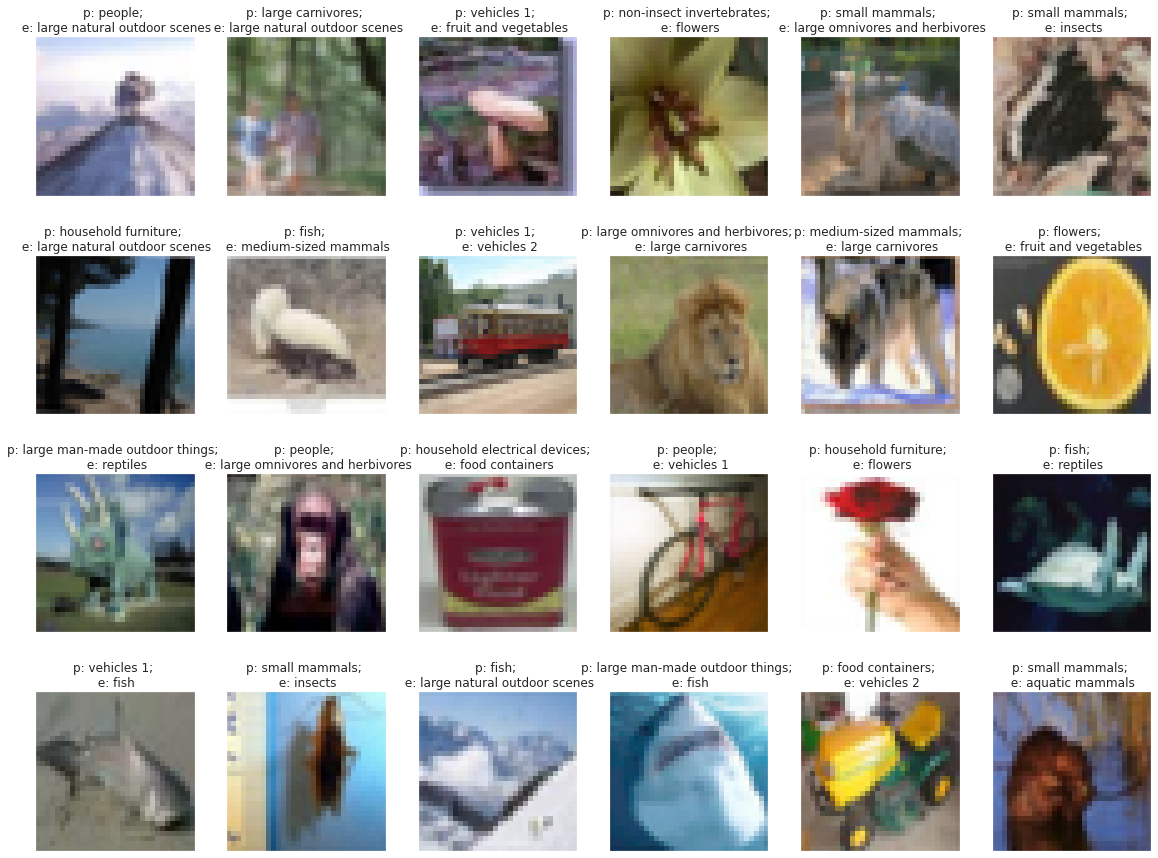

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()
nrows,ncols=4,6
plt.subplots(nrows,ncols, figsize=(20, 15))

for i in range(nrows*ncols):  # show first 24 digits
  plt.subplot(nrows,ncols,i+1)  # i+1 is position of subplot in nrows x ncols table
  # show bitmap, interpret 0 as white and 255 as black (grayvalues)
  plt.imshow(incorrect_predicted_images[i].reshape(32,32,3),interpolation='None')
  plt.title(f'p: {labels[predicted_imgs[i]]}; \n e: {labels[expected_imgs[i]]}')
  plt.xticks([])   # no ticks on x axis
  plt.yticks([])   # not ticks on y axis

## CNN Model optimizaton by hyperparameter tuning

In the cifar100 example we used as model hyperparameters: 

* 1 Conv2D with filters=32, kernel_size=(3, 3)
* 1 Conv2D with filters=32, kernel_size=(3, 3)
* 1 MaxPooling2D with pool_zize = (2, 2)

* 1 Conv2D with filters=64, kernel_size=(3, 3)
* 1 Conv2D with filters=64, kernel_size=(3, 3)
* 1 MaxPooling2D with pool_zize = (2, 2)

* 1 Dense layer with 512 neurons
* learning rate = 0.001
* batch size = 32
* nr of epochs = 10


and obtained:
![](images/model_optimization_cnn.png)

*Conclusion*
The number of epochs is too low, learning convergence hasn’t been reached yet as shows the training accuracy curve. Plus, we can notice the increasing generalization gap which means the model is overfitting a lot. To reach convergence, we can increase the number of epochs.

**Exercise 1: increase number of epochs**

Use new model parameters: 

*	1 Conv2D with filters=64, kernel_size=(3, 3)
*	1 Conv2D with filters=64, kernel_size=(3, 3)
*	1 MaxPooling2D with pool_zize = (2, 2)
  
*   1 Conv2D with filters=64, kernel_size=(3, 3)
*   1 Conv2D with filters=64, kernel_size=(3, 3)
*   1 MaxPooling2D with pool_zize = (2, 2)

*	1 Dense layer with 512 neurons
*	learning rate = 0.001
*	batch size = 32
*	nr of epochs = 20



Make the new plot: 

*Conclusion*

Now that our model is correctly converging, we would first like to try to change the kernel initializer to he_uniform and see if it has any impact on the model’s performance.

**Exercise 2: change kernel initializer**

Use new model parameters: 

*	1 Conv2D with filters=32, kernel_size=(3, 3)
*	1 Conv2D with filters=32, kernel_size=(3, 3)
*	1 MaxPooling2D with pool_zize = (2, 2)

*	1 Conv2D with filters=64, kernel_size=(3, 3)
*	1 Conv2D with filters=64, kernel_size=(3, 3)
*	1 MaxPooling2D with pool_zize = (2, 2)

*	1 Dense layer with 512 neurons
*	learning rate = 0.001
*	batch size = 32
*	nr of epochs = 20

Make the new plot: 

*Conclusion*

Training accuracy has increased with the he_uniform kernel initializer, so we will keep it for future training.
The next step will be to improve our model and make it powerful enough before tackling the overfitting problem.


**Exercise 3: improve architecture**

Add another stack of 2 convolutional layers with 128 filters each. Adding convolutional layers should make our model more powerful and thus, increase accuracy.

*	1 Conv2D with filters=32
*	1 Conv2D with filters=32
*	1 MaxPooling2D 

*	1 Conv2D with filters=64
*	1 Conv2D with filters=64
*	1 MaxPooling2D 

*	1 Conv2D with filters=128
*	1 Conv2D with filters=128 
*	1 MaxPooling2D 

*	1 Dense layer with 512 neurons
*	learning rate = 0.001
*	batch size = 32
*	nr of epochs = 60


Make the new plot: 

*Conclusion*

Adding a new stack of conv layers has helped improve performance.

# Document Classification and NLP


## Feature Engineering in NLP

#### Langdetect

In [ ]:
import pandas as pd
import numpy as np
import nltk

!pip install langdetect  # install langdetect if necessary (required for google colab)

from langdetect import detect
detect("Should I wear a mask when I'm exercising outside?")

     |████████████████████████████████| 983kB 5.1MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=b51fbef636ee16a90c208a20a172889a9c9534618f7ceeb85792c2bf74944120
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


'en'

In [ ]:
detect("Lufthansa bietet wieder Urlaubsflüge an")

'de'

In [ ]:
detect("Coronavirus : une France coupée en deux, vers un déconfinement différencié par départements.")

'fr'

In [ ]:
detect("Vanaf zondag mogen we vier mensen bij ons thuis ontvangen")

'nl'

#### Tokenization

In [ ]:
from nltk.tokenize import word_tokenize
# install the necessary files
nltk.download('punkt')

# sample text for performing tokenization
text = """Controversial trials in which volunteers are intentionally infected with Covid-19 could accelerate vaccine
development, according to the World Health Organization, which has released new guidance on how the approach could 
be ethically justified despite the potential dangers for participants.

So-called challenge trials are a mainstream approach in vaccine development and have been used in malaria, 
typhoid and flu, but there are treatments available for these diseases if a volunteer becomes 
severely sick. For Covid-19, a safe dose of the virus has not been established and there are no failsafe 
treatments if things go wrong."""

# Passing the string text into word tokenize for splitting the text into tokens.
token = word_tokenize(text)
print(token)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['Controversial', 'trials', 'in', 'which', 'volunteers', 'are', 'intentionally', 'infected', 'with', 'Covid-19', 'could', 'accelerate', 'vaccine', 'development', ',', 'according', 'to', 'the', 'World', 'Health', 'Organization', ',', 'which', 'has', 'released', 'new', 'guidance', 'on', 'how', 'the', 'approach', 'could', 'be', 'ethically', 'justified', 'despite', 'the', 'potential', 'dangers', 'for', 'participants', '.', 'So-called', 'challenge', 'trials', 'are', 'a', 'mainstream', 'approach', 'in', 'vaccine', 'development', 'and', 'have', 'been', 'used', 'in', 'malaria', ',', 'typhoid', 'and', 'flu', ',', 'but', 'there', 'are', 'treatments', 'available', 'for', 'these', 'diseases', 'if', 'a', 'volunteer', 'becomes', 'severely', 'sick', '.', 'For', 'Covid-19', ',', 'a', 'safe', 'dose', 'of', 'the', 'virus', 'has', 'not', 'been', 'established', 'and', 'there', 'are', 'no', 'failsafe',

#### Stop word removing

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import string
    
def remove_stopwords_en(text):
    stop_words_en = set(stopwords.words('english')) 
    punctuations="?:!.,;<>/\+-"
    # turn the string into a list of words based on separators (blank, comma, etc.)
    word_tokens = word_tokenize(text.lower())
    # create a list of all words that are neither stopwords nor punctuations
    result = [x for x in word_tokens if x not in stop_words_en and x not in punctuations]
    
    # create a new string of all remaining words
    seperator = ' '
    return seperator.join(result)

print(remove_stopwords_en(text))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
controversial trials volunteers intentionally infected covid-19 could accelerate vaccine development according world health organization released new guidance approach could ethically justified despite potential dangers participants so-called challenge trials mainstream approach vaccine development used malaria typhoid flu treatments available diseases volunteer becomes severely sick covid-19 safe dose virus established failsafe treatments things go wrong


#### Stemming


In [ ]:
# Stemming: examples
from nltk.stem.snowball import SnowballStemmer

englishStemmer=SnowballStemmer("english")

stm = ["welcome", "welcoming"]
for word in stm:
    print(word + ":" + englishStemmer.stem(word))
print()
    
stm = ["ball", "balls"]
for word in stm:
    print(word + ":" + englishStemmer.stem(word))
print()

stm = ["waited", "waiting", "waits"]
for word in stm:
    print(word + ":" + englishStemmer.stem(word))
print()

stm = ["giving", "give", "given", "gave"]
for word in stm:
    print(word + ":" + englishStemmer.stem(word))
print()

welcome:welcom
welcoming:welcom

ball:ball
balls:ball

waited:wait
waiting:wait
waits:wait

giving:give
give:give
given:given
gave:gave



In [ ]:
dutchStemmer=SnowballStemmer("dutch")

stm = ["worden", "wordt"]
for word in stm:
    print(word + ":" + dutchStemmer.stem(word))
print()
    
stm = ["dader", "daders", "daad"]
for word in stm:
    print(word + ":" + dutchStemmer.stem(word))
print()

stm = ["las", "lezen", "gelezen", "lees"]
for word in stm:
    print(word + ":" + dutchStemmer.stem(word))
print()

worden:word
wordt:wordt

dader:dader
daders:dader
daad:dad

las:las
lezen:lez
gelezen:gelez
lees:les



In [ ]:
# Stemming: replace words by stem
def stemming_en(text):
    word_tokens = word_tokenize(text.lower()) 
    seperator = ' '
    result = [englishStemmer.stem(x) for x in word_tokens]
    return seperator.join(result)

print(stemming_en(text))

controversi trial in which volunt are intent infect with covid-19 could acceler vaccin develop , accord to the world health organ , which has releas new guidanc on how the approach could be ethic justifi despit the potenti danger for particip . so-cal challeng trial are a mainstream approach in vaccin develop and have been use in malaria , typhoid and flu , but there are treatment avail for these diseas if a volunt becom sever sick . for covid-19 , a safe dose of the virus has not been establish and there are no failsaf treatment if thing go wrong .


#### Lemmatization

In [ ]:
# Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
 
print("rocks:", lemmatizer.lemmatize("rocks")) 
print("corpora:", lemmatizer.lemmatize("corpora"))

words = ["gone", "going", "went"]
for word in words:
    print(word + ":" + lemmatizer.lemmatize(word))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
rocks: rock
corpora: corpus
gone:gone
going:going
went:went


In [ ]:
def lemmatizing_en(text):
    word_tokens = word_tokenize(text.lower()) 
    seperator = ' '
    result = [lemmatizer.lemmatize(x) for x in word_tokens]
    return seperator.join(result)

print(lemmatizing_en(text))

controversial trial in which volunteer are intentionally infected with covid-19 could accelerate vaccine development , according to the world health organization , which ha released new guidance on how the approach could be ethically justified despite the potential danger for participant . so-called challenge trial are a mainstream approach in vaccine development and have been used in malaria , typhoid and flu , but there are treatment available for these disease if a volunteer becomes severely sick . for covid-19 , a safe dose of the virus ha not been established and there are no failsafe treatment if thing go wrong .


#### Representing words for data mining

In [ ]:
# finding the frequency distinct in the tokens
# Importing FreqDist library from nltk and passing token into FreqDist

text = """Controversial trials in which volunteers are intentionally infected with Covid-19 could accelerate vaccine
development, according to the World Health Organization, which has released new guidance on how the approach could 
be ethically justified despite the potential dangers for participants.

So-called challenge trials are a mainstream approach in vaccine development and have been used in malaria, 
typhoid and flu, but there are treatments available for these diseases if a volunteer becomes 
severely sick. For Covid-19, a safe dose of the virus has not been established and there are no failsafe 
treatments if things go wrong."""

# Passing the string text into word tokenize for splitting the text into tokens.
token = word_tokenize(text)

from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({',': 5,
          '.': 3,
          'Controversial': 1,
          'Covid-19': 2,
          'For': 1,
          'Health': 1,
          'Organization': 1,
          'So-called': 1,
          'World': 1,
          'a': 3,
          'accelerate': 1,
          'according': 1,
          'and': 3,
          'approach': 2,
          'are': 4,
          'available': 1,
          'be': 1,
          'becomes': 1,
          'been': 2,
          'but': 1,
          'challenge': 1,
          'could': 2,
          'dangers': 1,
          'despite': 1,
          'development': 2,
          'diseases': 1,
          'dose': 1,
          'established': 1,
          'ethically': 1,
          'failsafe': 1,
          'flu': 1,
          'for': 2,
          'go': 1,
          'guidance': 1,
          'has': 2,
          'have': 1,
          'how': 1,
          'if': 2,
          'in': 3,
          'infected': 1,
          'intentionally': 1,
          'justified': 1,
          'mainstream': 1,
   

## Pretrained Word Embeddings: case Spam Detection


The data can be downloaded from UCI machine learning repository: https://archive.ics.uci.edu/ml/machine-learning-databases/00228 Information about the dataset can be found at https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

#### Preparation

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

# fix random seed for reproducibility
seed = 2020
np.random.seed(seed)  

import sklearn as sk
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, Conv1D,  MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import load_model


import nltk

2.4.0


In [ ]:
# helper functions for visualisation
# plotting the loss functions used in this notebook
# we plot the loss we want to optimise on the left (in this case: accuracy)
def plot_history(history):
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)

  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),'g-',
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),'r-',
           label = 'Validation accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Loss minimised by model')
  plt.plot(history.epoch, np.array(history.history['loss']),'g-',
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),'r-',
           label = 'Validation loss')
  plt.legend()

#### Data

In [ ]:
path = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/'

df_dataset = pd.read_csv(path+"SMSSpamCollection.csv") 
df_dataset.columns
df_dataset.dtypes

label    object
text     object
dtype: object

In [ ]:
# Take a look at the data
df_dataset.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Changing spam and ham into 0 and 1
df_dataset['label'] = np.where(df_dataset['label'] == "spam", 0, 1)
df_dataset.head()

,label,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Show the general information about the data
df_dataset.describe()

,label
count,5572.000000
mean,0.865937
std,0.340751
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
# What is the average length of the SMS messages. This will be important when we need to truncate the sequences to a maximum length
df_dataset['numberOfWords'] = df_dataset.text.str.split().apply(len)
df_dataset.head()

,label,text,numberOfWords
0,1,"Go until jurong point, crazy.. Available only ...",20
1,1,Ok lar... Joking wif u oni...,6
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,1,U dun say so early hor... U c already then say...,11
4,1,"Nah I don't think he goes to usf, he lives aro...",13


In [ ]:
# Show the general information about the column numberOfWords
# Notice that 75% of the messages consists of only 23 words or less.
df_dataset['numberOfWords'].describe()

count    5572.000000
mean       15.597452
std        11.404053
min         1.000000
25%         7.000000
50%        12.000000
75%        23.000000
max       171.000000
Name: numberOfWords, dtype: float64

In [ ]:
# Extract a training & validation split
from sklearn.model_selection import train_test_split
X = df_dataset.drop(['label','numberOfWords'],axis=1)
y = df_dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(type(X_train))

X_train shape: (3900, 1)
X_test shape: (1672, 1)
3900 train samples
1672 test samples
<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

print('X_train shape:', X_train.shape)
print(type(X_train))

X_train shape: (3900, 1)
<class 'numpy.ndarray'>


In [ ]:
# the labels from the downloaded data are integer numbers
# for a multi-class classification task, we again convert each integer
# to a vector with a single '0' and a single '1', corresponding to the right class
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# look at the new labels for the first sample
print(y_train[0])
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

[0. 1.]
y_train shape: (3900, 2)
y_test shape: (1672, 2)


#### Create a vocabulary index

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# max_tokens = integer parameter that will control the maximum size of the vocabulary. 
# We will only consider the top 20 000 words
# output_sequence_length = We will truncate or pad sequences to be actually 25 tokens long.
# This is the reason why we calculated the number of words for each message in a previouse step
vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=25)

# Make a Dataset from a numpy array
# A tf.data.Dataset represents a potentially large set of elements.
text_ds = tf.data.Dataset.from_tensor_slices(X_train)

# Call the adapt method to build the vocabulary
vectorizer.adapt(text_ds)

In [ ]:
# You can retrieve the computed vocabulary used via vectorizer.get_vocabulary(). 
# Let's print the top 5 words:
vectorizer.get_vocabulary()[:25]

['',
 '[UNK]',
 'i',
 'to',
 'you',
 'a',
 'the',
 'u',
 'and',
 'is',
 'in',
 'my',
 'me',
 'for',
 'your',
 'of',
 'it',
 'have',
 'call',
 'on',
 'that',
 'are',
 'now',
 '2',
 'im']

In [ ]:
# Let's vectorize a test sentence, based on the vocabulary we created from the training dataset):
output = vectorizer([["i saw the cat sat on the mat"]])
output.numpy()[0, :8]

array([   2,  529,    6, 2136,  422,   19,    6, 5450])

In [ ]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [ ]:
test = ["i","saw","the", "cat", "sat", "on", "the", "mat"]
[word_index[w] for w in test]

[2, 529, 6, 2136, 422, 19, 6, 5450]

#### Load pre-trained word embeddings

In [ ]:
'''
!wget http://nlp.stanford.edu/data/glove.6B.zip
'''

'\n!wget http://nlp.stanford.edu/data/glove.6B.zip\n'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
'''
!ls '/content'
!unzip -q glove.6B.zip
# After unzipping the downloaded file we find 4 txt files: glove.6B.50d.txt, glove.6B.100d.txt, glove.6B.200d.txt, glove.6B.300d.txt. 
# As their filenames suggests, they have vectors with different dimensions.
!ls '/content'
# move glove.6B.100d.txt to My Drive so it will be available for use in the future
!mv '/content/glove.6B.100d.txt' '/content/gdrive/My Drive/glove.6B.100d.txt'
'''

In [ ]:
# we compute an index mapping words to known embeddings
# by parsing the data dump of pre-trained embeddings:

path_to_glove_file = '/content/gdrive/My Drive/glove.6B.100d.txt'

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
num_tokens = len(voc) + 2
# each word is represented by a vector of 100 floats (glove.6B.100d.txt)
embedding_dim = 100
hits = 0
misses = 0
missed_words = []

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
# word_index is a dictionary that maps each word to an index
# we loop through all the words of word_index.items()
for word, i in word_index.items():
# we try to retrieve the vector of 100 floats for this word out of embeddings_index  
    embedding_vector = embeddings_index.get(word)
# if we found the corresponding vector of 100 floats    
    if embedding_vector is not None:
      # we put the vector on position i of embedding_matrix
        embedding_matrix[i] = embedding_vector
        hits += 1    
    else:
      # Words not found in embedding index will be all-zeros.    
        misses += 1
        missed_words.append(word)
        
print("Converted %d words (%d misses)" % (hits, misses))

print("*** Missed words = words not in word_index ***")
print(missed_words[0:10])
print()
print("*** i has which index in word_index? ***")
index_i = word_index['i']
print(index_i)
print()
print("*** the vector of 100 floats representing i ***")
print(embedding_matrix[index_i])
print()
print("*** cat has which index in word_index? ***")
index_cat = word_index['cat']
print(index_cat)
print()
print("*** the vector of 100 floats representing cat ***")
print(embedding_matrix[index_cat])

Converted 5476 words (2455 misses)
*** Missed words = words not in word_index ***
['', '[UNK]', 'ltgt', 'Ü', 'thanx', '£1000', '150ppm', 'aight', '£2000', '150p']

*** i has which index in word_index? ***
2

*** the vector of 100 floats representing i ***
[-0.046539    0.61966002  0.56647003 -0.46584001 -1.18900001  0.44599     0.066035    0.31909999  0.14679    -0.22119001  0.79238999  0.29905     0.16073     0.025324    0.18678001 -0.31000999 -0.28108001  0.60514998 -1.0654      0.52476001  0.064152    1.03579998 -0.40779001 -0.38011     0.30801001  0.59964001 -0.26991001 -0.76034999  0.94221997 -0.46919    -0.18278     0.90652001  0.79671001  0.24824999  0.25713     0.6232     -0.44768     0.65357     0.76902002 -0.51229    -0.44332999 -0.21867     0.38370001 -1.14830005 -0.94397998 -0.15062     0.30012    -0.57805997  0.20175    -1.65910006 -0.079195    0.026423    0.22051001  0.99713999 -0.57538998 -2.72659993  0.31448001  0.70521998  1.43809998  0.99125999  0.13976     1.34739995

#### Build the model

In [ ]:
num_classes = 2

def initial_model():
    # we create a variable called model, and we set it equal to an instance of a Sequential object.
    model = Sequential()

    model.add(Embedding(num_tokens, embedding_dim, embeddings_initializer=keras.initializers.Constant(embedding_matrix),trainable=False))
    model.add(Conv1D(16,padding='same',activation='relu',kernel_size=3))
    model.add(MaxPooling1D(3))
    model.add(Conv1D(16,padding='same',activation='relu',kernel_size=3))
    model.add(MaxPooling1D(3))    
    model.add(Conv1D(16,padding='same',activation='relu',kernel_size=3))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))    
    model.add(Dropout(0.5))      
    model.add(Dense(num_classes, activation='softmax'))


    # Before we can train our model, we must compile it
    # To the compile() function, we are passing the optimizer, the loss function, and the metrics that we would like to see. 
    # Notice that the optimizer we have specified is called Adam. Adam is just a variant of SGD. 
    model.compile(loss='categorical_crossentropy',
                  optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
                  metrics=['accuracy']) 
    return model


#### Train the model

In [ ]:
X_train_final = vectorizer(np.array([s for s in X_train])).numpy()
X_test_final = vectorizer(np.array([s for s in X_test])).numpy()

y_train_final = np.array(y_train)
y_test_final = np.array(y_test)

print(X_train.shape)
print(X_test.shape)
print(X_train_final.shape)
print(X_test_final.shape)
print(y_train_final.shape)
print(y_test_final.shape)

(3900, 1)
(1672, 1)
(3900, 25)
(1672, 25)
(3900, 2)
(1672, 2)


In [ ]:
model_1 = initial_model()
model_1.summary()


# We now add batch size to the mix of training parameters
# If you don't specify batch size below, all training data will be used for each learning step
batch_size = 32
epochs = 10

history_1 = model_1.fit(X_train_final, y_train_final,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_final, y_test_final)
                    )

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         793300    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          4816      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          784       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 16)          784       
_________________________________________________________________
global_max_pooling1d (Global (None, 16)              

Training set Accuracy:   1.00
Training set Loss: 0.0056

Validation set Accuracy:   0.98
Validation set Loss: 0.1164



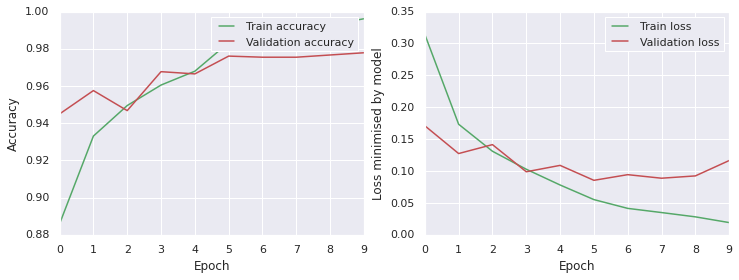

In [ ]:
# model_1 now contains the model at the end of the training run
# We analyse the result:

[train_loss, train_accuracy] = model_1.evaluate(X_train_final, y_train_final, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model_1.evaluate(X_test_final, y_test_final, verbose=0)
print("Validation set Accuracy:{:7.2f}".format(val_accuracy))
print("Validation set Loss:{:7.4f}\n".format(val_loss))

#Now we visualise what happened during training
plot_history(history_1)

In [ ]:
X_example = vectorizer(np.array([s for s in ["URGENT! Your Mobile No. was awarded a €2000 Bonus Caller Prize"]])).numpy()
pred = model_1.predict([X_example])
print(pred)

[[0.9956755  0.00432446]]


In [ ]:
X_example = vectorizer(np.array([s for s in ["Please call me"]])).numpy()
pred = model_1.predict([X_example])
print(pred)

[[7.623398e-06 9.999924e-01]]


## Pretrained Word Embeddings: case Blog Gender Classification

#### Preparation

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

# fix random seed for reproducibility
seed = 2020
np.random.seed(seed)  

import sklearn as sk
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, Conv1D,  MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import load_model


import nltk

2.4.0


In [ ]:
# helper functions for visualisation
# plotting the loss functions used in this notebook
# we plot the loss we want to optimise on the left (in this case: accuracy)
def plot_history(history):
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)

  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),'g-',
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),'r-',
           label = 'Validation accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Loss minimised by model')
  plt.plot(history.epoch, np.array(history.history['loss']),'g-',
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),'r-',
           label = 'Validation loss')
  plt.legend()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### Data

In [ ]:
url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/blog-gender-dataset.csv'
df_dataset = pd.read_csv(url)
df_dataset.columns
df_dataset.dtypes

text      object
gender    object
dtype: object

In [ ]:
df_dataset["gender"] = df_dataset["gender"].str.strip()
df_dataset["gender"] = df_dataset["gender"].str.upper()

df_dataset.groupby("gender").count()

,text
gender,
F,1548
M,1678


In [ ]:
df_dataset.fillna(value='', inplace=True)

In [ ]:
# Calculate the number of words
df_dataset['numberOfWords'] = df_dataset.text.str.split().apply(len)
df_dataset.tail(10)

,text,gender,numberOfWords
3222,"""weird""\n\nlet's discuss what this word means ...",F,150
3223,There are two types of fall guys; one who will...,M,243
3224,I like...flipping my blankets over to the cold...,F,83
3225,Alone for so long walking down the path of dar...,M,303
3226,It's been more than a month since I posted any...,F,407
3227,It was a scavenger style race with checkpoints...,M,168
3228,Finally! I got a full day's work done. Almost ...,F,317
3229,"At the height of laughter, the universe is flu...",M,192
3230,"I like birds, especially woodpeckers and MOST ...",M,106
3231,"Oh friends, it's finally here! I thought the m...",F,310


In [ ]:
df_dataset.describe()

,numberOfWords
count,3232.000000
mean,419.258045
std,812.358458
min,0.000000
25%,104.000000
50%,194.000000
75%,337.250000
max,6148.000000


In [ ]:
# Changing spam and ham into 0 and 1
df_dataset['gender'] = np.where(df_dataset['gender'] == "M", 0, 1)
df_dataset.head()

,text,gender,numberOfWords
0,Long time no see. Like always I was rewriting...,0,164
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,0,312
2,Who moved my Cheese??? The world has been de...,0,1106
3,Yesterday I attended a biweekly meeting of an...,0,192
4,Liam is nothing like Natalie. Natalie never w...,1,222


In [ ]:
# Extract a training & validation split
from sklearn.model_selection import train_test_split
X = df_dataset.drop(['gender','numberOfWords'],axis=1)
y = df_dataset['gender']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (2262, 1)
X_test shape: (970, 1)
2262 train samples
970 test samples


In [ ]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

print('X_train shape:', X_train.shape)
print(type(X_train))

X_train shape: (2262, 1)
<class 'numpy.ndarray'>


In [ ]:
# the labels from the downloaded data are integer numbers
# for a multi-class classification task, we again convert each integer
# to a vector with 19 zeros and a single '1', corresponding to the right class
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# look at the new labels for the first sample
print(y_test[0])
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

[0. 1.]
y_train shape: (2262, 2)
y_test shape: (970, 2)


#### Create a vocabulary index

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=500)
text_ds = tf.data.Dataset.from_tensor_slices(X_train).batch(128)
vectorizer.adapt(text_ds)

In [ ]:
# You can retrieve the computed vocabulary used via vectorizer.get_vocabulary(). 
# Let's print the top 5 words:
vectorizer.get_vocabulary()[:5]

['', '[UNK]', 'the', 'to', 'and']

In [ ]:
# Let's vectorize a test sentence:
output = vectorizer([["i saw the cat sat on the mat"]])
output.numpy()[0, :8]

array([    7,   362,     2,  2163,  1084,    14,     2, 13327])

In [ ]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [ ]:
test = ["i","saw","the", "cat", "sat", "on", "the", "mat"]
[word_index[w] for w in test]

[7, 362, 2, 2163, 1084, 14, 2, 13327]

#### Load pre-trained word embeddings

In [ ]:
path_to_glove_file = '/content/gdrive/My Drive/glove.6B.100d.txt'

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
print(embeddings_index['cat'])

[ 0.23088    0.28283    0.6318    -0.59411   -0.58599    0.63255    0.24402   -0.14108    0.060815  -0.7898    -0.29102    0.14287    0.72274    0.20428    0.1407     0.98757    0.52533    0.097456   0.8822     0.51221    0.40204    0.21169   -0.013109  -0.71616    0.55387    1.1452    -0.88044   -0.50216   -0.22814    0.023885   0.1072     0.083739   0.55015    0.58479    0.75816    0.45706   -0.28001    0.25225    0.68965   -0.60972    0.19578    0.044209  -0.31136   -0.68826   -0.22721    0.46185   -0.77162    0.10208    0.55636    0.067417  -0.57207    0.23735    0.4717     0.82765   -0.29263   -1.3422    -0.099277   0.28139    0.41604    0.10583    0.62203    0.89496   -0.23446    0.51349    0.99379    1.1846    -0.16364    0.20653    0.73854    0.24059   -0.96473    0.13481   -0.0072484  0.33016   -0.12365    0.27191   -0.40951    0.021909  -0.6069     0.40755    0.19566   -0.41802    0.18636   -0.032652  -0.78571   -0.13847    0.044007  -0.084423   0.04911    0.24104    0.45273 

In [ ]:
num_tokens = len(voc) + 2
# each word is represented by a vector of 100 floats (glove.6B.100d.txt)
embedding_dim = 100
hits = 0
misses = 0
missed_words = []

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
# word_index is a dictionary that maps each word to an index
# we loop through all the words of word_index.items()
for word, i in word_index.items():
# we try to retrieve the vector of 100 floats for this word out of embeddings_index  
    embedding_vector = embeddings_index.get(word)
# if we found the corresponding vector of 100 floats    
    if embedding_vector is not None:
      # we put the vector on position i of embedding_matrix
        embedding_matrix[i] = embedding_vector
        hits += 1    
    else:
      # Words not found in embedding index will be all-zeros.    
        misses += 1
        missed_words.append(word)
        
print("Converted %d words (%d misses)" % (hits, misses))

print("*** Missed words = words not in word_index ***")
print(missed_words[0:10])
print()
print("*** i has which index in word_index? ***")
index_i = word_index['i']
print(index_i)
print()
print("*** the vector of 100 floats representing i ***")
print(embedding_matrix[index_i])
print()
print("*** cat has which index in word_index? ***")
index_cat = word_index['cat']
print(index_cat)
print()
print("*** the vector of 100 floats representing cat ***")
print(embedding_matrix[index_cat])

Converted 18517 words (1483 misses)
*** Missed words = words not in word_index ***
['', '[UNK]', 'it’s', 'nbsp', 'i’m', 'don’t', 'i’ve', 'didn’t', 'that’s', 'can’t']

*** i has which index in word_index? ***
7

*** the vector of 100 floats representing i ***
[-0.046539    0.61966002  0.56647003 -0.46584001 -1.18900001  0.44599     0.066035    0.31909999  0.14679    -0.22119001  0.79238999  0.29905     0.16073     0.025324    0.18678001 -0.31000999 -0.28108001  0.60514998 -1.0654      0.52476001  0.064152    1.03579998 -0.40779001 -0.38011     0.30801001  0.59964001 -0.26991001 -0.76034999  0.94221997 -0.46919    -0.18278     0.90652001  0.79671001  0.24824999  0.25713     0.6232     -0.44768     0.65357     0.76902002 -0.51229    -0.44332999 -0.21867     0.38370001 -1.14830005 -0.94397998 -0.15062     0.30012    -0.57805997  0.20175    -1.65910006 -0.079195    0.026423    0.22051001  0.99713999 -0.57538998 -2.72659993  0.31448001  0.70521998  1.43809998  0.99125999  0.13976     1.34739

#### Build a model

In [ ]:
num_classes = 2

def initial_model():
    # we create a variable called model, and we set it equal to an instance of a Sequential object.
    model = Sequential()

    model.add(Embedding(num_tokens, embedding_dim, embeddings_initializer=keras.initializers.Constant(embedding_matrix),trainable=False))
    model.add(Conv1D(64,activation='relu',kernel_size=3))
    model.add(MaxPooling1D(3))  
    model.add(Conv1D(64,activation='relu',kernel_size=3))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))    
    model.add(Dropout(0.5))      
    model.add(Dense(num_classes, activation='softmax'))


    # Before we can train our model, we must compile it
    # To the compile() function, we are passing the optimizer, the loss function, and the metrics that we would like to see. 
    # Notice that the optimizer we have specified is called Adam. Adam is just a variant of SGD. 
    model.compile(loss='categorical_crossentropy',
                  optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
                  metrics=['accuracy']) 
    return model

#### Train the model

In [ ]:
X_train_final = vectorizer(np.array([s for s in X_train])).numpy()
X_test_final = vectorizer(np.array([s for s in X_test])).numpy()

y_train_final = np.array(y_train)
y_test_final = np.array(y_test)

print(X_train.shape)
print(X_test.shape)
print(X_train_final.shape)
print(X_test_final.shape)
print(y_train_final.shape)
print(y_test_final.shape)

(2262, 1)
(970, 1)
(2262, 500)
(970, 500)
(2262, 2)
(970, 2)


In [ ]:
model_1 = initial_model()
model_1.summary()


# We now add batch size to the mix of training parameters
# If you don't specify batch size below, all training data will be used for each learning step
batch_size = 32
epochs = 10

history_1 = model_1.fit(X_train_final, y_train_final,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_final, y_test_final)
                    )

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         2000200   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 64)          19264     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 64)          12352     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_20 (Dropout)         (None, 16)              

Training set Accuracy:   0.98
Training set Loss: 0.1461

Validation set Accuracy:   0.66
Validation set Loss: 0.7184



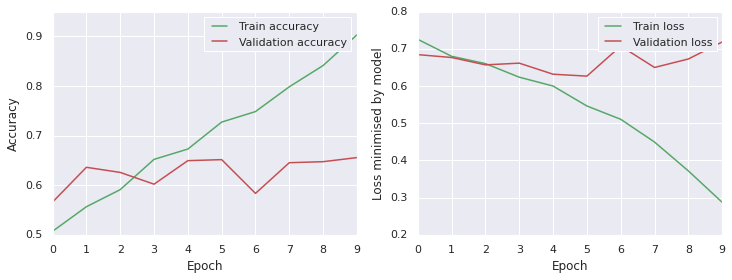

In [ ]:
# model_1 now contains the model at the end of the training run
# We analyse the result:

[train_loss, train_accuracy] = model_1.evaluate(X_train_final, y_train_final, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model_1.evaluate(X_test_final, y_test_final, verbose=0)
print("Validation set Accuracy:{:7.2f}".format(val_accuracy))
print("Validation set Loss:{:7.4f}\n".format(val_loss))

#Now we visualise what happened during training
plot_history(history_1)

In [ ]:
X_example = vectorizer(np.array([s for s in ["My new dress is awesome"]])).numpy()
pred = model_1.predict([X_example])
print(pred)

[[0.3076724 0.6923276]]


In [ ]:
X_example = vectorizer(np.array([s for s in ["Last night I was playing the FIFA soccer game"]])).numpy()
pred = model_1.predict([X_example])
print(pred)

[[0.7076554 0.2923447]]


## Exercise: Twitter US airline sentiment analysis

In [ ]:
# A sentiment analysis job about the problems of each major U.S. airline. 
# Twitter data was scraped from February of 2015 and contributors were asked to first classify 
# positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Read the file data.csv. The enconding is important for the @ in the column text
# Show the first few records
path = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/'
data = pd.read_csv(path + "Tweets.csv", encoding="ISO-8859-1")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Show the general information about the data
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
# Give the dimensions of the data
data.shape

(14640, 15)

In [ ]:
# Give for each column the number of values available
data.count()

tweet_id                        14640
airline_sentiment               14640
airline_sentiment_confidence    14640
negativereason                   9178
negativereason_confidence       10522
airline                         14640
airline_sentiment_gold             40
name                            14640
negativereason_gold                32
retweet_count                   14640
text                            14640
tweet_coord                      1019
tweet_created                   14640
tweet_location                   9907
user_timezone                    9820
dtype: int64

In [ ]:
# Drop the columns airline_sentiment_gold, negativereason_gold, tweet_coord, tweet_location, user_timezone
data = data.drop(["airline_sentiment_gold", "negativereason_gold", "tweet_coord", "tweet_location", "user_timezone"], axis = 1)

In [ ]:
# Give for each column the number of values available
data.count()

tweet_id                        14640
airline_sentiment               14640
airline_sentiment_confidence    14640
negativereason                   9178
negativereason_confidence       10522
airline                         14640
name                            14640
retweet_count                   14640
text                            14640
tweet_created                   14640
dtype: int64

In [ ]:
# Give the datatype of each column
data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
name                             object
retweet_count                     int64
text                             object
tweet_created                    object
dtype: object

In [ ]:
# Which are the different airlines in the dataset? 
data["airline"].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American'], dtype=object)

In [ ]:
# Give the number of tweets per airline, sort descending
data.groupby('airline')['tweet_id'].count().sort_values(ascending=False)

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: tweet_id, dtype: int64

In [ ]:
# Give a pivot table with the number of positive, neutral and negative tweets per airline (airlines in alphabetical order) 
# Method 1
data.groupby(['airline', 'airline_sentiment'])['tweet_id'].count().unstack().sort_values(by=['airline']).fillna(0)

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [ ]:
# Give a pivot table with the number of positive, neutral and negative tweets per airline (airlines in alphabetical order) 
# Method 2
pd.pivot_table(data, values='tweet_id', index='airline',columns='airline_sentiment',aggfunc=np.count_nonzero).fillna(0)

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [ ]:
# Give the name of the 10 biggest complainers
data[data['airline_sentiment'] == 'negative'].groupby('name')['tweet_id'].count().sort_values(ascending = False).head(10)

name
otisday            28
_mhertz            27
throthra           24
rossj987           23
weezerandburnie    23
ElmiraBudMan       18
scoobydoo9749      18
ThatJasonEaton     18
GREATNESSEOA       18
chagaga2013        18
Name: tweet_id, dtype: int64

In [ ]:
# Transform the date of tweet_created to_datetime
data['tweet_created'] = pd.to_datetime(data['tweet_created'])
data.dtypes

tweet_id                                                         int64
airline_sentiment                                               object
airline_sentiment_confidence                                   float64
negativereason                                                  object
negativereason_confidence                                      float64
airline                                                         object
name                                                            object
retweet_count                                                    int64
text                                                            object
tweet_created                   datetime64[ns, pytz.FixedOffset(-480)]
dtype: object

In [ ]:
# What is the minimum date?
data['tweet_created'].min()

Timestamp('2015-02-16 23:36:05-0800', tz='pytz.FixedOffset(-480)')

In [ ]:
# What is the maximum date?
data['tweet_created'].max()

Timestamp('2015-02-24 11:53:37-0800', tz='pytz.FixedOffset(-480)')

In [ ]:
# Remove the (english) stopwords from the text + Remove the words that start with @ from the text

import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import string
nltk.download('punkt')
    
def remove_stopwords_en(text):
    stop_words_en = set(stopwords.words('english')) 
    # turn the string into a list of words based on separators (blank, comma, etc.)
    word_tokens = word_tokenize(text.lower())
    # create a list of all words that are neither stopwords nor punctuations
    result = [x for x in word_tokens if x not in stop_words_en and not x.startswith('@')]
    
    # create a new string of all remaining words
    seperator = ' '
    return seperator.join(result)

data['text'] = data['text'].map(remove_stopwords_en)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data['text'].head()

0                        virginamerica dhepburn said .
1    virginamerica plus 've added commercials exper...
2    virginamerica n't today ... must mean need tak...
3    virginamerica 's really aggressive blast obnox...
4                virginamerica 's really big bad thing
Name: text, dtype: object

In [ ]:
# We are going to try to predict the airline_sentiment
# Create a new dataframe dataRF that contains the necessary columns to do this
# We are only going to use those tweets with airline_sentiment_confidence >= 0.5
dataRF = data[data['airline_sentiment_confidence'] >= 0.5][['airline_sentiment', 'text']]
dataRF.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn said .
2,neutral,virginamerica n't today ... must mean need tak...
3,negative,virginamerica 's really aggressive blast obnox...
4,negative,virginamerica 's really big bad thing
5,negative,virginamerica seriously would pay $ 30 flight ...


In [ ]:
# How many records are left?
dataRF.shape

(14404, 2)

In [ ]:
# What are the unique values for airline_sentiment?
data["airline_sentiment"].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:
# Replace the airline_sentiment negative by 0, neutral by 1 and positive by 2
def transform(s):
  sentiments = {'negative': 0, 'neutral': 1, 'positive': 2}
  return sentiments[s]

dataRF['airline_sentiment'] = dataRF['airline_sentiment'].map(transform)
dataRF.head()

,airline_sentiment,text
0,1,virginamerica dhepburn said .
2,1,virginamerica n't today ... must mean need tak...
3,0,virginamerica 's really aggressive blast obnox...
4,0,virginamerica 's really big bad thing
5,0,virginamerica seriously would pay $ 30 flight ...


In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

# fix random seed for reproducibility
seed = 2020
np.random.seed(seed)  

import sklearn as sk
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, Conv1D,  MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import load_model


import nltk

2.4.0


In [ ]:
# helper functions for visualisation
# plotting the loss functions used in this notebook
# we plot the loss we want to optimise on the left (in this case: accuracy)
def plot_history(history):
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)

  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),'g-',
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),'r-',
           label = 'Validation accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Loss minimised by model')
  plt.plot(history.epoch, np.array(history.history['loss']),'g-',
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),'r-',
           label = 'Validation loss')
  plt.legend()

In [ ]:
# Average length of the messages
dataRF['numberOfWords'] = dataRF.text.str.split().apply(len)
dataRF.head()

,airline_sentiment,text,numberOfWords
0,1,virginamerica dhepburn said .,4
2,1,virginamerica n't today ... must mean need tak...,11
3,0,virginamerica 's really aggressive blast obnox...,17
4,0,virginamerica 's really big bad thing,6
5,0,virginamerica seriously would pay $ 30 flight ...,17


In [ ]:
# Extract a training & validation split
from sklearn.model_selection import train_test_split
X = dataRF.drop(['airline_sentiment','numberOfWords'],axis=1)
y = dataRF['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(type(X_train))

X_train shape: (10082, 1)
X_test shape: (4322, 1)
10082 train samples
4322 test samples
<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

print('X_train shape:', X_train.shape)
print(type(X_train))

X_train shape: (10082, 1)
<class 'numpy.ndarray'>


In [ ]:
# the labels from the downloaded data are integer numbers
# for a multi-class classification task, we again convert each integer
# to a vector with 19 zeros and a single '1', corresponding to the right class
num_classes = 3
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# look at the new labels for the first sample
print(y_train[0])
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

[0. 0. 1.]
y_train shape: (10082, 3)
y_test shape: (4322, 3)


In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=20)
text_ds = tf.data.Dataset.from_tensor_slices(X_train).batch(128)
vectorizer.adapt(text_ds)

In [ ]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [ ]:
test = ["i","saw","the", "cat", "sat", "on", "the", "mat"]
# [word_index[w] for w in test]
for w in test:
    try: 
        print(w + ': ' + str(word_index[w]))
    except KeyError:
        print (w+ " not available in word_index")

i: 2236
saw: 840
the: 3769
cat not available in word_index
sat: 436
on: 2539
the: 3769
mat not available in word_index


In [ ]:
path_to_glove_file = '/content/gdrive/My Drive/glove.6B.100d.txt'

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
num_tokens = len(voc) + 2
# each word is represented by a vector of 100 floats (glove.6B.100d.txt)
embedding_dim = 100
hits = 0
misses = 0
missed_words = []

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
# word_index is a dictionary that maps each word to an index
# we loop through all the words of word_index.items()
for word, i in word_index.items():
# we try to retrieve the vector of 100 floats for this word out of embeddings_index  
    embedding_vector = embeddings_index.get(word)
# if we found the corresponding vector of 100 floats    
    if embedding_vector is not None:
      # we put the vector on position i of embedding_matrix
        embedding_matrix[i] = embedding_vector
        hits += 1    
    else:
      # Words not found in embedding index will be all-zeros.    
        misses += 1
        missed_words.append(word)
        
print("Converted %d words (%d misses)" % (hits, misses))

Converted 8531 words (4671 misses)


In [ ]:
num_classes = 3

def initial_model():
    # we create a variable called model, and we set it equal to an instance of a Sequential object.
    model = Sequential()

    model.add(Embedding(num_tokens, embedding_dim, embeddings_initializer=keras.initializers.Constant(embedding_matrix),trainable=False))
    model.add(Conv1D(16,activation='relu',kernel_size=3))
    model.add(MaxPooling1D(3))
    model.add(Dropout(0.2)) 

    model.add(Conv1D(16,activation='relu',kernel_size=3))  
    model.add(Dropout(0.2)) 

    model.add(Conv1D(16,activation='relu',kernel_size=3))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))    
    model.add(Dropout(0.2))      
    model.add(Dense(num_classes, activation='softmax'))


    # Before we can train our model, we must compile it
    # To the compile() function, we are passing the optimizer, the loss function, and the metrics that we would like to see. 
    # Notice that the optimizer we have specified is called Adam. Adam is just a variant of SGD. 
    model.compile(loss='categorical_crossentropy',
                  optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001),
                  metrics=['accuracy']) 
    return model

In [ ]:
X_train_final = vectorizer(np.array([s for s in X_train])).numpy()
X_test_final = vectorizer(np.array([s for s in X_test])).numpy()

y_train_final = np.array(y_train)
y_test_final = np.array(y_test)

print(X_train.shape)
print(X_test.shape)
print(X_train_final.shape)
print(X_test_final.shape)
print(y_train_final.shape)
print(y_test_final.shape)

(10082, 1)
(4322, 1)
(10082, 20)
(4322, 20)
(10082, 3)
(4322, 3)


In [ ]:
model_1 = initial_model()
model_1.summary()


# We now add batch size to the mix of training parameters
# If you don't specify batch size below, all training data will be used for each learning step
batch_size = 128
epochs = 80

history_1 = model_1.fit(X_train_final, y_train_final,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_final, y_test_final)
                    )

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         1320400   
_________________________________________________________________
conv1d_7 (Conv1D)            (None, None, 16)          4816      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
dropout_21 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, None, 16)          784       
_________________________________________________________________
dropout_22 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, None, 16)        

Training set Accuracy:   0.80
Training set Loss: 0.5095

Validation set Accuracy:   0.77
Validation set Loss: 0.5844



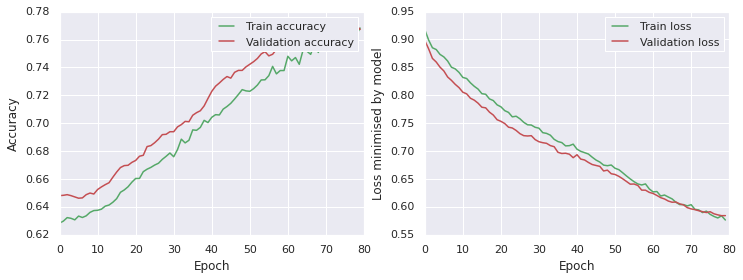

In [ ]:
# model_1 now contains the model at the end of the training run
# We analyse the result:

[train_loss, train_accuracy] = model_1.evaluate(X_train_final, y_train_final, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model_1.evaluate(X_test_final, y_test_final, verbose=0)
print("Validation set Accuracy:{:7.2f}".format(val_accuracy))
print("Validation set Loss:{:7.4f}\n".format(val_loss))

#Now we visualise what happened during training
plot_history(history_1)

## Exercise: Spotify

Data can be found on https://www.kaggle.com/cihanoklap/top-songs-on-spotify-what-makes-them-popular/data
In this exercise, we’ll take a look at the audio features of the tracks in Spotify’s Top Songs of 2017 playlist and try to highlight the common patterns behind the audio features of these songs.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Read the file data.csv
# Show the first few records
data = pd.read_csv('/content/gdrive/My Drive/spotify.csv')
data.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [ ]:
# Show the general information about the data
data.describe()

,Position,Streams
count,3.441197e+06,3.441197e+06
mean,9.464399e+01,5.189176e+04
std,5.739567e+01,2.018035e+05
min,1.000000e+00,1.001000e+03
25%,4.500000e+01,3.322000e+03
50%,9.200000e+01,9.227000e+03
75%,1.430000e+02,2.965800e+04
max,2.000000e+02,1.138152e+07


In [ ]:
# Drop the column URL because it is of no need
# Show the first few records
data = data.drop('URL', axis = 1)
data.head()

,Position,Track Name,Artist,Streams,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec
1,2,Chantaje,Shakira,19270,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,2017-01-01,ec
4,5,Safari,J Balvin,14269,2017-01-01,ec


In [ ]:
# Give the dimensions of the data
data.shape

(3441197, 6)

In [ ]:
# Give for each column the number of values available
data.count()

Position      3441197
Track Name    3440540
Artist        3440540
Streams       3441197
Date          3441197
Region        3441197
dtype: int64

In [ ]:
# You can see that there are some columns with no data available for the Track Name and Artist
# Drop the records which empty values for some columns
data = data.dropna()

In [ ]:
# Give for each column the number of values available
data.count()

Position      3440540
Track Name    3440540
Artist        3440540
Streams       3440540
Date          3440540
Region        3440540
dtype: int64

In [ ]:
# Give the datatype of each column
data.dtypes

Position       int64
Track Name    object
Artist        object
Streams        int64
Date          object
Region        object
dtype: object

In [ ]:
# Which different regions are available. Is Belgium (be) one of these regions?
data['Region'].unique()

array(['ec', 'fr', 'ar', 'fi', 'no', 'it', 'lt', 'ph', 'tw', 'nz', 'ee', 'tr', 'us', 'sv', 'cr', 'de', 'cl', 'jp', 'br', 'hn', 'gt', 'ch', 'hu', 'ca', 'pe', 'be', 'my', 'dk', 'bo', 'pl', 'at', 'pt', 'se', 'mx', 'pa', 'uy', 'is', 'es', 'cz', 'ie', 'nl', 'sk', 'co', 'sg', 'id', 'do', 'lu', 'gb', 'global', 'py', 'au', 'lv', 'gr', 'hk'], dtype=object)

In [ ]:
# What is the minimum date?
data['Date'].min()

'2017-01-01'

In [ ]:
# What is the maximum date?
data['Date'].max()

'2018-01-09'

In [ ]:
# Transform the Track Name's into lower case
data['Track Name'] = data['Track Name'].str.lower()
data.head()

,Position,Track Name,Artist,Streams,Date,Region
0,1,reggaetón lento (bailemos),CNCO,19272,2017-01-01,ec
1,2,chantaje,Shakira,19270,2017-01-01,ec
2,3,otra vez (feat. j balvin),Zion & Lennox,15761,2017-01-01,ec
3,4,vente pa' ca,Ricky Martin,14954,2017-01-01,ec
4,5,safari,J Balvin,14269,2017-01-01,ec


In [ ]:
# Transform the Artist into lower case
data['Artist'] = data['Artist'].str.lower()
data.head()

,Position,Track Name,Artist,Streams,Date,Region
0,1,reggaetón lento (bailemos),cnco,19272,2017-01-01,ec
1,2,chantaje,shakira,19270,2017-01-01,ec
2,3,otra vez (feat. j balvin),zion & lennox,15761,2017-01-01,ec
3,4,vente pa' ca,ricky martin,14954,2017-01-01,ec
4,5,safari,j balvin,14269,2017-01-01,ec


In [ ]:
# How many unique artists are there in the dataset?
len(data['Artist'].unique())

6619

In [ ]:
# Are there any songs with the same name but with a different artist?
result = data.groupby('Track Name')['Artist'].unique().reset_index()
result['Artist'] = result['Artist'].map(len)
result = result[result['Artist'] > 1]
result.head()

,Track Name,Artist
52,1 op 1,2
65,10 jahre,2
96,15,2
106,18,2
117,1994,2


In [ ]:
# What was the most often streamed song in the entire world?
data.groupby(['Track Name', 'Artist'])['Streams'].sum().reset_index().sort_values(by='Streams',ascending=False).head()

,Track Name,Artist,Streams
13900,shape of you,ed sheeran,2993988783
3581,despacito - remix,luis fonsi,1829621841
3580,despacito (featuring daddy yankee),luis fonsi,1460802540
14480,something just like this,the chainsmokers,1386258295
6706,humble.,kendrick lamar,1311243745


In [ ]:
# Now it looks like Despacito of Luis Fonsi was less popular than Shape of You of Ed Sheeran
# Give all the different versions in the dataset of the song Despacito
data[(data['Track Name'].str.startswith('despacito'))]

,Position,Track Name,Artist,Streams,Date,Region
2425,26,despacito (featuring daddy yankee),luis fonsi,6197,2017-01-13,ec
2603,4,despacito (featuring daddy yankee),luis fonsi,16088,2017-01-14,ec
2800,1,despacito (featuring daddy yankee),luis fonsi,21318,2017-01-15,ec
3000,1,despacito (featuring daddy yankee),luis fonsi,29118,2017-01-16,ec
3200,1,despacito (featuring daddy yankee),luis fonsi,33448,2017-01-17,ec
...,...,...,...,...,...,...
3440591,195,despacito (featuring daddy yankee),luis fonsi,2092,2018-01-06,hk
3440642,46,despacito - remix,luis fonsi,4914,2018-01-07,hk
3440795,199,despacito (featuring daddy yankee),luis fonsi,1963,2018-01-07,hk
3440851,55,despacito - remix,luis fonsi,5016,2018-01-08,hk


In [ ]:
# How many times was Despacito streamed over the entire world if you make no difference between the different versions?
data[(data['Track Name'].str.startswith('despacito'))]['Streams'].sum()

3290523447

In [ ]:
# What was the most popular of the 4 different versions of despacito?
result = data[(data['Track Name'].str.startswith('despacito'))]
result = result.groupby('Track Name')['Streams'].sum().reset_index().sort_values(by='Streams',ascending=False)
result.head()

,Track Name,Streams
2,despacito - remix,1829621841
1,despacito (featuring daddy yankee),1460802540
3,despacito - versión salsa,88559
0,despacito,10507


In [ ]:
# Is the version of despacito with Justin Bieber also available in the dataset?
data[(data['Track Name'].str.startswith('despacito')) & (data['Artist'] == 'justin bieber')]

,Position,Track Name,Artist,Streams,Date,Region


In [ ]:
# Give a list of songs that were only streamed in Belgium
result = data.groupby('Track Name')['Region'].unique().reset_index()
result['Region'] = result['Region'].map(', '.join)
result[result['Region'] == 'be'].head()

,Track Name,Region
293,a dream that never stops,be
465,afraid,be
489,agora,be
705,alles is op,be
710,alles voor mij (uit liefde voor muziek) - live,be


In [ ]:
# Show the christmas songs that are in the dataset (i.e. the Track Name contains the word christmas)
data[(data['Track Name'].str.contains('christmas'))].groupby(['Track Name', 'Artist']).count()

,,Position,Streams,Date,Region
Track Name,Artist,,,,
8 days of christmas - live,destiny's child,140,140,140,140
a christmas carol main title,alan silvestri,1,1,1,1
a christmas kiss ft. mia stegmar,the snowy hill singers,9,9,9,9
a christmas song for you,jose mari chan,1,1,1,1
a holly jolly christmas,lady antebellum,32,32,32,32
...,...,...,...,...,...
wonderful christmastime - recorded at spotify studios nyc,xavier omär,1,1,1,1
wonderful christmastime - remastered 2011 / edited version,paul mccartney,459,459,459,459
you make it feel like christmas (feat. blake shelton),gwen stefani,162,162,162,162


In [ ]:
# Was 'all i want for christmas is you' streamed at all during july and august?
data[((data['Date'].str[5:7] == '07') | (data['Date'].str[5:7] == '08')) & (data['Track Name'] == 'all i want for christmas is you')]

,Position,Track Name,Artist,Streams,Date,Region


In [ ]:
# On which day was 'all i want for christmas is you' streamed for the first time after the summer (i.e. august)?
data[(data['Date'].str[5:7] > '08') & (data['Track Name'] == 'all i want for christmas is you')]['Date'].min()

'2017-11-01'

In [ ]:
# How did the songs of Ed Sheeran perform in 2017 in Belgium on each day: give for each track the number of days it was streamed in belgium.
data[(data['Region'] == 'be') & (data['Artist'] == 'ed sheeran')].groupby('Track Name')['Date'].count().reset_index().sort_values(by = 'Date', ascending=False)

,Track Name,Date
33,thinking out loud,367
25,shape of you,366
3,castle on the hill,364
23,photograph,356
7,galway girl,310
20,perfect,308
10,happier,187
4,dive,82
34,what do i know?,79
13,i see fire,75


In [ ]:
# Give the artists that have more than one song on the Top 100 Songs List in Belgium
result = data[(data['Region'] == 'be') & (data['Position'] <= 100)].groupby('Artist')['Track Name'].describe()
result[result['unique'] >= 2]['unique'].head()

Artist
21 savage        2
adele            4
alan walker      4
alessia cara     2
andy williams    2
Name: unique, dtype: object

In [ ]:
# Create a new dataframe plotData that contains the Date and Streams of despacito in belgium
# Transform the column Date to_datetime
# Add a new column Week to plotData that contains the week (use .dt.week)
# Drop the column Date because it's of no use anymore
# Calculate the average number of Streams per week. Divide the result by 1000 (to get smaller numbers) 
# and transform the result to an integer

plotData = data[(data['Track Name'].str.startswith('despacito')) & (data['Region'] == 'be')][['Date', 'Streams']]
plotData['Date'] = pd.to_datetime(plotData['Date'])
plotData['Week'] = plotData['Date'].dt.week
plotData = plotData.drop('Date', axis = 1)
plotData = plotData.groupby('Week')['Streams'].mean().reset_index()
plotData['Streams'] /= 1000
plotData['Streams'] = plotData['Streams'].astype(int)
plotData.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


,Week,Streams
0,1,6
1,2,3
2,3,2
3,4,4
4,5,6
5,6,10
6,7,13
7,8,13
8,9,15
9,10,14


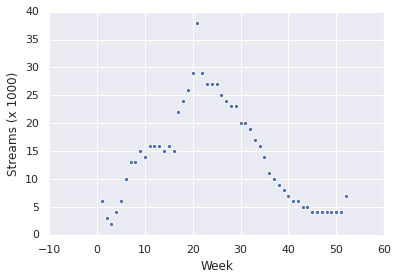

In [ ]:
# Plot the resulting data

# imports for plotting

import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(plotData['Week'], plotData['Streams'])
plt.xlabel('Week')
plt.ylabel('Streams (x 1000)')
plt.show()

In [ ]:
# Create a new dataframe extra that contains the most often streamed Track Name's for each month 
# for each of the following regions: au, be, de, fr, gb, it, nl
# Transform the column Date to_datetime
# Add a new column Week to plotData that contains the week (use .dt.week)
# Drop the column Date because it's of no use anymore

extra = data[data['Region'].isin(['au', 'be', 'de', 'fr', 'gb', 'it', 'nl'])][['Region','Date', 'Streams','Track Name']]
extra['Date'] = pd.to_datetime(extra['Date'])
extra['Month'] = extra['Date'].dt.month 
extra.drop('Date', axis = 1)
extra = extra.groupby(['Region','Month','Track Name'])['Streams'].sum().reset_index().sort_values(by='Streams',ascending=False)
extra.head()

,Region,Month,Track Name,Streams
18342,gb,1,shape of you,28560163
19193,gb,3,galway girl,24033076
19418,gb,3,shape of you,23138207
17956,gb,1,castle on the hill,21308965
18908,gb,2,shape of you,20378105


In [ ]:
# Create a new dataframe extra2 based on the dataframe extra that contains all information about the 4 versions of despacito
# Create a pivot_table that shows the total number of streams of the 4 versions of despacito 
# for each region (au, be, de, fr, gb, it, nl) for each month

extra2 = extra[extra['Track Name'].str.startswith('despacito')]
pd.pivot_table(extra2, values='Streams', index=['Month'],columns=['Region'], aggfunc='sum').fillna(0)

Region,au,be,de,fr,gb,it,nl
Month,,,,,,,
1,402061,151421,1439340,481107,1044992,732903,581959
2,608256,333684,3508335,830513,1285494,3150414,1664582
3,688520,499678,3927367,1762023,1559514,5837870,2582056
4,1072151,792454,10103525,3468600,3915577,6399796,5083528
5,6521803,1631778,20385311,6255027,21158060,6128627,10551510
6,7800207,1599733,17779253,6623713,22629372,5336027,9334846
7,6808420,1434239,14141890,6490173,18751502,4651101,7219044
8,5425760,1100817,8968624,4324038,12689654,3488342,4885940
9,3642005,631181,4989549,2315402,6933812,1871671,2607975


In [ ]:
# Create a new dataframe extra3 based on the dataframe extra that contains the most popular Track Name
# for each region (au, be, de, fr, gb, it, nl) for each month

extra3 = extra.drop('Streams', axis = 1)
extra3 = extra3.drop_duplicates(['Region','Month'], keep='first')
extra3 = extra.sort_values(by=['Region','Month'], ascending=True)
extra3.head()

,Region,Month,Track Name,Streams
389,au,1,shape of you,7011621
73,au,1,castle on the hill,4931822
188,au,1,i don’t wanna live forever (fifty shades darke...,4362247
417,au,1,starboy,4197082
359,au,1,rockabye (feat. sean paul & anne-marie),4085628


In [ ]:
# Create a new dataframe extra4 based on the dataframe data that only contains the Track Name's
# Make sure there are no duplicates for the Track Name's

extra4 = data[['Track Name']]
extra4 = extra4.drop_duplicates(keep='first')
extra4.head()

,Track Name
0,reggaetón lento (bailemos)
1,chantaje
2,otra vez (feat. j balvin)
3,vente pa' ca
4,safari


In [ ]:
pip install langdetect

In [ ]:
# Detect the language for each Track Name in the dataframe extra4
# You have to use try - except otherwise you can get the LangDetectException: No features in text.
# for weird titles like #1111, because he can't decide on the language

import nltk
from langdetect import detect

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'NoLang'

extra4['lang'] = extra4['Track Name'].map(detect_language)

In [ ]:
# We will use only the english Track Name's

extra4 = extra4[extra4['lang'] == 'en']
extra4.head()

,Track Name,lang
29,we don't talk anymore (feat. selena gomez),en
31,can't stop the feeling! (original song from dr...,en
35,cold water (feat. justin bieber & mø),en
38,in the name of love,en
40,cheap thrills,en


In [ ]:
# Create a new dataframe extra5 based on the dataframe data that contains the total number of streams per Track Name
# and per artist
extra5 = data.groupby(['Track Name', 'Artist'])['Streams'].sum().reset_index()
extra5.head()

,Track Name,Artist,Streams
0,"""all that is or ever was or ever will be""",alan silvestri,7311
1,"""read all about it, pt. iii""",emeli sandé,57025
2,#99,jvg,31826
3,#askip,black m,296862
4,#biziz - feat. lil bege,reynmen,403591


In [ ]:
# Read the file featuresdf.csv into the dataframe features
# Show the few first records
features = pd.read_csv('/content/gdrive/My Drive/featuresdf.csv')
features.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [ ]:
# Drop the column id
features = features.drop('id', axis = 1)
features.head()

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [ ]:
# Transform the columns name and artists to lower case
features['name'] = features['name'].str.lower()
features['artists'] = features['artists'].str.lower()
features.head()

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,shape of you,ed sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,despacito - remix,luis fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,despacito (featuring daddy yankee),luis fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,something just like this,the chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,i'm the one,dj khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [ ]:
# Merge the dataframe features and extra5 into the dataframe new_df
# Show the few first records
new_df = pd.merge(features, extra5,  how='left', left_on=['name','artists'], right_on = ['Track Name','Artist'])
new_df.head()

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Track Name,Artist,Streams
0,shape of you,ed sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0,shape of you,ed sheeran,2993988783
1,despacito - remix,luis fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0,despacito - remix,luis fonsi,1829621841
2,despacito (featuring daddy yankee),luis fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0,despacito (featuring daddy yankee),luis fonsi,1460802540
3,something just like this,the chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0,something just like this,the chainsmokers,1386258295
4,i'm the one,dj khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0,i'm the one,dj khaled,1254196301


In [ ]:
# Divide the number of streams by 1000000 to get smaller numbers
new_df['Streams'] /= 1000000
new_df.head()

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Track Name,Artist,Streams
0,shape of you,ed sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0,shape of you,ed sheeran,2993.988783
1,despacito - remix,luis fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0,despacito - remix,luis fonsi,1829.621841
2,despacito (featuring daddy yankee),luis fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0,despacito (featuring daddy yankee),luis fonsi,1460.802540
3,something just like this,the chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0,something just like this,the chainsmokers,1386.258295
4,i'm the one,dj khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0,i'm the one,dj khaled,1254.196301


In [ ]:
# We want to create a linear regression model to try to predict the streams 
# Drop the columns that aren't necessary any more
new_df = new_df.drop(['Track Name', 'Artist', 'name', 'artists'], axis = 1)

In [ ]:
# remove records with empty values
new_df = new_df.dropna()

In [ ]:
# Create the training and test data
from sklearn.model_selection import train_test_split
X = new_df.drop('Streams',axis=1)
y = new_df['Streams']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [ ]:
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [ ]:
poly = PolynomialFeatures(degree=3)
X_train_transform = poly.fit_transform(X_train)
X_test_transform = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_transform,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = model.predict(X_test_transform)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE))
print()

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 1286.4112005348884

Mean Squared Error: 4067642.9355064435

Root Mean Squared Error: 2016.8398388336252

R square: -33.243900760650384



In [ ]:
# Create a RandomForestRegressor to predict the number of Streams
# What are the most important features to predict if a song will become a hit?

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=300)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

mae = mean_absolute_error(y_test,y_predict)

print('Mean Absolute Error: '+ str(MAE))
r2 = r2_score(y_test,y_predict)
print('R square: ' + str(r2))  

Mean Absolute Error: 1286.4112005348884
R square: 0.03338665805077401


In [ ]:
print(X_train.columns)
print(model.feature_importances_)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')
[0.04600279 0.05213288 0.02456933 0.06404987 0.0207159  0.08239519 0.14777325 0.01916416 0.04927818 0.32168831 0.05418171 0.11804843 0.        ]
